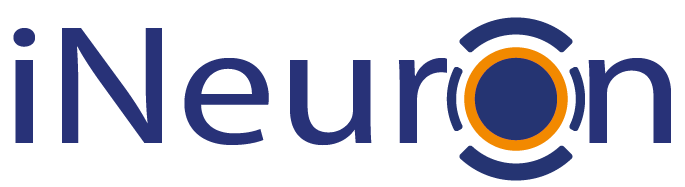

# Logistic Regression on Algerian Forest Fire Dataset

<b>Submitted by : Nilutpal Das

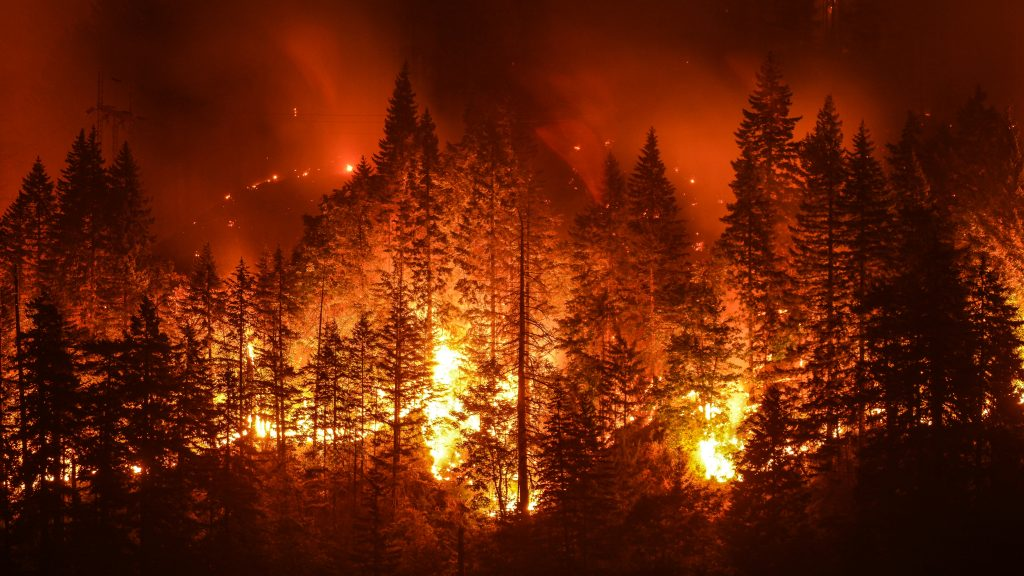

## Life Cycle of a Machine Learning Model

- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Feature Engineering
- Model Training & Evaluation

## 1. Problem Statement

- Wildfires are a natural occurrence within some forest ecosystems, but in a few years, the fires are becoming more extreme and widespread. Hotter and drier weather caused by climate change and poor land management create conditions favorable for frequent, larger, and high-intensity forest fires. The incidence of forest fires is increasing year by year. Our Objective is to identify the prime factors of causing forest fires and this will help in minimizing the chances of forest fires and taking preventive measures against this problem.

## 2. Data Collection
    
- In this dataset regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- This dataset comprises of 122 instances for each region. The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class). The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.
- Link for the dataset is as follows - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

#### Dataset Attributes Information    

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- <b> Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
- <b> Fire Weather Index (FWI) Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

#### Importing required packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading the dataset

In [2]:
df= pd.read_csv('D:\Data Science\Algerian dataset\Algerian_forest_fires_dataset.csv', header=1)

#### Showing top 5 records

In [3]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

#### Showing top 5 records

In [4]:
df.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire

#### Checking total rows and columns

In [5]:
df.shape

(246, 14)

<b><font color=blue>Observation</font>
- 246 rows and 14 columns

## 3. Exploratory Data Analysis

#### Checking all unique values of column 'day'

In [6]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

#### Checking total rows of column 'day'

In [7]:
df['day'].shape

(246,)

#### Checking all data is numeric or not

In [8]:
df['day'].str.isnumeric().sum()

244

<b><font color=darkorange>Showing particular row having the categorical value</font>

In [9]:
df[~df['day'].str.isnumeric()]

day  month  year  Temperature   RH   Ws  Rain   \
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    

     FFMC  DMC   DC  ISI  BUI  FWI  Classes    
122   NaN  NaN  NaN  NaN  NaN  NaN        NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI  Classes

<b><font color=blue>Observation</font>
- row 122 and 123 are having categorical data

#### Removing unwanted rows from the dataset

In [10]:
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.loc[122:].head(4)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   
125  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2  5.6    1   

       Classes    
122  not fire     
123  not fire     
124  not fire     
125  not fire

<b><font color=blue>Observation</font>
- column 'day' is fixed by removing unwanted records from some rows

#### Checking all unique values of column 'month'

In [11]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

#### Checking total rows of column 'month'

In [12]:
df['month'].shape

(244,)

#### Checking all data is numeric or not

In [13]:
df['month'].str.isnumeric().sum()

244

#### Shows particular row having categorical data

In [14]:
df[~df['month'].str.isnumeric()]

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

#### Creating a new feature name 'Region' in the dataset

In [15]:
# creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
for i in range(len(df)):
    if i<=121:
        df['Region'] = '0'
    else:
        df['Region'][i] = '1'

df.loc[120:]

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3     3   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2   2.4   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes   Region  
120  0.1   not fire         0  
121  0.1   not fire         0  
122  0.2   not fire         1  
123  0.2   not fire         1  
124  0.1   not fire         1  
..   ...           ...    ...  
239  6.5       fire         1  
240    0   not fire         1  
241  0.2   not fire         1  
242  0.7   not fire         1  
243  0.5  not fire          1  

[124 rows x 15 columns]

<b><font color=blue>Observation</font>
- this solves the anomaly found in column 'day'

In [16]:
df['year'].unique()

array(['2012'], dtype=object)

#### 3.3 Renaming the names of the columns

In [17]:
df.columns= [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### converting all feature values to string for data cleaning

In [18]:
df=df.astype(str)

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<b><font color=blue>Observation</font>
- spaces in features solved

#### 3.4 Stripping the classes features

In [20]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', 'nan'], dtype=object)

In [21]:
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

    Classes Region  
0  not fire      0  
1  not fire      0  
2  not fire      0  
3  not fire      0  
4  not fire      0

In [22]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [23]:
df['Temperature'].shape

(244,)

In [24]:
df['Temperature'].str.isnumeric().sum()

244

In [25]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [26]:
df['RH'].shape

(244,)

In [27]:
df['RH'].str.isnumeric().sum()

244

In [28]:
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [29]:
df['Ws'].str.isnumeric().sum()

244

In [30]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [31]:
df['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [32]:
df['FFMC'].shape

(244,)

In [33]:
df['FFMC'].str.isnumeric().sum()

27

In [34]:
df[~df['FFMC'].str.isnumeric()]

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI   Classes Region  
0    0.5  not fire      0  
1    0.4  not fire      0  
2    0.1  not fire      0  
3      0  not fire      0  
4    0.5  not fire      0  
..   ...       ...    ...  
239  6.5      fire      1  
240    0  not fire      1  
241  0.2  not fire      1  
242  0.7  not fire      1  
243  0.5  not fire      1  

[217 rows x 15 columns]

<b><font color=blue>Observation</font>
- here 215 remaining data are from FFMC are in float and 27 are in int

In [35]:
df['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6',
       '12.9', '18', '19.4', '21.1', '23.9', '27.8', '32.7', '39.

In [36]:
# df['DMC'].tolist()

In [37]:
df['DMC'].shape

(244,)

In [38]:
df['DMC'].str.isnumeric().sum()

26

<b><font color=blue>Observation</font>
- Remaining data are in float and 26 data are in int.

In [39]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [40]:
df['DC'].shape

(244,)

In [41]:
df['DC'].str.isnumeric().sum()

27

In [42]:
df[~df['FFMC'].str.isnumeric()]

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI   Classes Region  
0    0.5  not fire      0  
1    0.4  not fire      0  
2    0.1  not fire      0  
3      0  not fire      0  
4    0.5  not fire      0  
..   ...       ...    ...  
239  6.5      fire      1  
240    0  not fire      1  
241  0.2  not fire      1  
242  0.7  not fire      1  
243  0.5  not fire      1  

[217 rows x 15 columns]

<b><font color=blue>Observation</font>
- Remaining data are in float and 27 are in int.

In [43]:
df['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [44]:
df['ISI'].shape

(244,)

In [45]:
df['ISI'].str.isnumeric().sum()

30

<b><font color=blue>Observation</font>
- Remaining are in float and 30 are in int.

In [46]:
df['BUI'].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [47]:
df['BUI'].shape

(244,)

In [48]:
df['BUI'].str.isnumeric().sum()

22

<b><font color=blue>Observation</font>
- Remaining are in float and 22 are in int.

In [49]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [50]:
df['FWI'].shape

(244,)

In [51]:
df['FWI'].str.isnumeric().sum()

28

<b><font color=blue>Observation</font>
- Remaining are in float and 28 are in int.

In [52]:
df['Classes'].unique()

array(['not fire', 'fire', 'nan'], dtype=object)

In [53]:
df['Classes'].shape

(244,)

In [54]:
df['Classes'].str.isnumeric().sum()

0

<b><font color=blue>Observation</font>
- All are string.

In [55]:
df['Region'].unique()

array(['0', '1'], dtype=object)

In [56]:
df['Region'].shape

(244,)

In [57]:
df['Region'].str.isnumeric().sum()

244

## 4. Feature Engineering

#### Checking datatypes and Null values

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


#### Checking null values

In [59]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### Fixing the null values

In [60]:
df.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            nan
Region               1
Name: 165, dtype: object

In [61]:
df.at[165, 'DC'] = 14.6
df.at[165, 'ISI'] = 9
df.at[165, 'BUI'] = 12.5
df.at[165, 'FWI'] = 10.4
df.at[165, 'Classes'] = 'fire'

In [62]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### Handling categorical values

In [63]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

   Classes Region  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0

#### Changing the datatypes

In [64]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['Classes']=df['Classes'].astype(int)
df['Region']=df['Region'].astype(int)

#### Basic Information

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(8), int32(7)
memory usage: 22.0 KB


<b><font color=blue>Observation</font>
- Corrected datatypes.
- No null values.

#### Missing values

In [66]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

<b><font color=blue>Observation</font>
- No null values

#### Duplicate values

In [67]:
df[df.duplicated()]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

<b><font color=blue>Observation</font>
- No duplicated values

#### Creating copy dataframe from original dataframe

In [68]:
df_copy=df.copy()

In [69]:
df_copy

day  month  year  Temperature  RH    Ws  Rain  FFMC   DMC    DC  ISI  \
0      1      6  2012           29  57  18.0   0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29  61  13.0   1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26  82  22.0  13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25  89  13.0   2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27  77  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ..   ...   ...   ...   ...   ...  ...   
239   26      9  2012           30  65  14.0   0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28  87  15.0   4.4  41.1   6.5   8.0  0.1   
241   28      9  2012           27  87  29.0   0.5  45.9   3.5   7.9  0.4   
242   29      9  2012           24  54  18.0   0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24  64  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  Classes  Region  
0     3.4  0.5        0       0  
1     3.9  0.4        0       0  
2     2.7  0.1        0       0  
3     1.7  0.0        0       0  
4     3.9  0.5        0       0  
..    ...  ...      ...     ...  
239  16.9  6.5        1       1  
240   6.2  0.0        0       1  
241   3.4  0.2        0       1  
242   5.1  0.7        0       1  
243   4.8  0.5        0       1  

[244 rows x 15 columns]

#### Dropping column 'year' as the dataset records are from 2012 only.

In [70]:
df_copy.drop('year', axis=1, inplace=True)

#### Statistical analysis

In [71]:
df_copy.describe().T

count       mean        std   min     25%    50%     75%    max
day          244.0  15.754098   8.825059   1.0   8.000  16.00  23.000   31.0
month        244.0   7.500000   1.112961   6.0   7.000   7.50   8.000    9.0
Temperature  244.0  32.172131   3.633843  22.0  30.000  32.00  35.000   42.0
RH           244.0  61.938525  14.884200  21.0  52.000  63.00  73.250   90.0
Ws           244.0  15.504098   2.810178   6.0  14.000  15.00  17.000   29.0
Rain         244.0   0.760656   1.999406   0.0   0.000   0.00   0.500   16.8
FFMC         244.0  77.887705  14.337571  28.6  72.075  83.50  88.300   96.0
DMC          244.0  14.673361  12.368039   0.7   5.800  11.30  20.750   65.9
DC           244.0  49.288115  47.619662   6.9  13.275  33.10  68.150  220.4
ISI          244.0   4.759836   4.154628   0.0   1.400   3.50   7.300   19.0
BUI          244.0  16.673361  14.201648   1.1   6.000  12.45  22.525   68.0
FWI          244.0   7.049180   7.428366   0.0   0.700   4.45  11.375   31.1
Classes      244.0   0.565574   0.496700   0.0   0.000   1.00   1.000    1.0
Region       244.0   0.500000   0.501028   0.0   0.000   0.50   1.000    1.0

#### Numerical features

In [72]:
num = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
num

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

#### Creating dataframe of numerical features

In [73]:
num_df=df_copy[num]
num_df

day  month  Temperature  RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6           29  57  18.0   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6           29  61  13.0   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6           26  82  22.0  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6           25  89  13.0   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6           27  77  16.0   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...          ...  ..   ...   ...   ...   ...   ...  ...   ...   
239   26      9           30  65  14.0   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9           28  87  15.0   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9           27  87  29.0   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9           24  54  18.0   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9           24  64  15.0   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  Region  
0    0.5        0       0  
1    0.4        0       0  
2    0.1        0       0  
3    0.0        0       0  
4    0.5        0       0  
..   ...      ...     ...  
239  6.5        1       1  
240  0.0        0       1  
241  0.2        0       1  
242  0.7        0       1  
243  0.5        0       1  

[244 rows x 14 columns]

#### Counting the proportion of all features

In [74]:
df_copy['day'].value_counts().sort_values(ascending=False)

1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    4
Name: day, dtype: int64

In [75]:
df_copy['month'].value_counts().sort_values(ascending=False)

7    62
8    62
6    60
9    60
Name: month, dtype: int64

In [76]:
df_copy['Temperature'].value_counts().sort_values(ascending=False)

35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

In [77]:
df_copy['RH'].value_counts().sort_values(ascending=False)

64    10
55    10
58     8
54     8
78     8
      ..
21     1
90     1
24     1
38     1
26     1
Name: RH, Length: 62, dtype: int64

In [78]:
df_copy['Ws'].value_counts()

14.0    43
15.0    40
13.0    30
17.0    28
16.0    27
18.0    26
19.0    15
21.0     8
11.0     7
12.0     7
10.0     3
9.0      2
20.0     2
22.0     2
26.0     1
8.0      1
6.0      1
29.0     1
Name: Ws, dtype: int64

In [79]:
df_copy['Rain'].value_counts()

0.0     133
0.1      18
0.2      12
0.3      10
0.4       8
0.7       6
0.6       6
0.5       5
1.1       3
1.2       3
2.0       3
1.8       3
0.8       2
2.9       2
1.3       2
3.8       2
1.4       2
1.0       2
3.1       2
16.8      1
4.5       1
6.5       1
4.1       1
13.1      1
1.9       1
6.0       1
2.2       1
1.7       1
2.5       1
4.7       1
8.7       1
7.2       1
4.0       1
5.8       1
8.3       1
4.6       1
0.9       1
10.1      1
4.4       1
Name: Rain, dtype: int64

In [80]:
df_copy['FFMC'].value_counts()

88.9    8
89.4    5
89.3    4
85.4    4
89.1    4
       ..
82.4    1
81.3    1
86.4    1
76.6    1
67.3    1
Name: FFMC, Length: 173, dtype: int64

In [81]:
df_copy['DMC'].value_counts()

7.9     5
12.5    4
1.9     4
3.4     3
4.6     3
       ..
10.9    1
2.1     1
3.6     1
1.2     1
4.3     1
Name: DMC, Length: 166, dtype: int64

In [82]:
df_copy['DC'].value_counts()

8.0      5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
90.4     1
100.7    1
110.9    1
120.9    1
16.5     1
Name: DC, Length: 198, dtype: int64

In [83]:
df_copy['ISI'].value_counts()

1.1     8
1.2     7
5.2     5
1.5     5
2.8     5
       ..
4.9     1
7.0     1
11.7    1
11.3    1
11.2    1
Name: ISI, Length: 106, dtype: int64

In [84]:
df_copy['BUI'].value_counts()

3.0     5
5.1     4
14.2    3
2.9     3
11.5    3
       ..
67.4    1
62.9    1
59.3    1
57.1    1
4.8     1
Name: BUI, Length: 173, dtype: int64

In [85]:
df_copy['FWI'].value_counts()

0.4     12
0.8     10
0.5      9
0.1      9
0.0      9
        ..
30.2     1
20.3     1
22.3     1
20.4     1
6.5      1
Name: FWI, Length: 126, dtype: int64

In [86]:
df_copy['Classes'].value_counts().sort_values(ascending=False)

1    138
0    106
Name: Classes, dtype: int64

In [87]:
df_copy['Region'].value_counts().sort_values(ascending=False)

0    122
1    122
Name: Region, dtype: int64

### Univariate Analysis

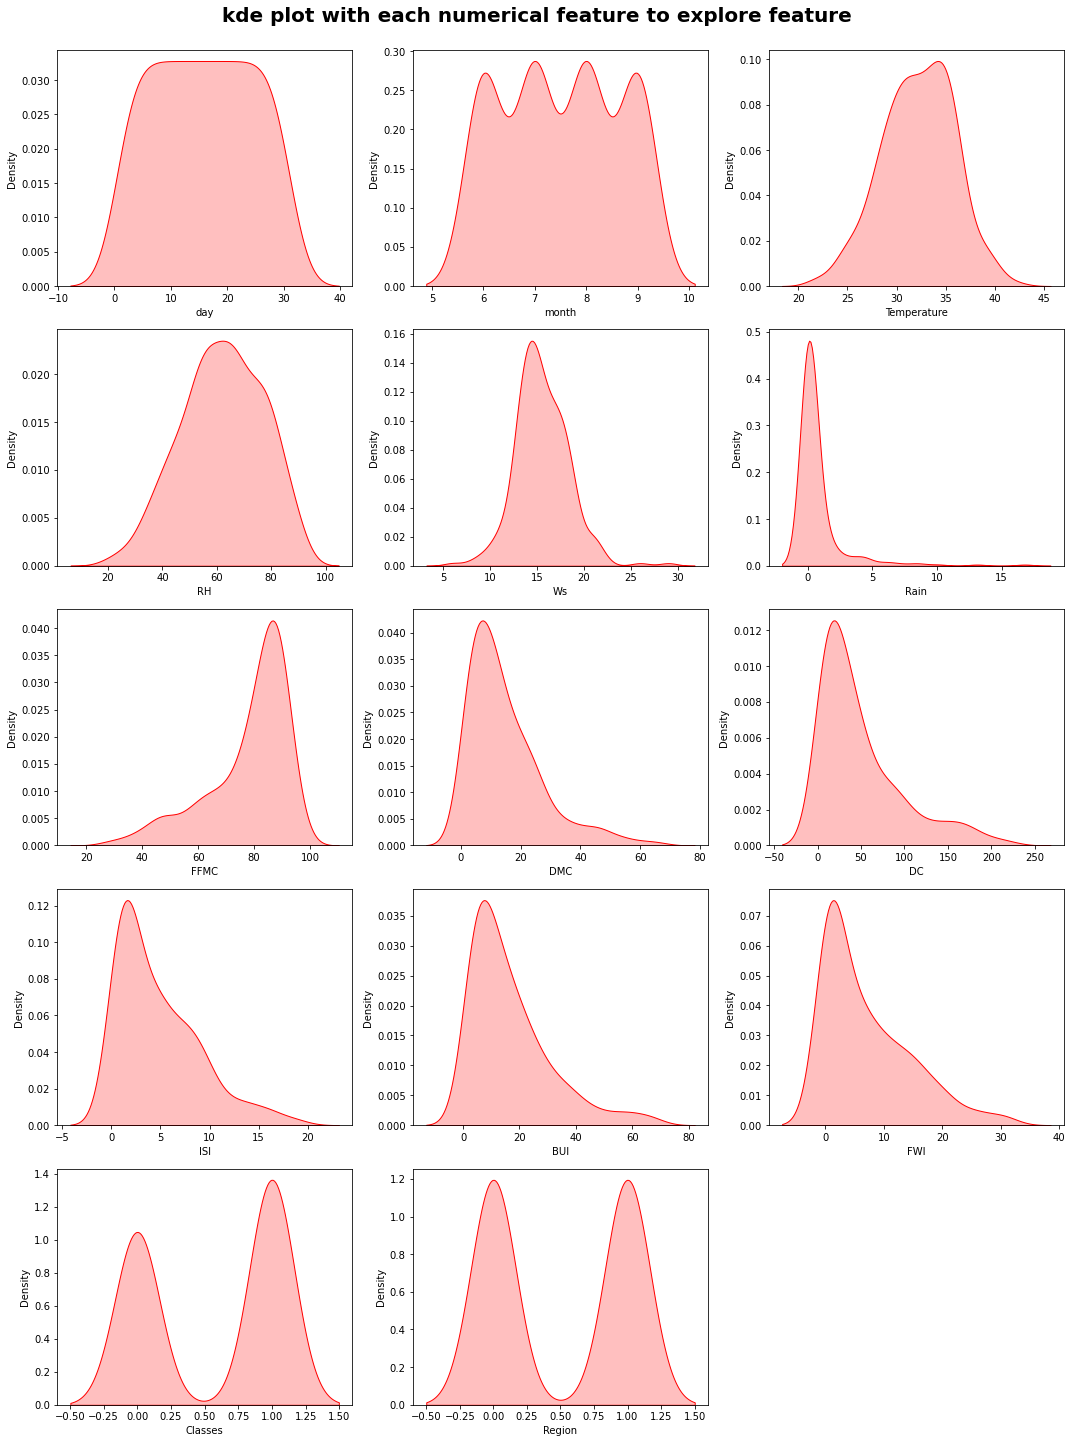

In [88]:
plt.figure(figsize=(15, 20))
plt.suptitle('kde plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[num[i]], data=df_copy, shade=True, color='r')
    plt.tight_layout()

<b><font color=blue>Observation</font>
- Rain, DMC, DC, ISI, BUI, FWI are log normal distribution.

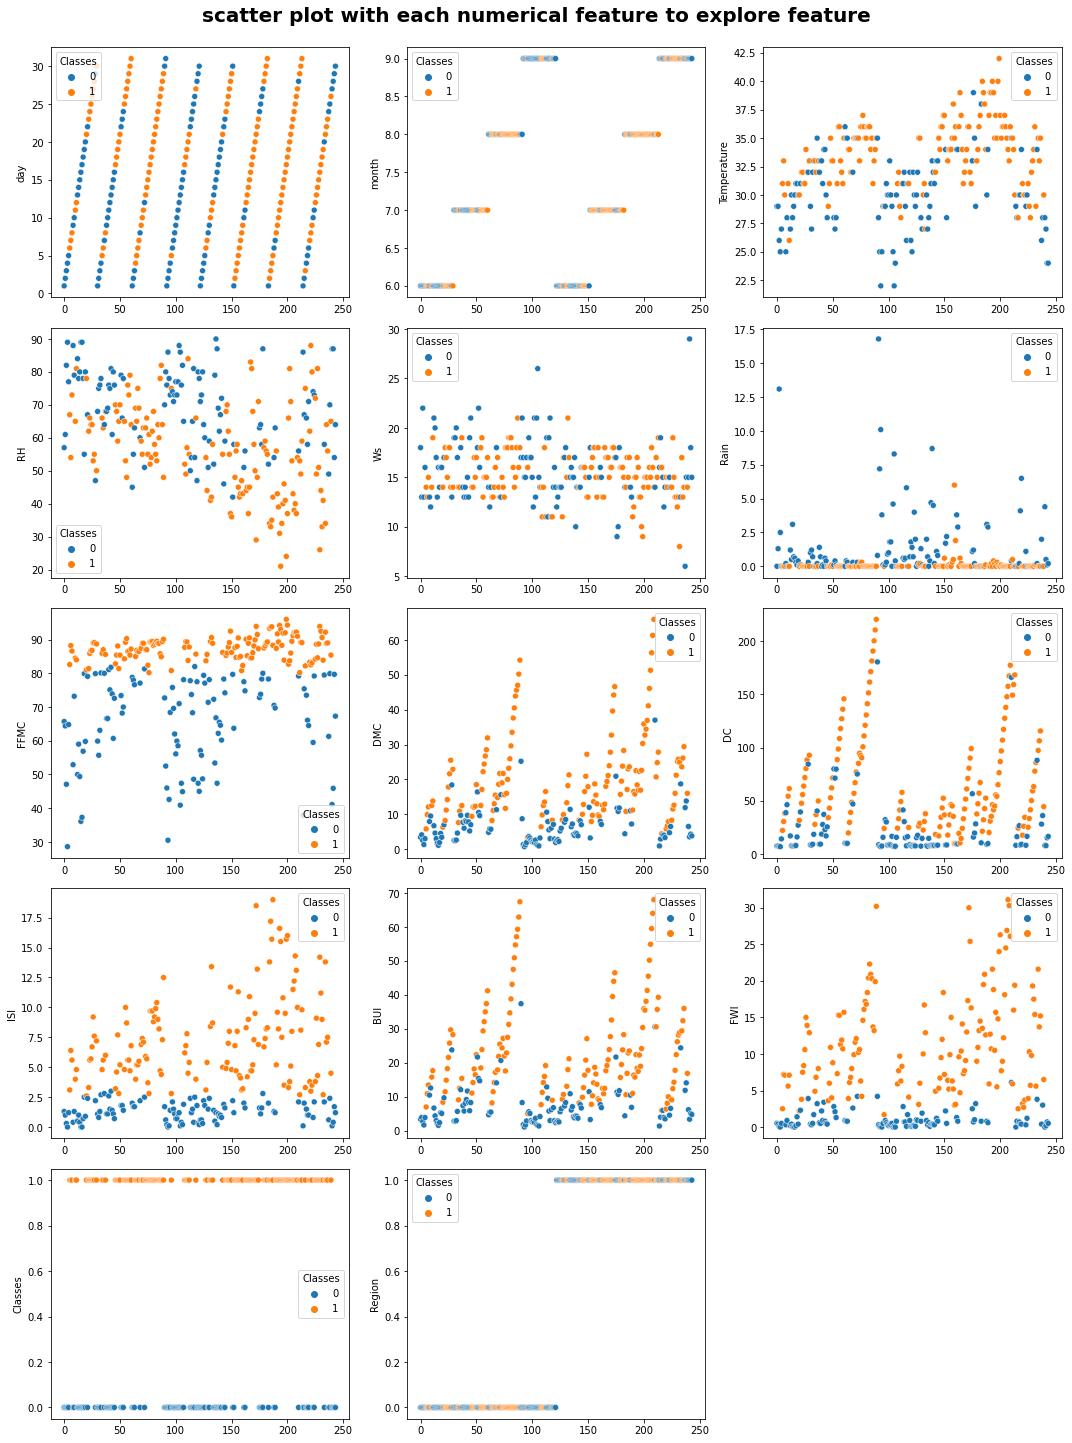

In [89]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=num[i], x=df_copy.index, data=df_copy, hue='Classes')
    plt.tight_layout()

#### Relation between Temperature and Relative Humidity 

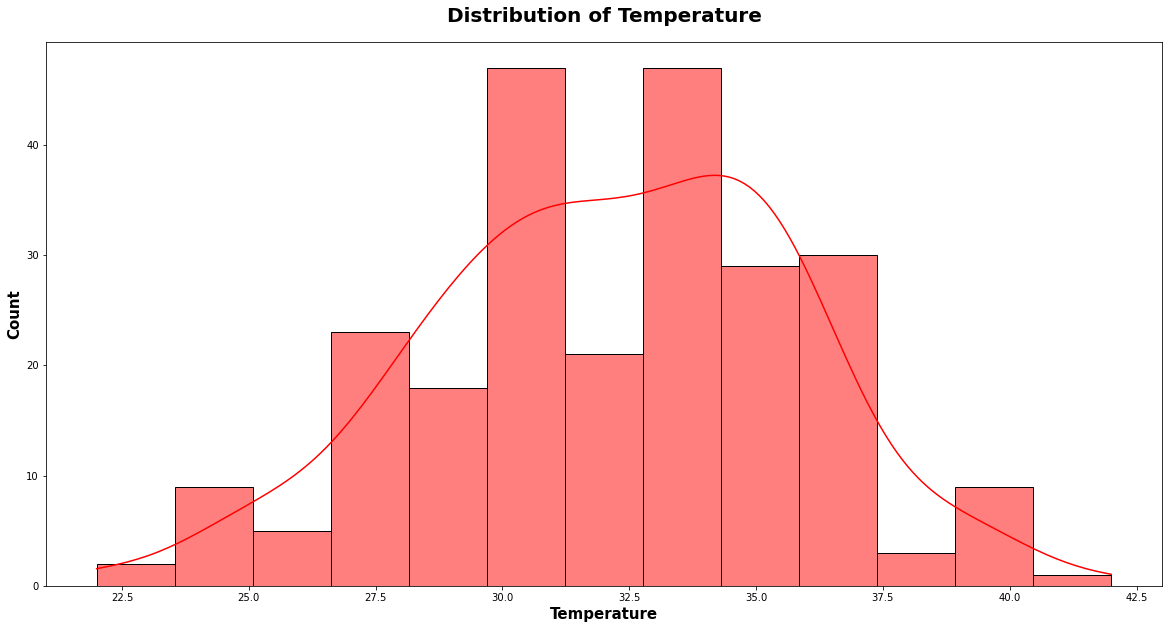

In [90]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df_copy.Temperature,color='r',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

<b><font color=blue>Observation</font>
- Temperature range is between 30.5 to 35.0 degree celcius.

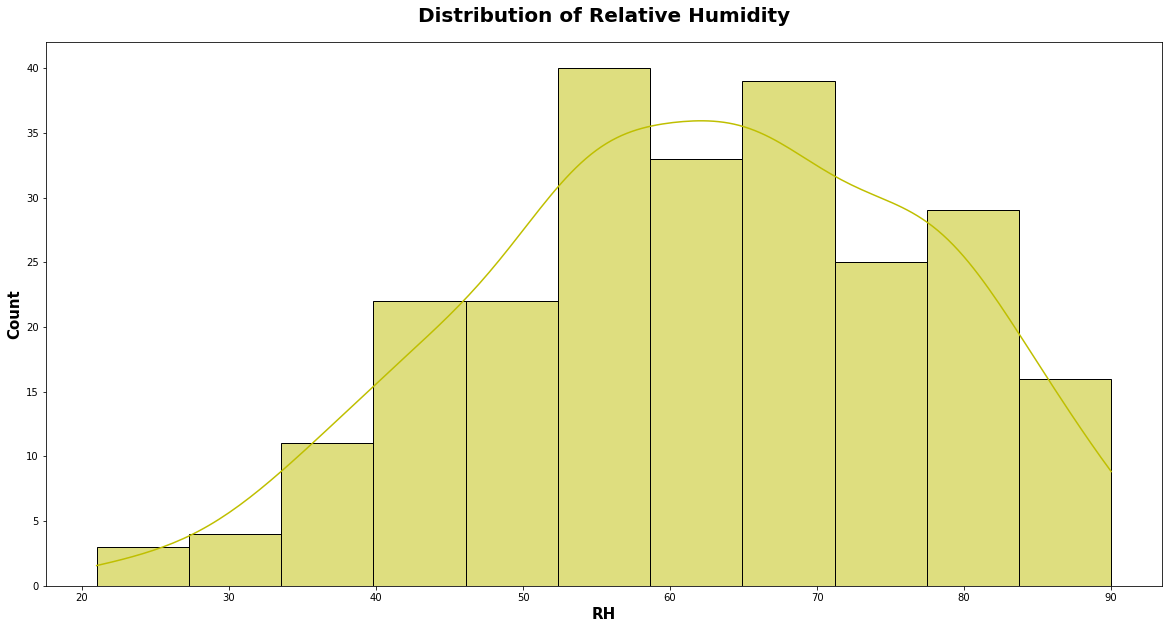

In [91]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Relative Humidity",x=df_copy.RH,color='y',kde=True)
plt.title("Distribution of Relative Humidity",weight='bold',fontsize=20,pad=20)
plt.xlabel("RH",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

#### discomfort index = relation between temperature and relative humidity

In [92]:
discomfort_index=df_copy.groupby(['Temperature', 'RH']).size()

In [93]:
discomfort_index.head(5)

Temperature  RH
22           76    1
             86    1
24           54    1
             64    1
             82    1
dtype: int64

<b><font color=blue>Observation</font>
- this output also shows same that as the temperature goes down the relative humidity goes up.

#### Relation between temperature and month

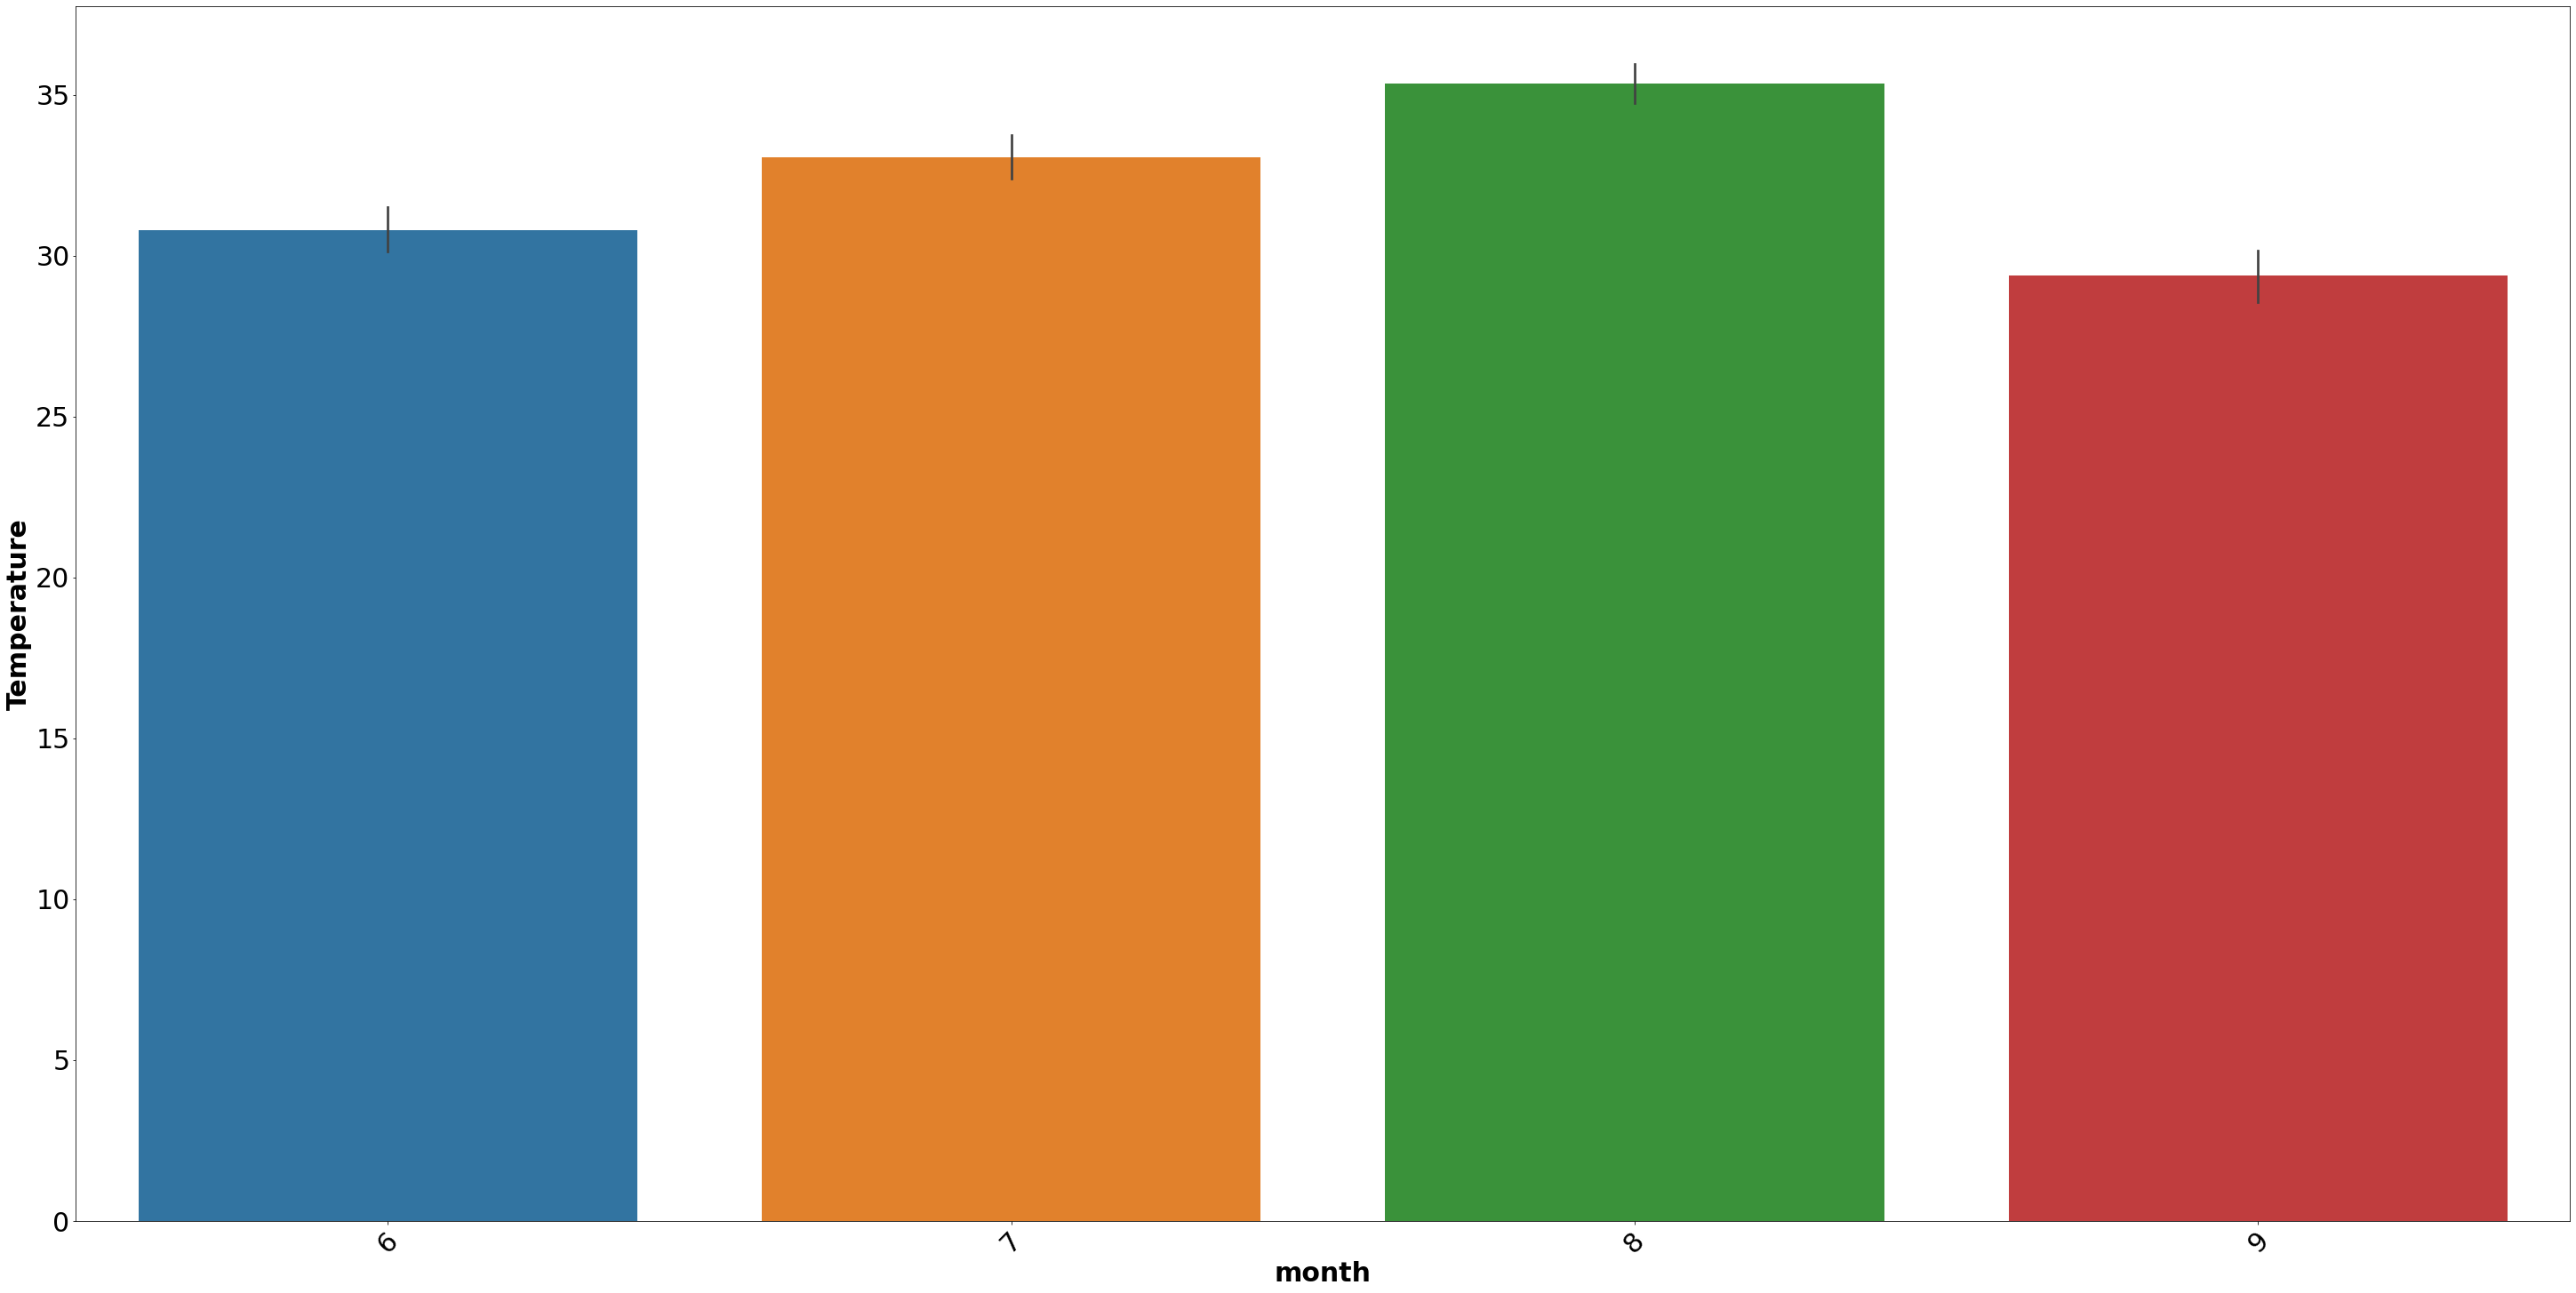

In [94]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='month', y='Temperature', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('month',weight='bold', fontsize=30);
plt.ylabel('Temperature',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- the month of july and August experiences highest temperature in the entire year.

#### Relation between Relative Humidity (RH) and month

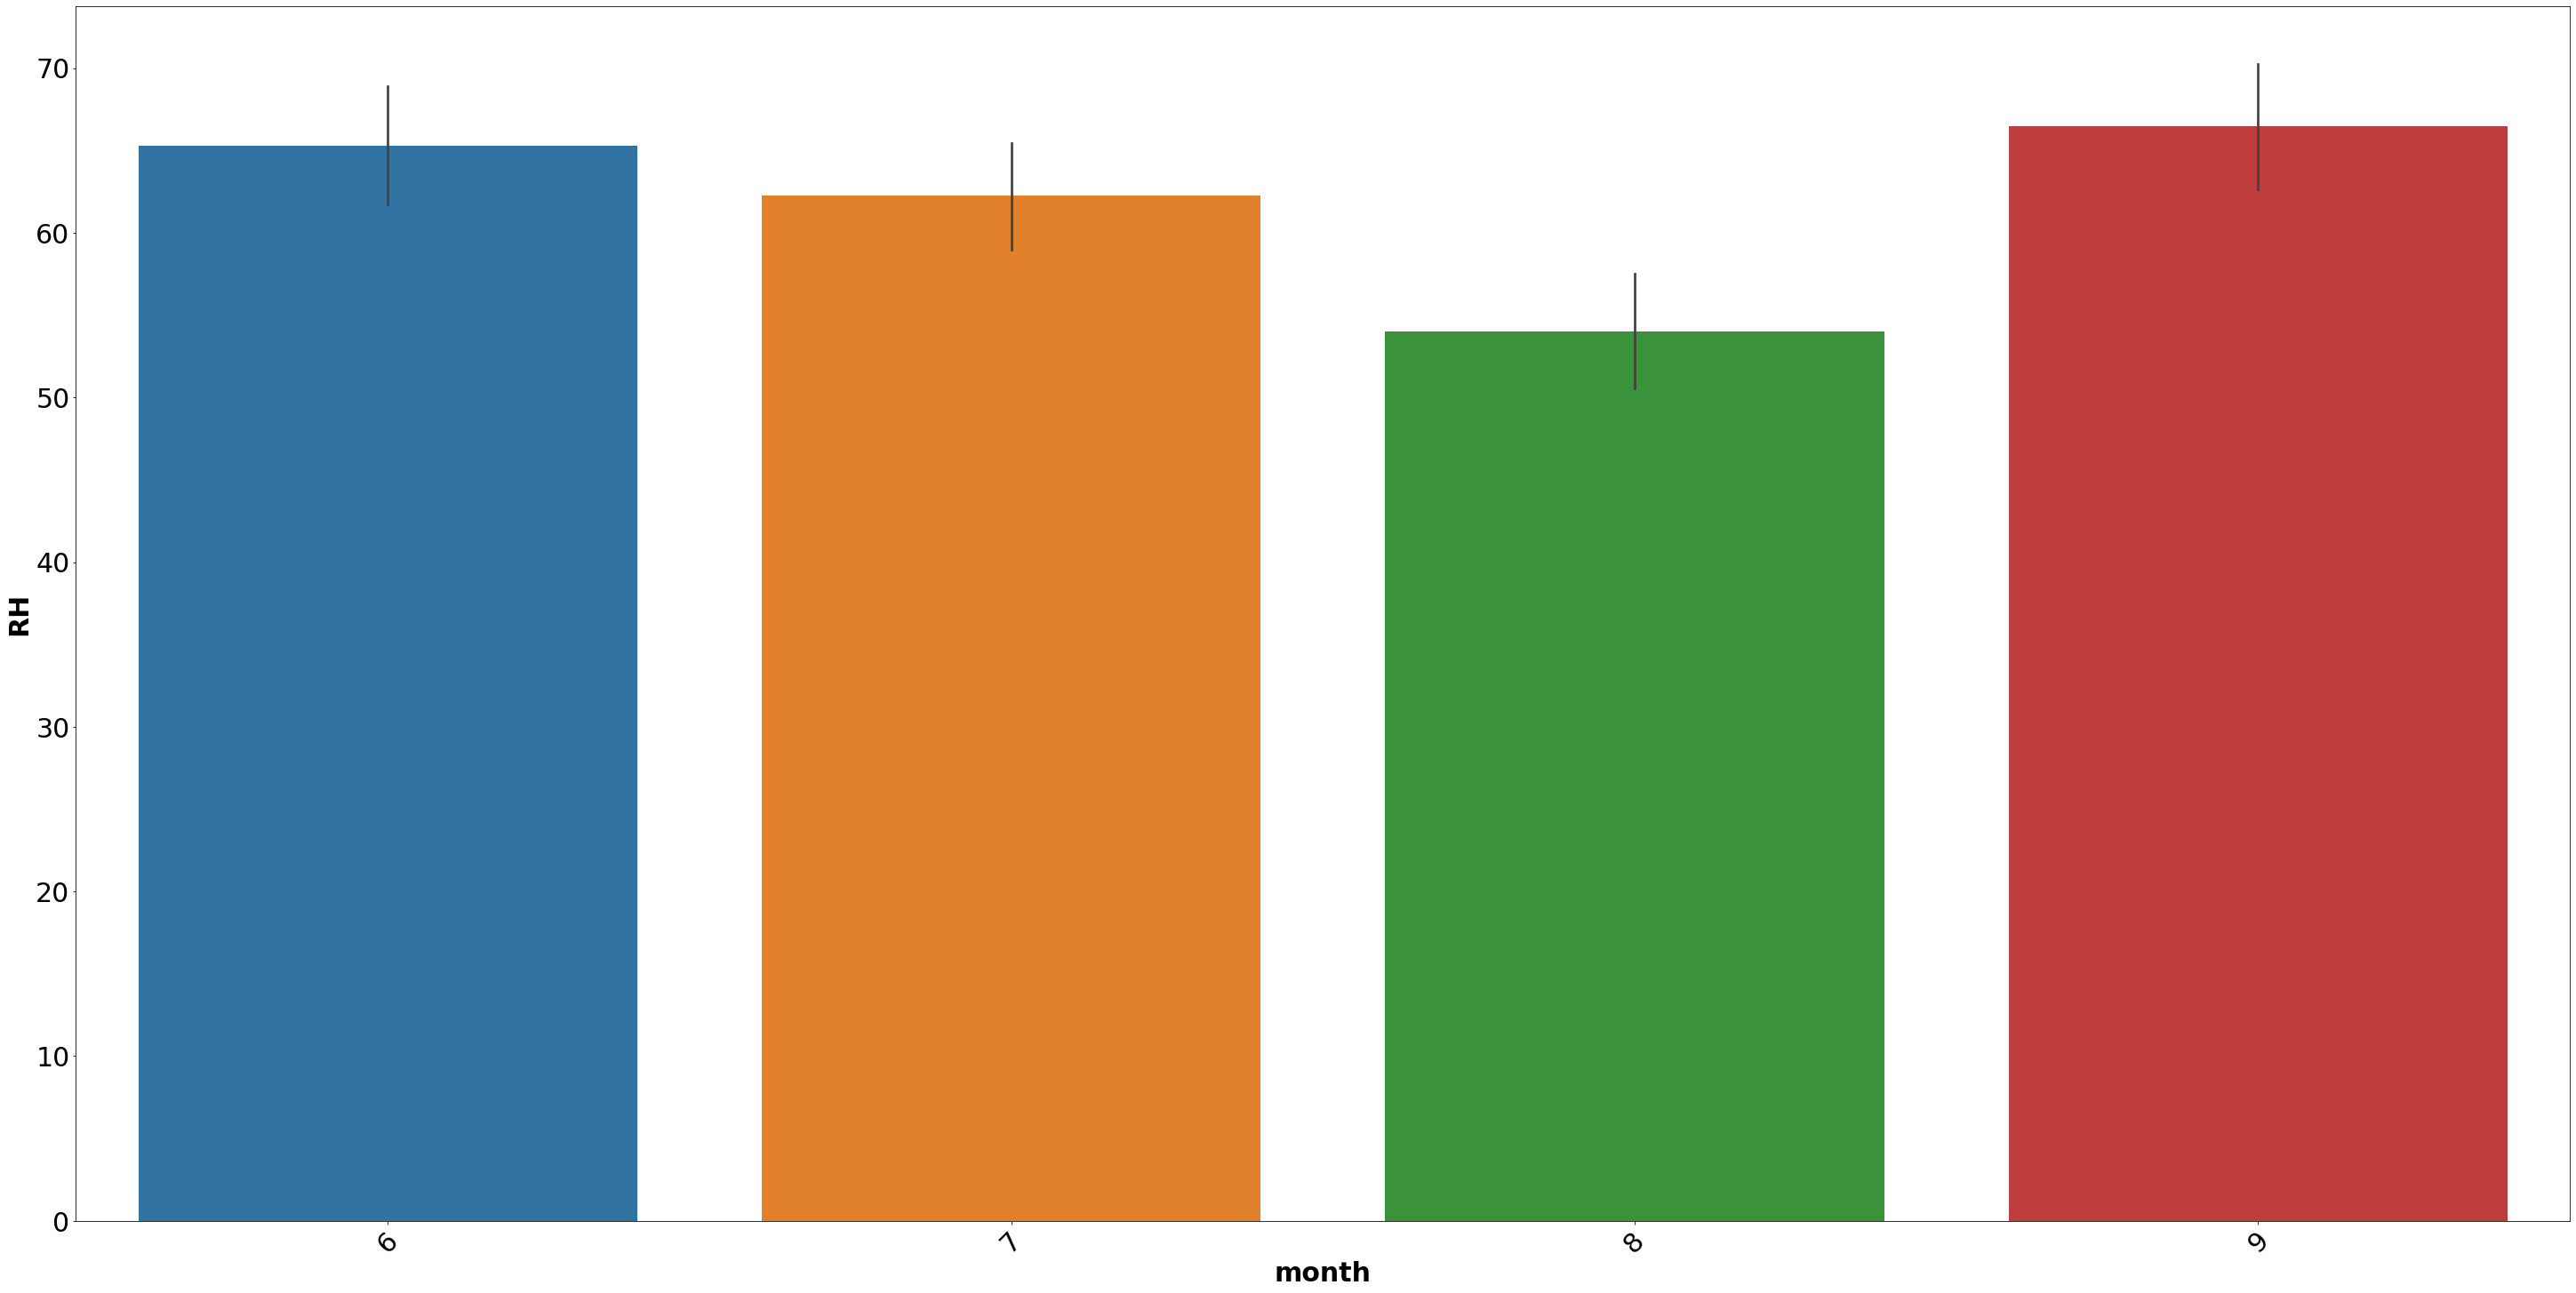

In [95]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='month', y='RH', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('month',weight='bold', fontsize=30);
plt.ylabel('RH',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- As per the temperature chart the lowest temperature experienced on 9th month i.e. september.
- So the Relative Humidity would be highest on 9th month i.e. september.

#### Relation between Rain and month

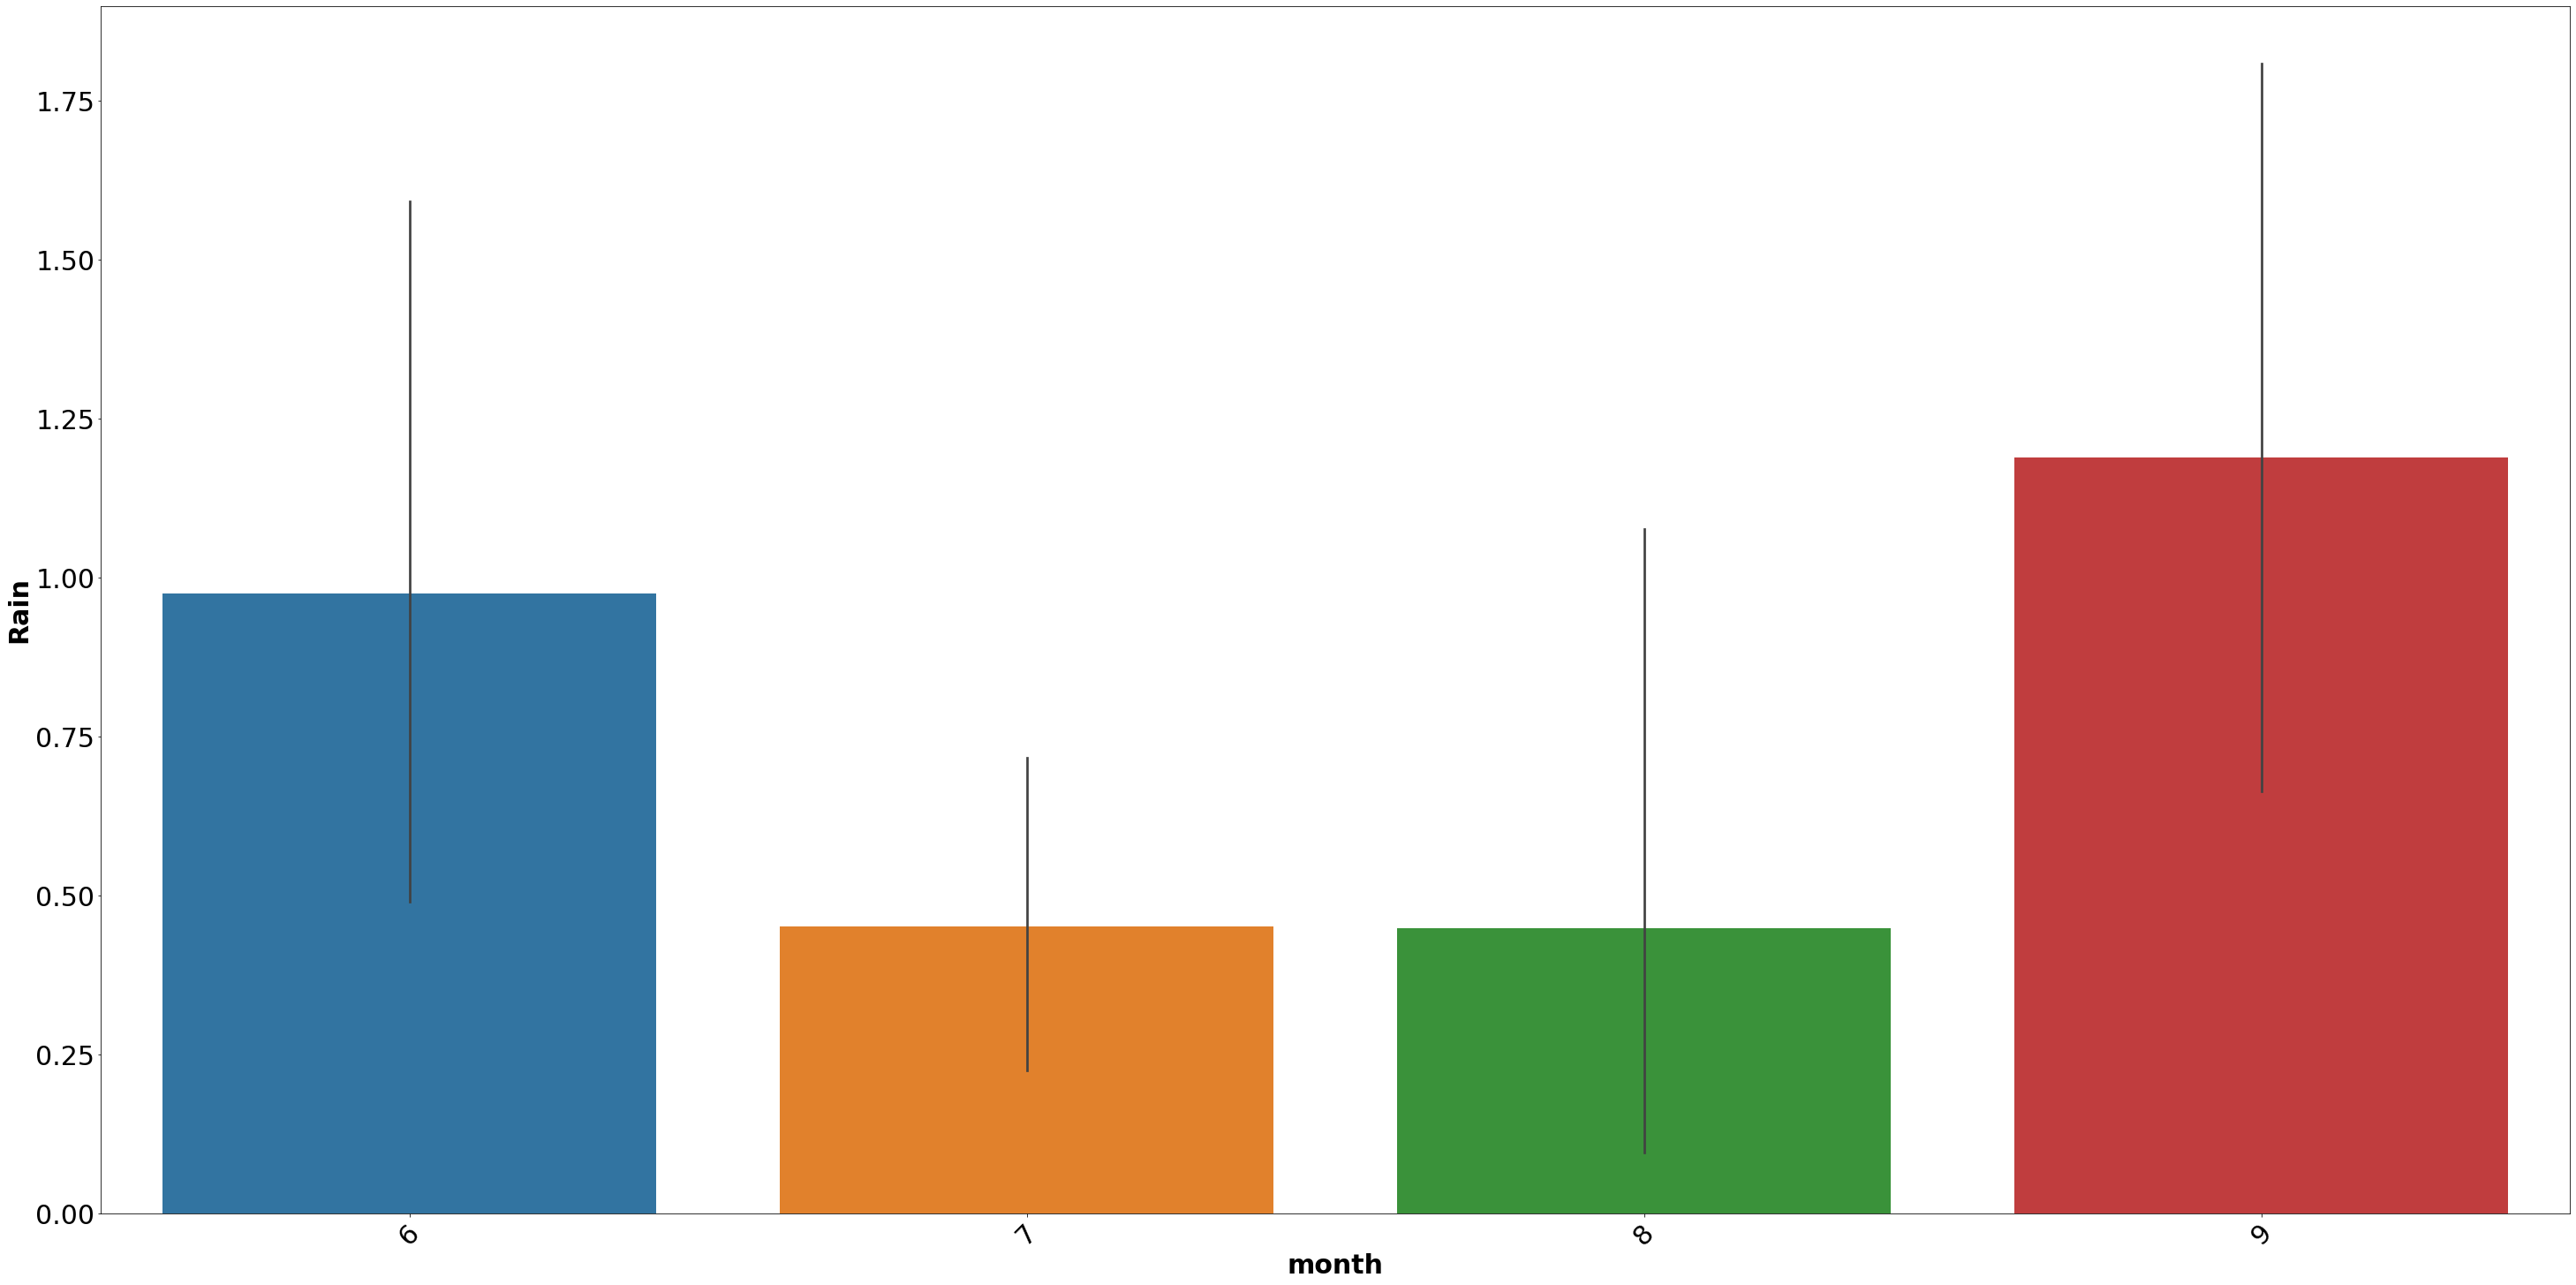

In [96]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='month', y='Rain', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('month',weight='bold', fontsize=30);
plt.ylabel('Rain',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- 9th month i.e. september of the year 2012 experiences highest rainfall.

#### Relation between Wind speed (Ws) and month

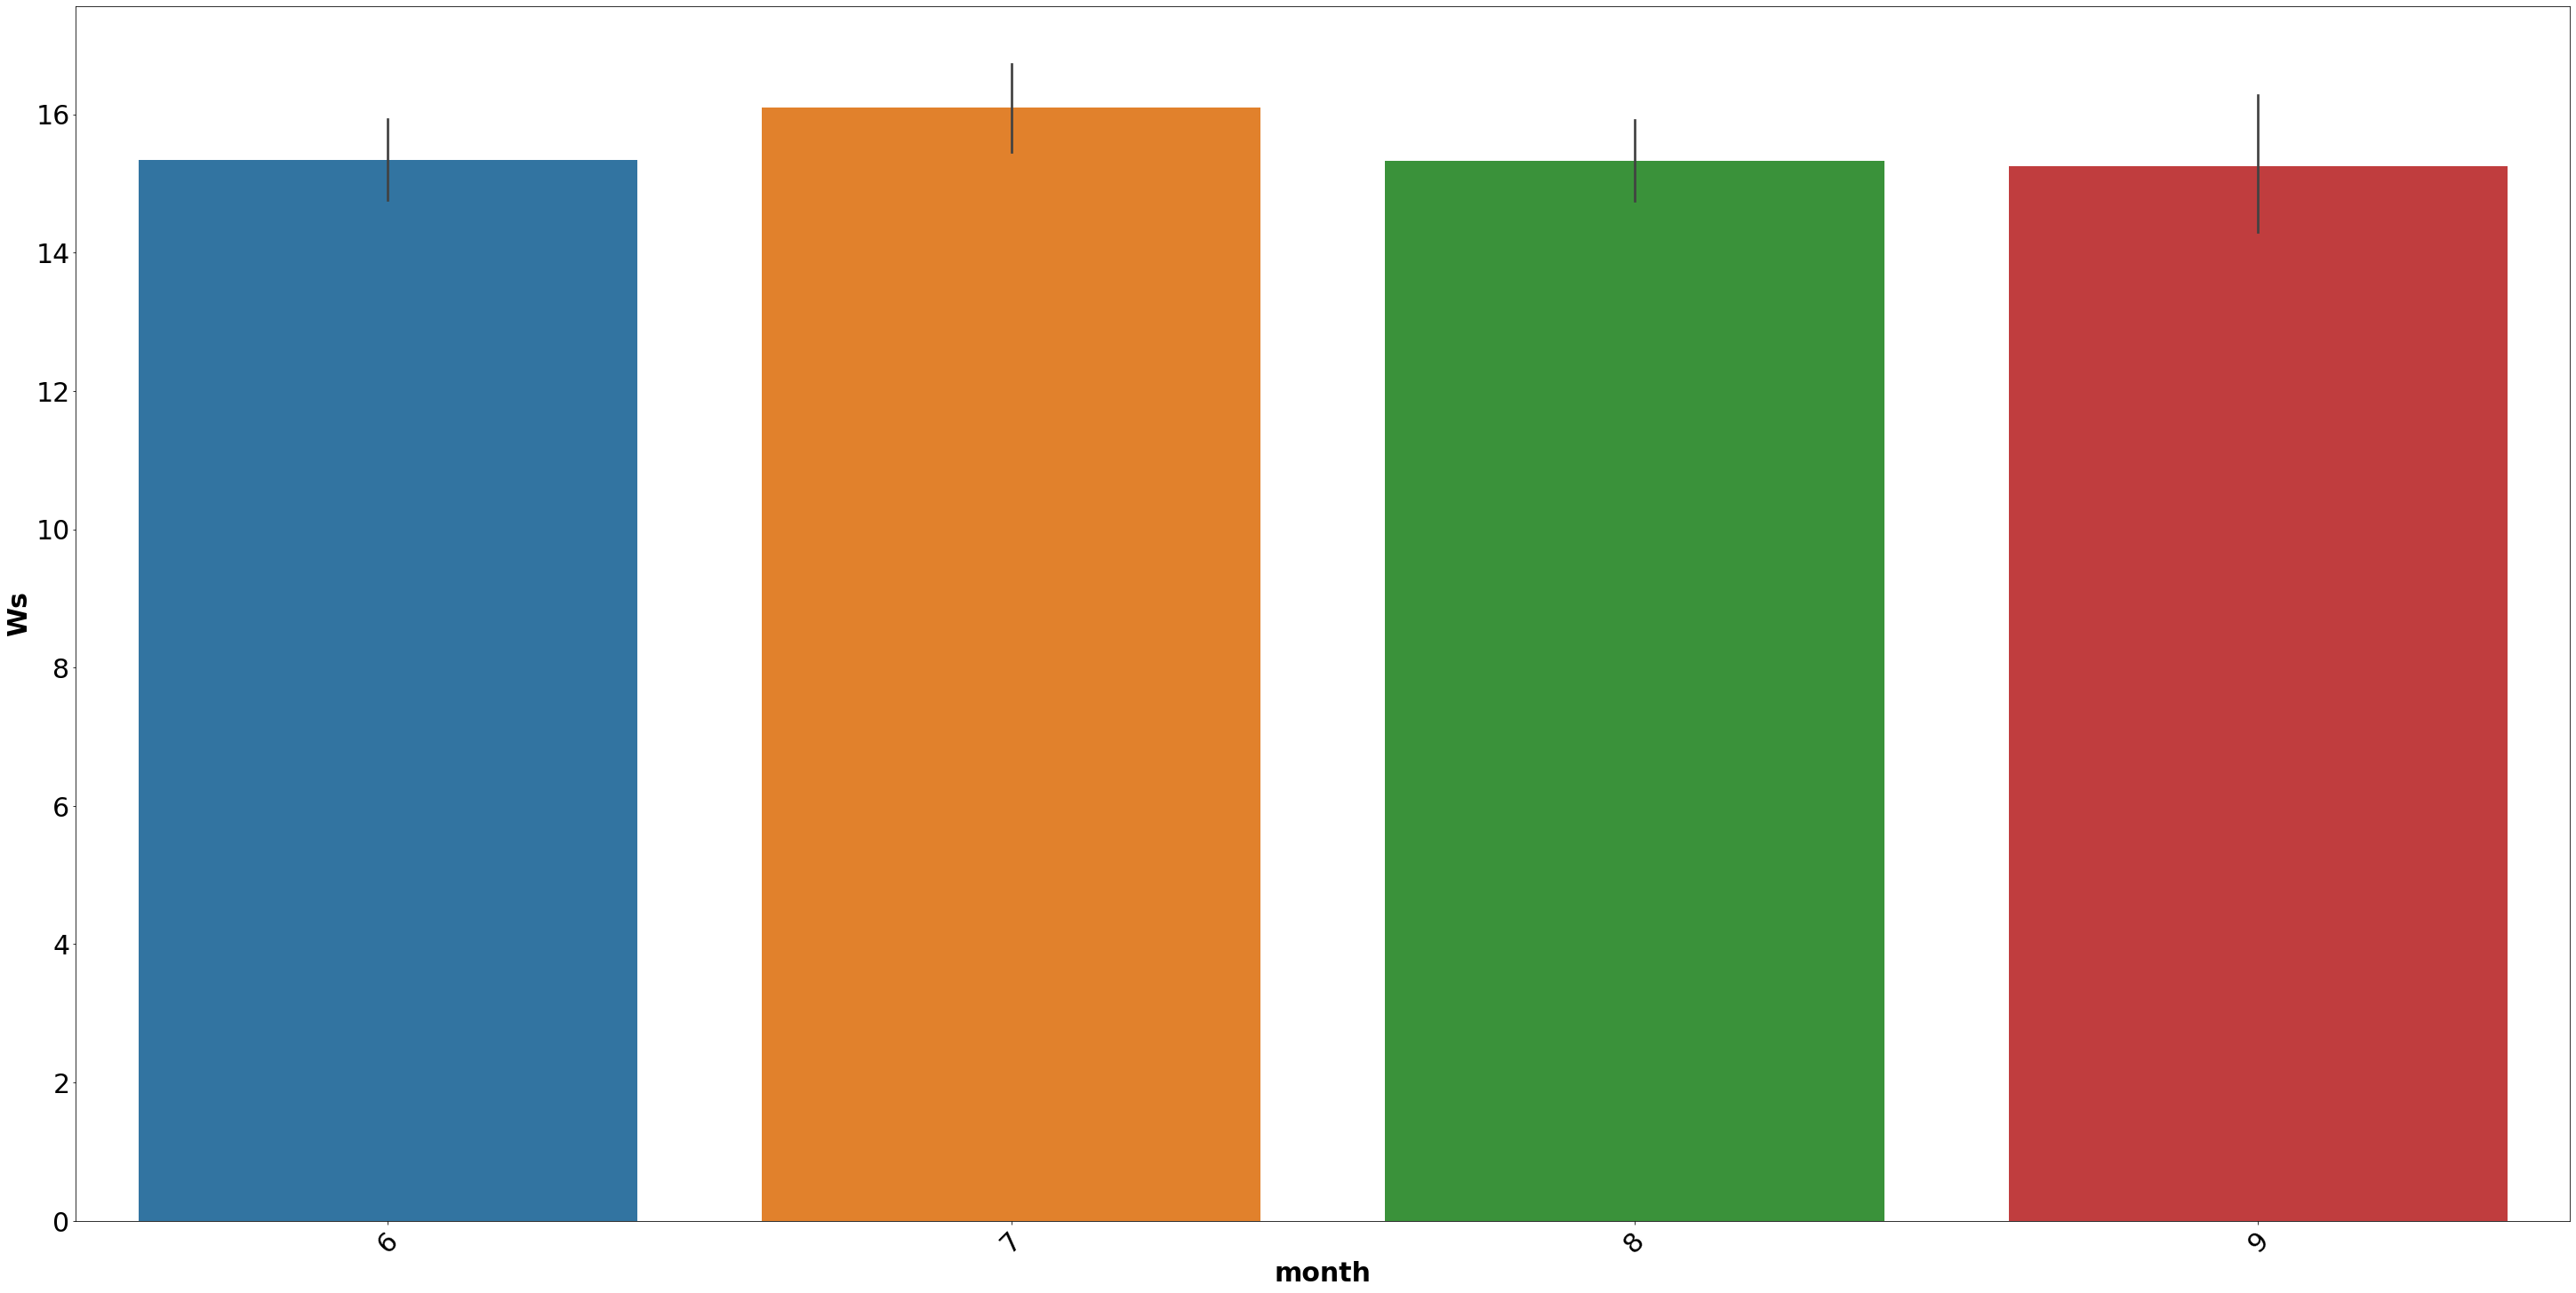

In [97]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='month', y='Ws', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('month',weight='bold', fontsize=30);
plt.ylabel('Ws',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- 7th month i.e. july experiences of the year 2012 highest wind speed.

#### Relation between temperature and Wind speed (Ws)

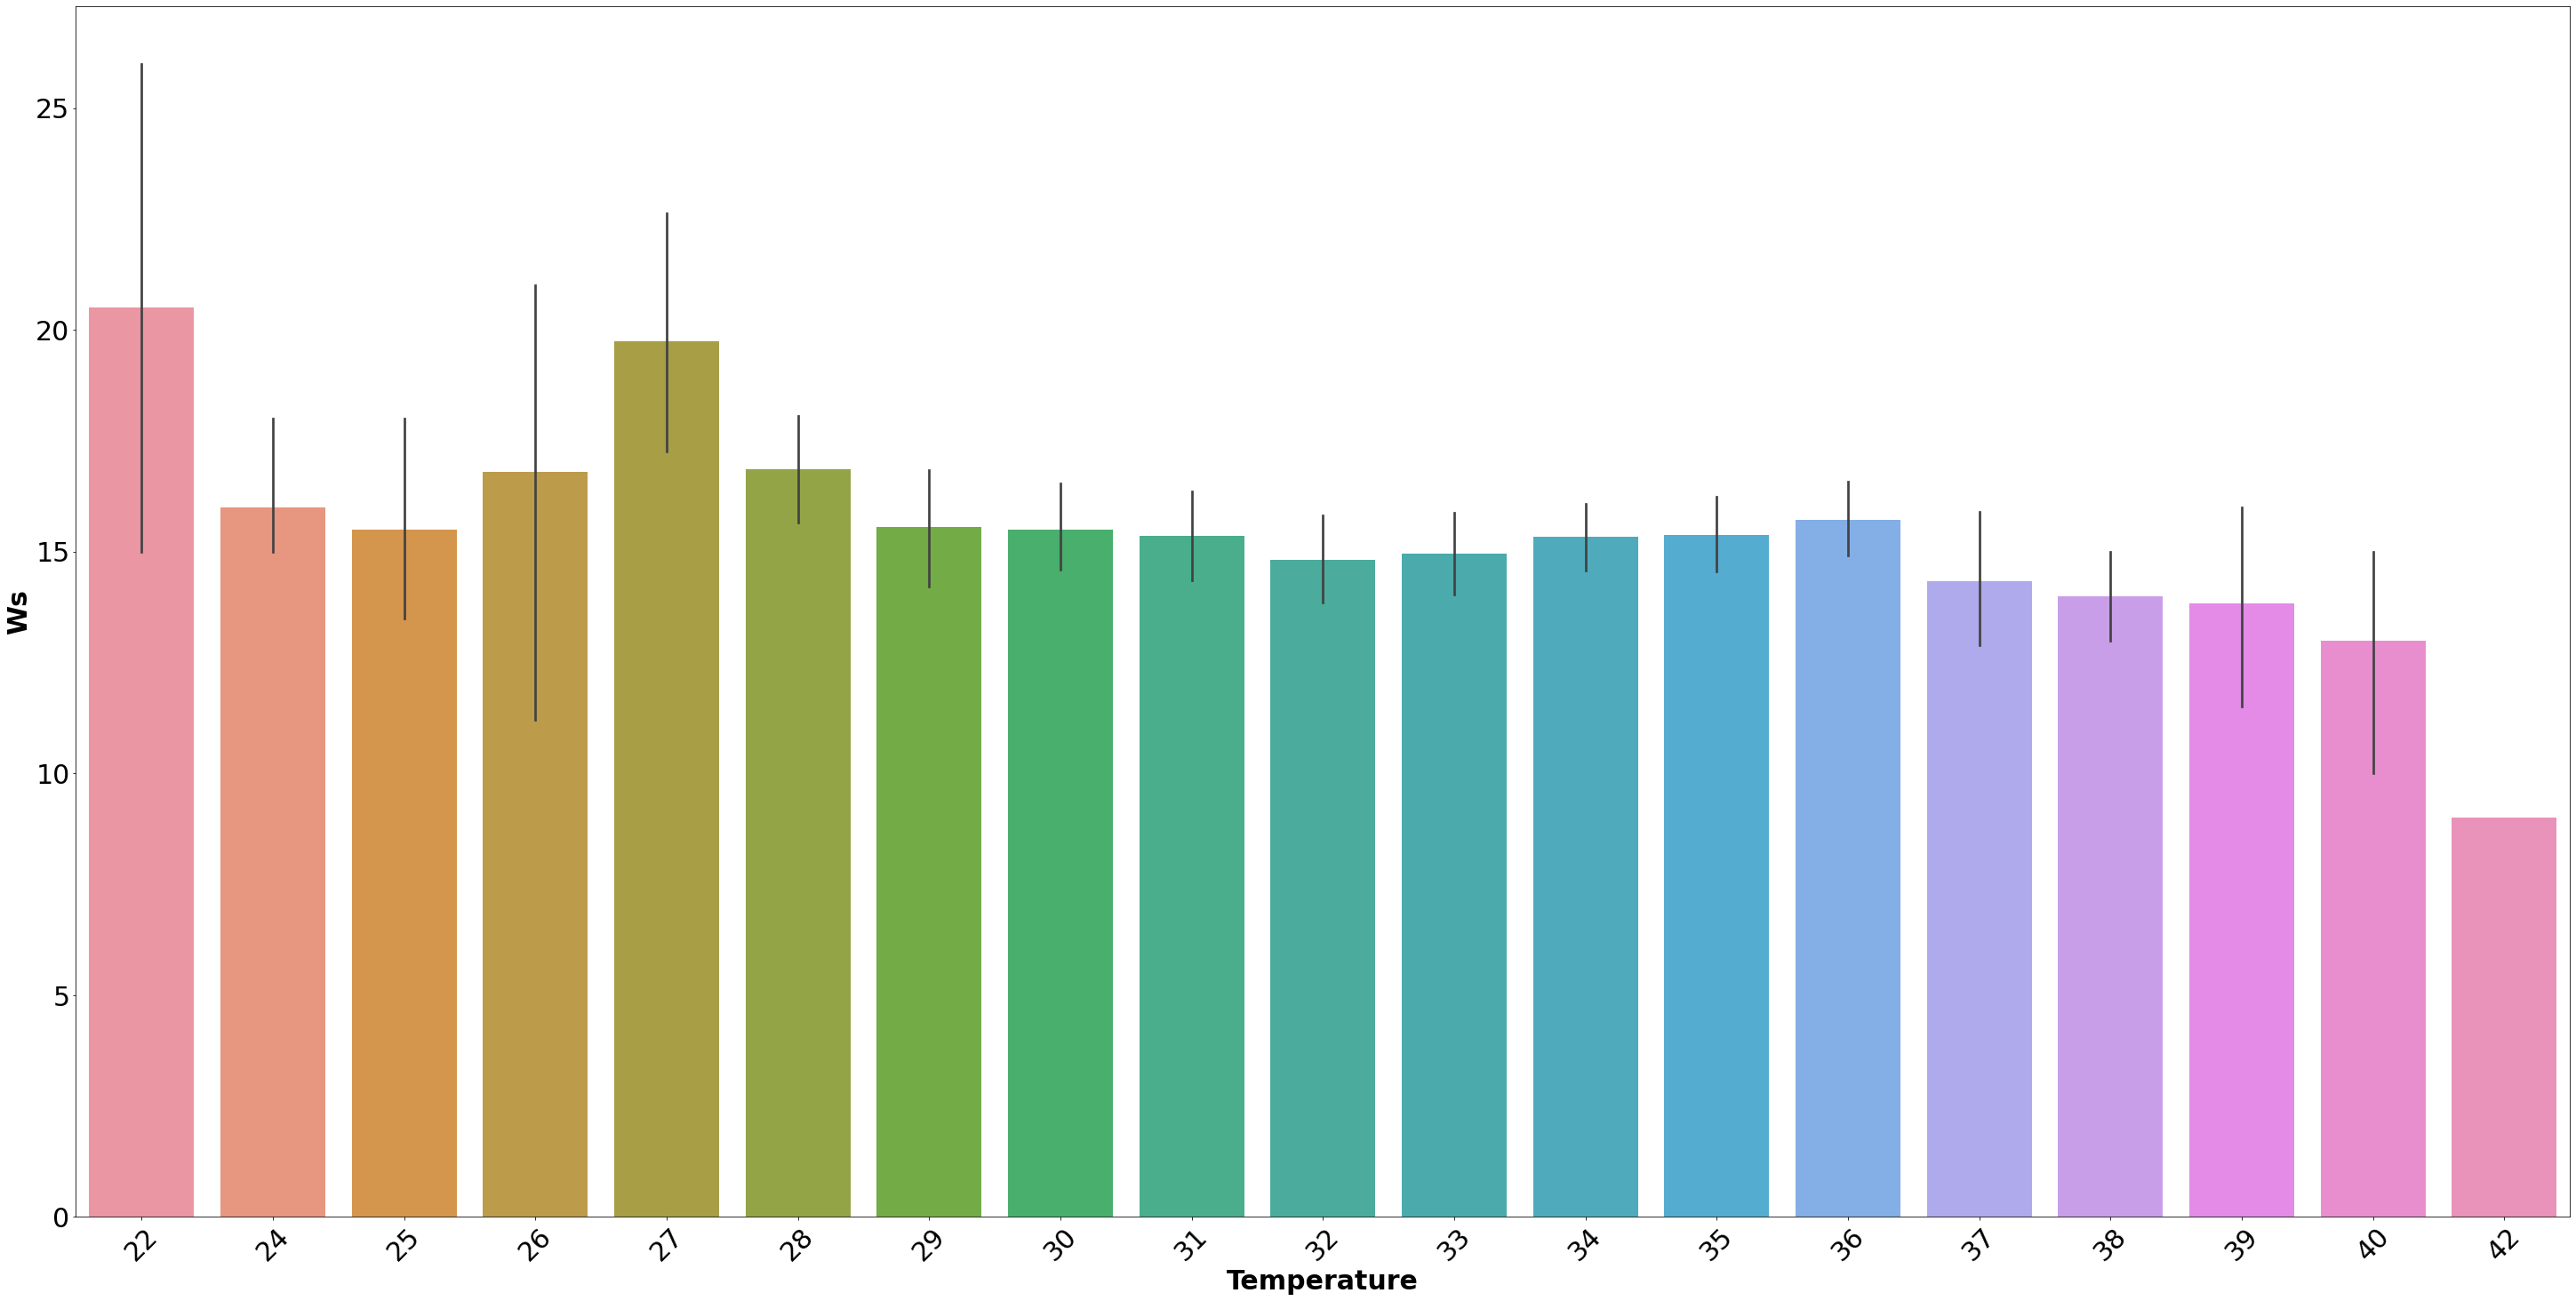

In [98]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Temperature', y='Ws', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Temperature',weight='bold', fontsize=30);
plt.ylabel('Ws',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- On temperature 22 degree celcius the Wind speed is highest.

#### Relation between temperature and Rain

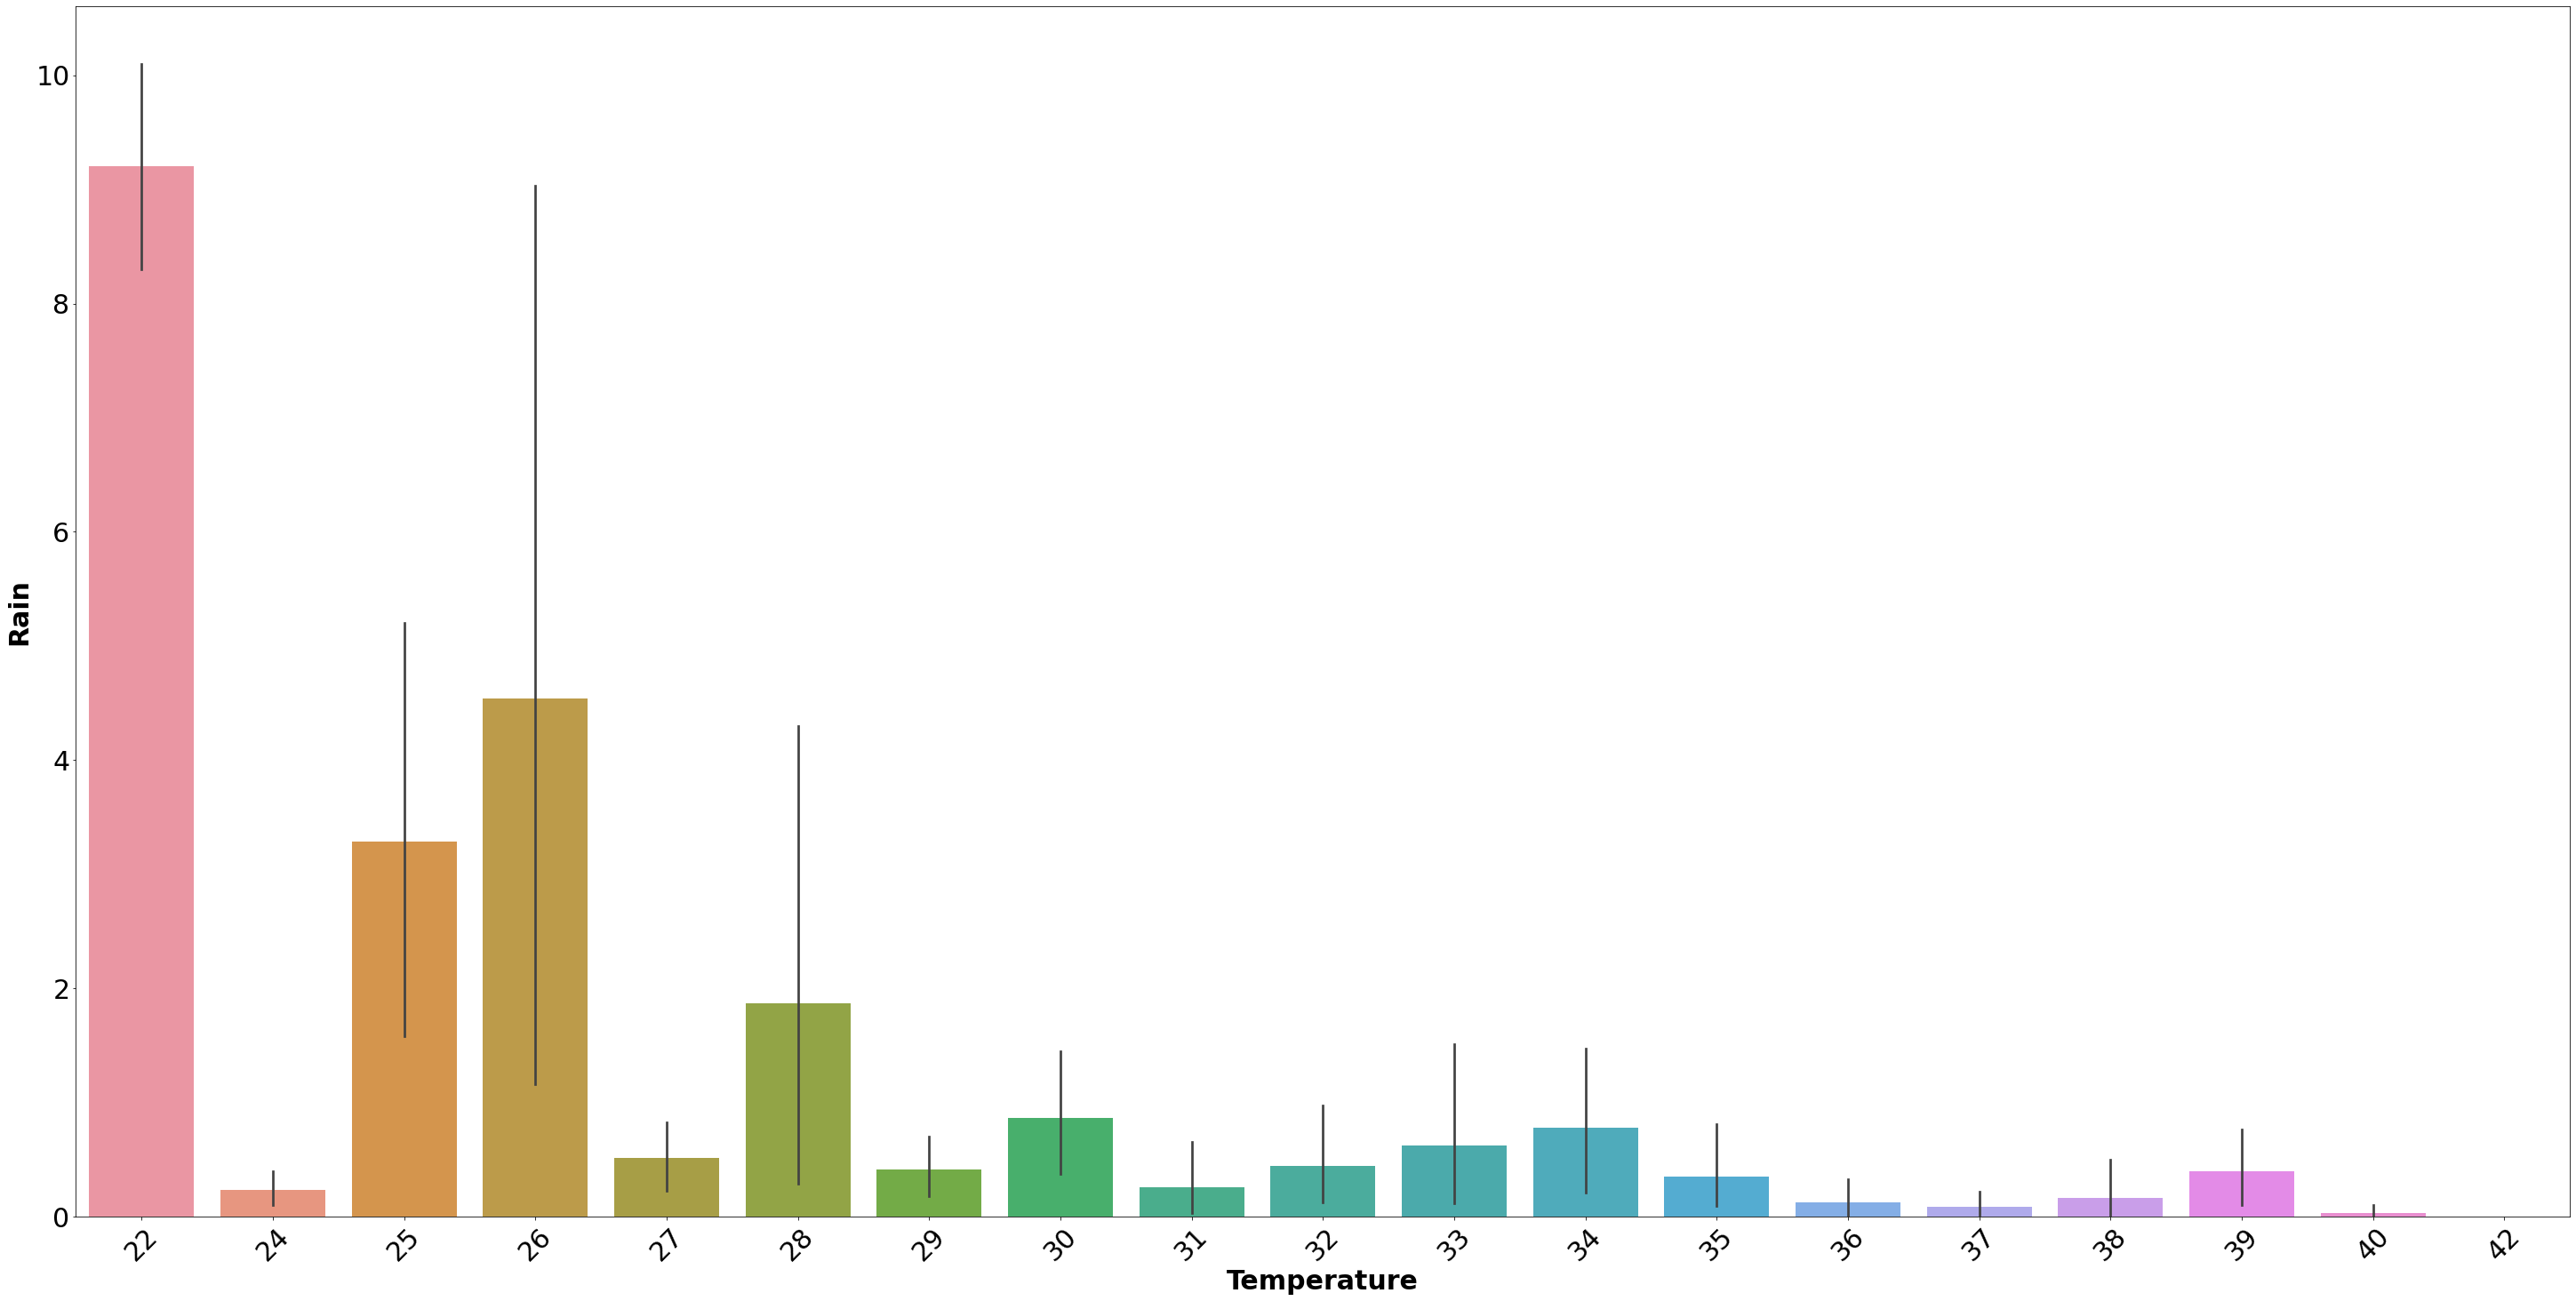

In [99]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Temperature', y='Rain', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Temperature',weight='bold', fontsize=30);
plt.ylabel('Rain',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- On temperature 22 degree celcius the Rainfall is highest. 

#### Relation between temperature and Relative Humidity (RH)

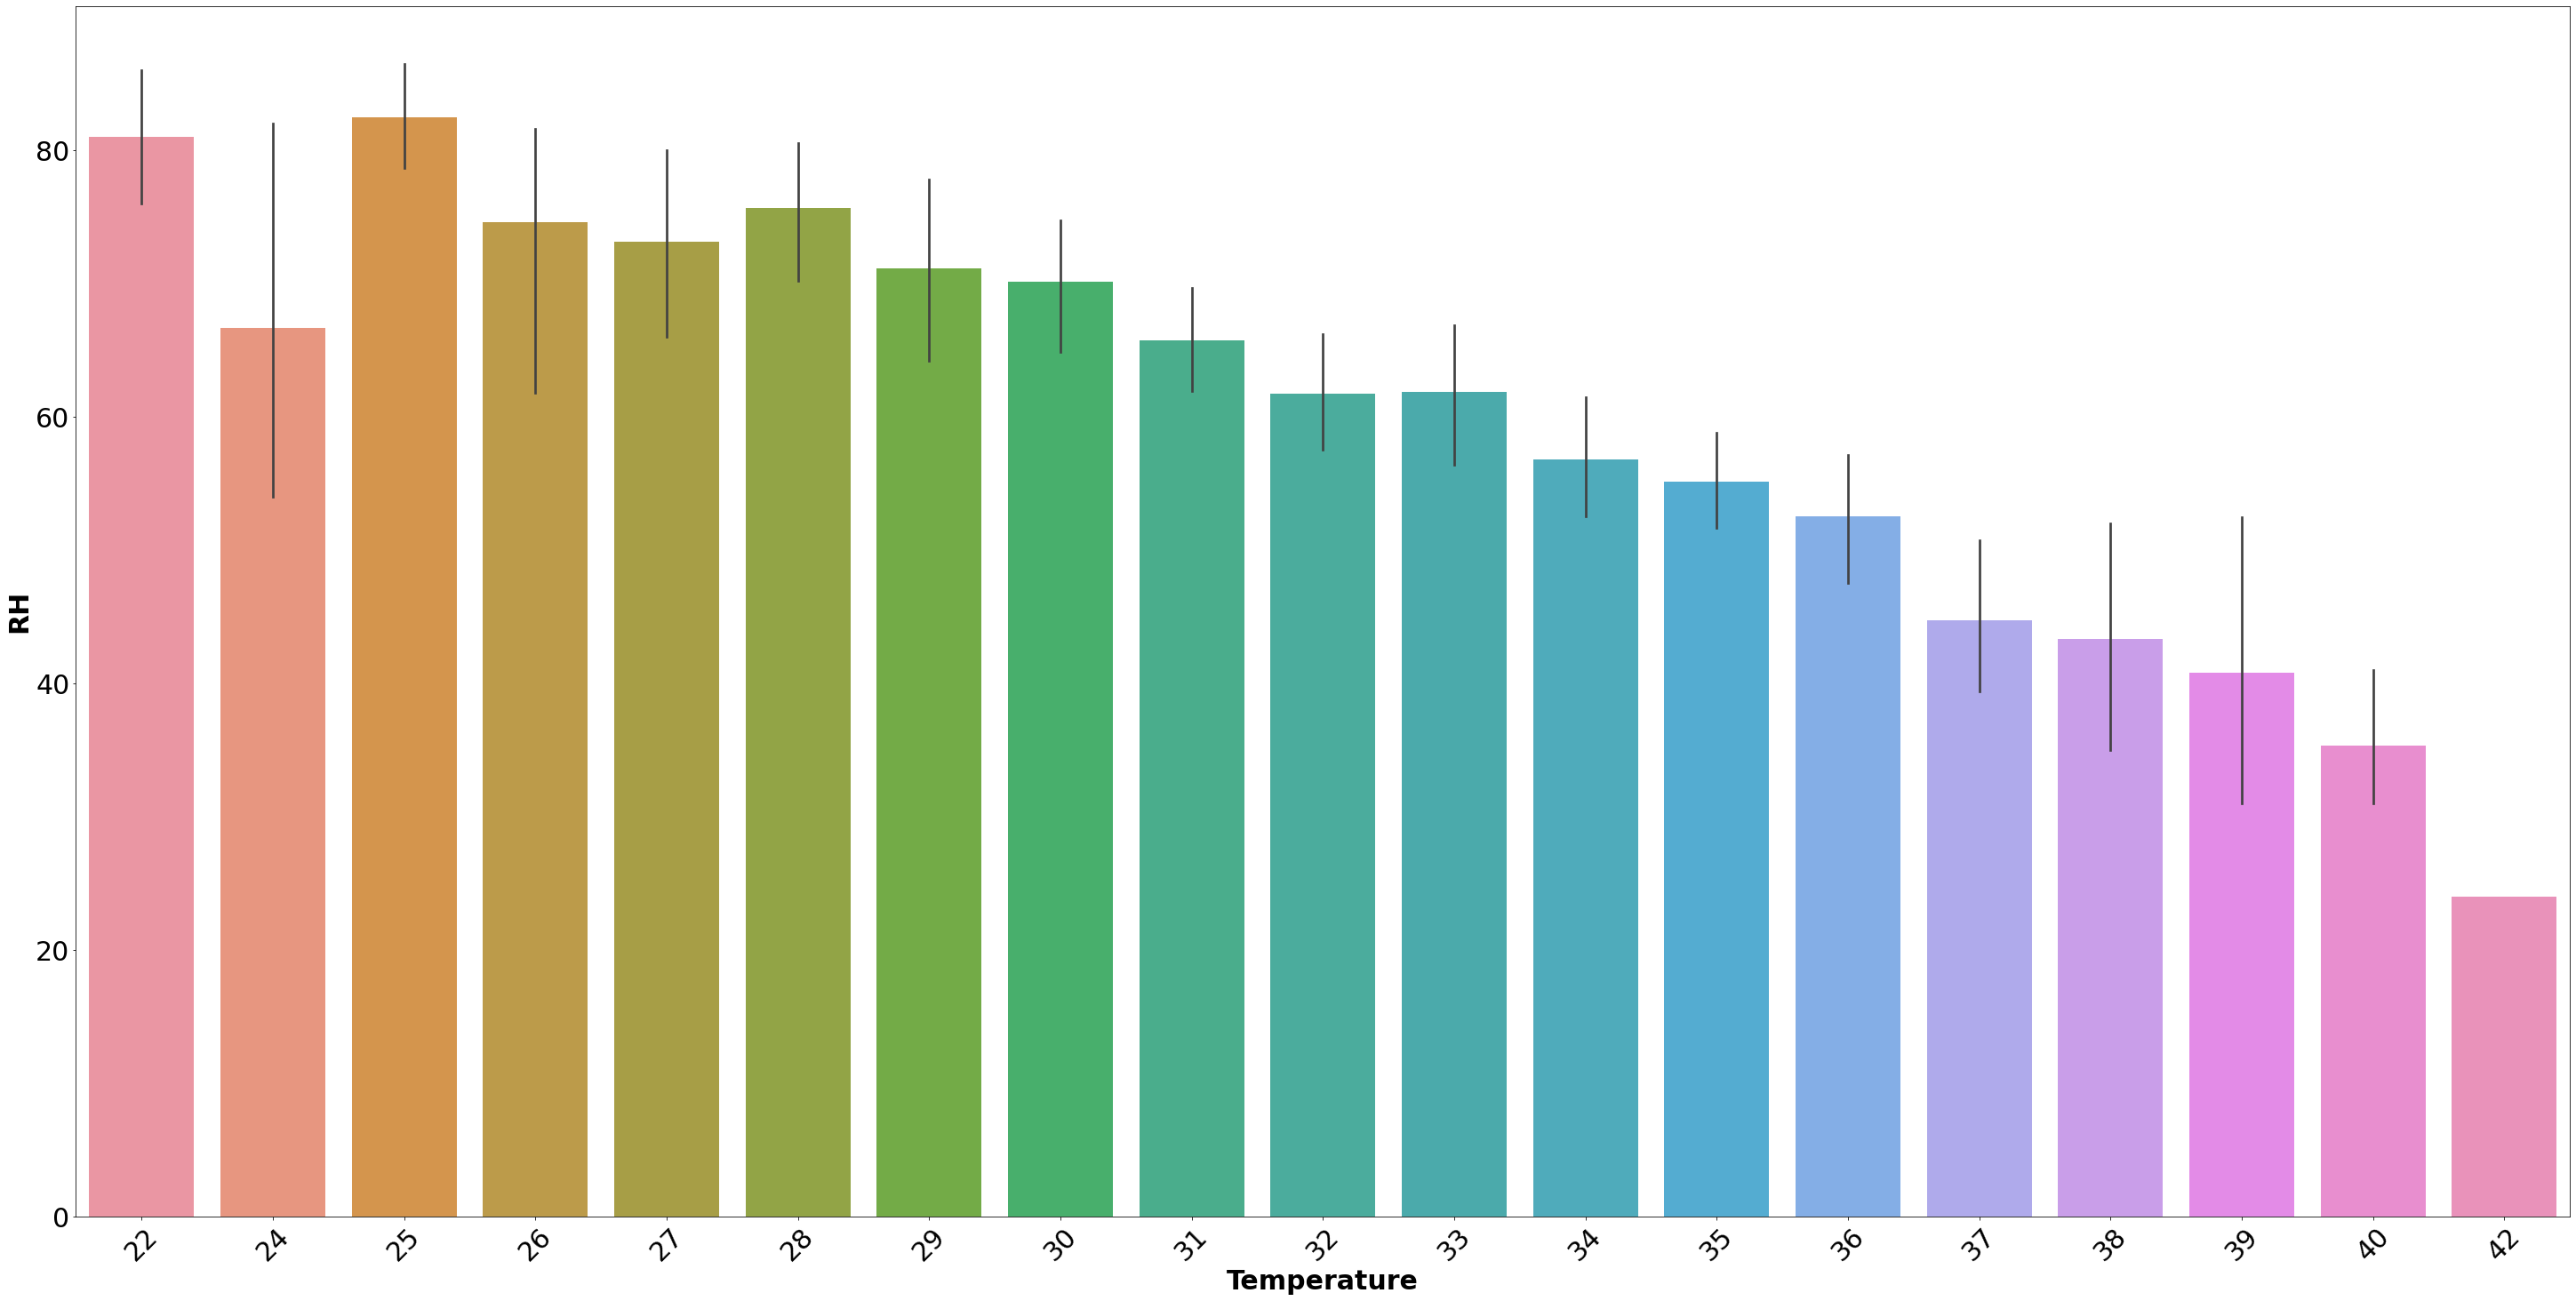

In [100]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Temperature', y='RH', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Temperature',weight='bold', fontsize=30);
plt.ylabel('RH',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- As we know that the Temperature and RH are inversely proportional.
- At 25 degree celcius we have highest relative humidity as compared to 42 degree celcius.

#### Relation between Classes and Relative Humidity

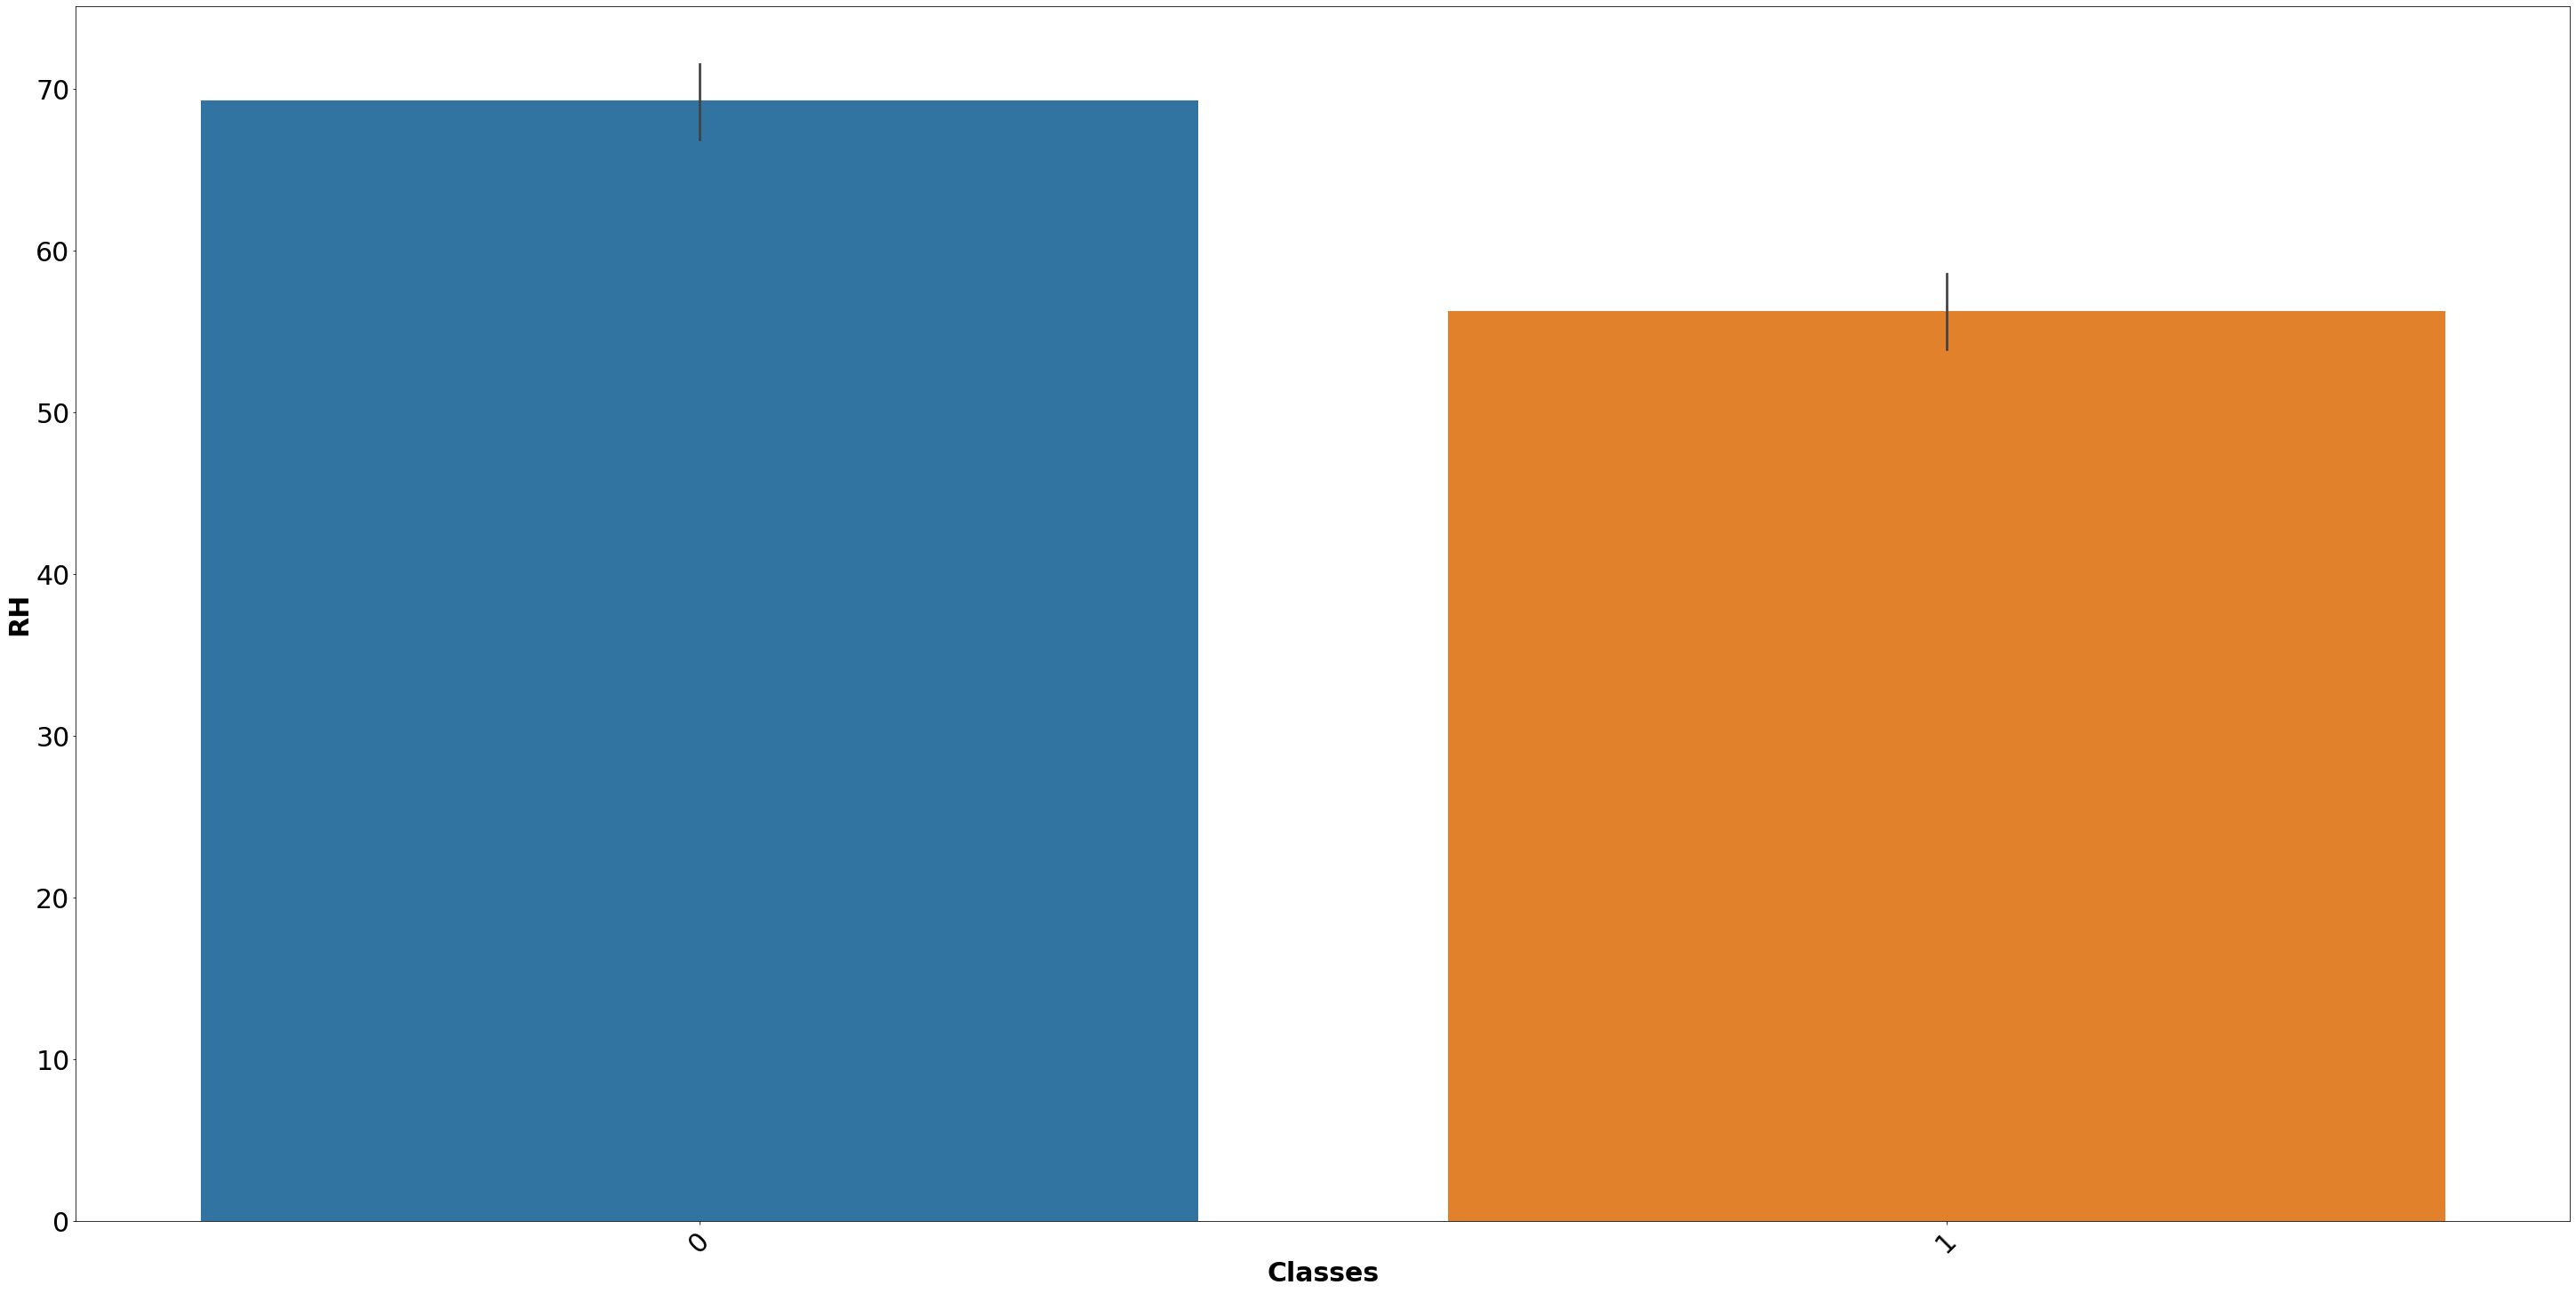

In [101]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Classes', y='RH', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Classes',weight='bold', fontsize=30);
plt.ylabel('RH',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- As the Relative Humidity goes high the water droplets in the atmosphere gets increases the chances of catching forest fire decreases.

#### Relation between Classes and Temperature

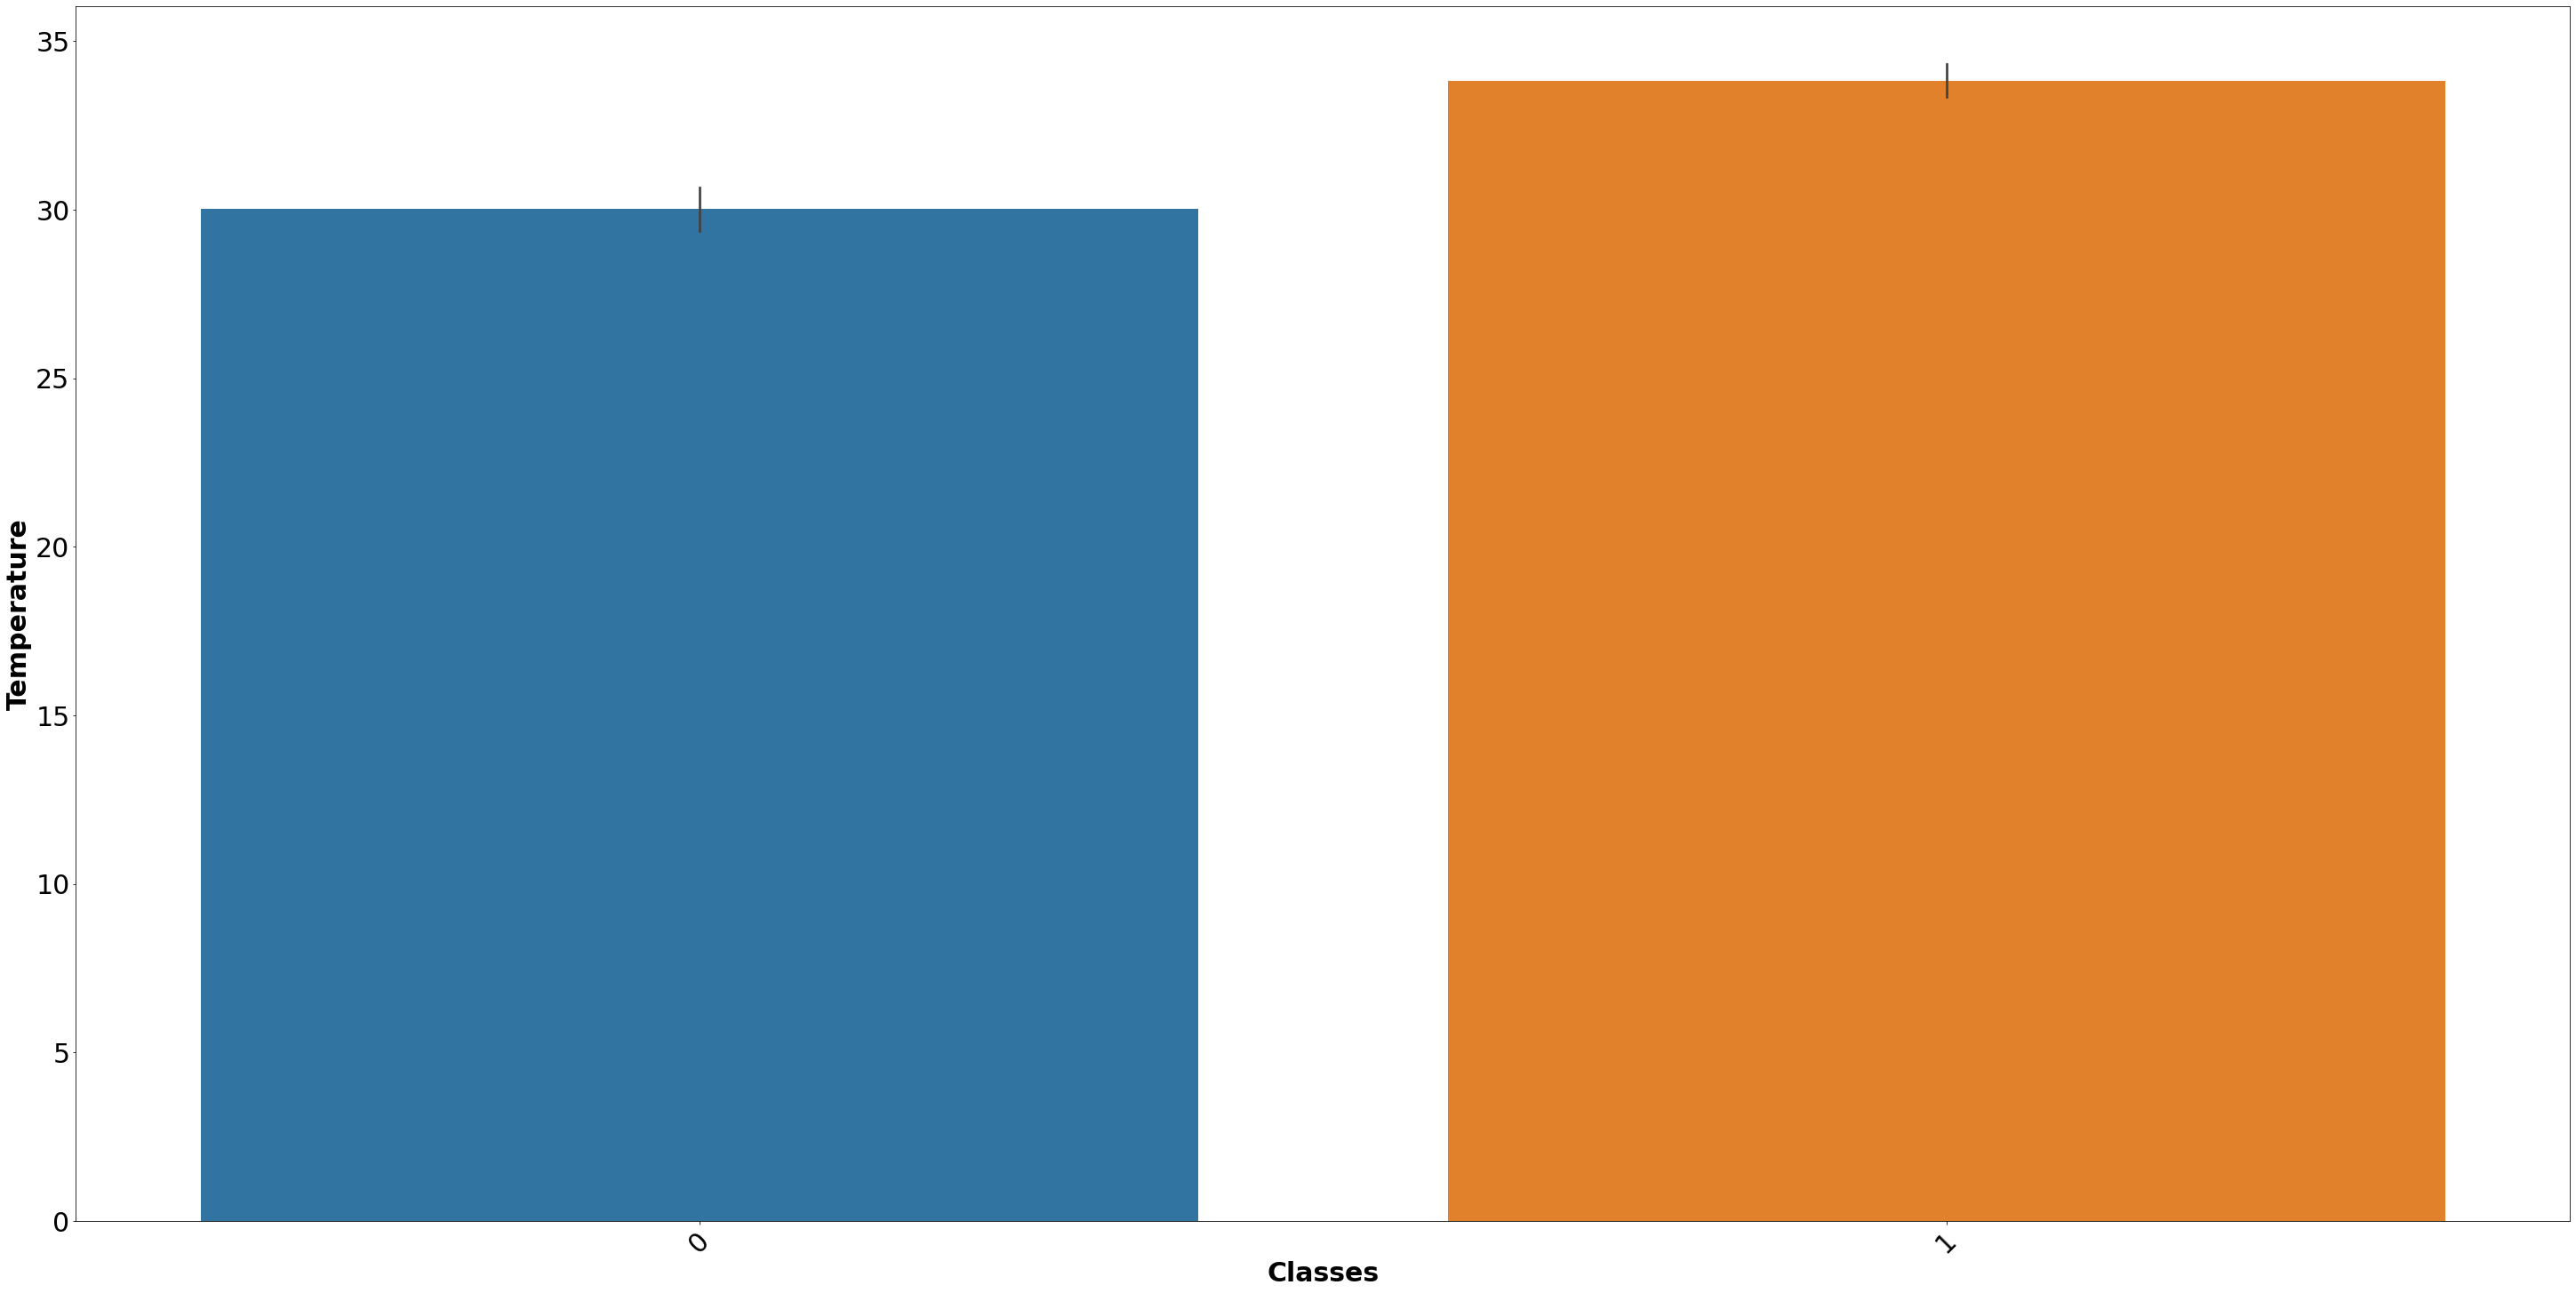

In [102]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Classes', y='Temperature', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Classes',weight='bold', fontsize=30);
plt.ylabel('Temperature',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Here, as the temperature goes up the chances of catching fire will also increases.

#### Relation between Classes and Wind speed (Ws)

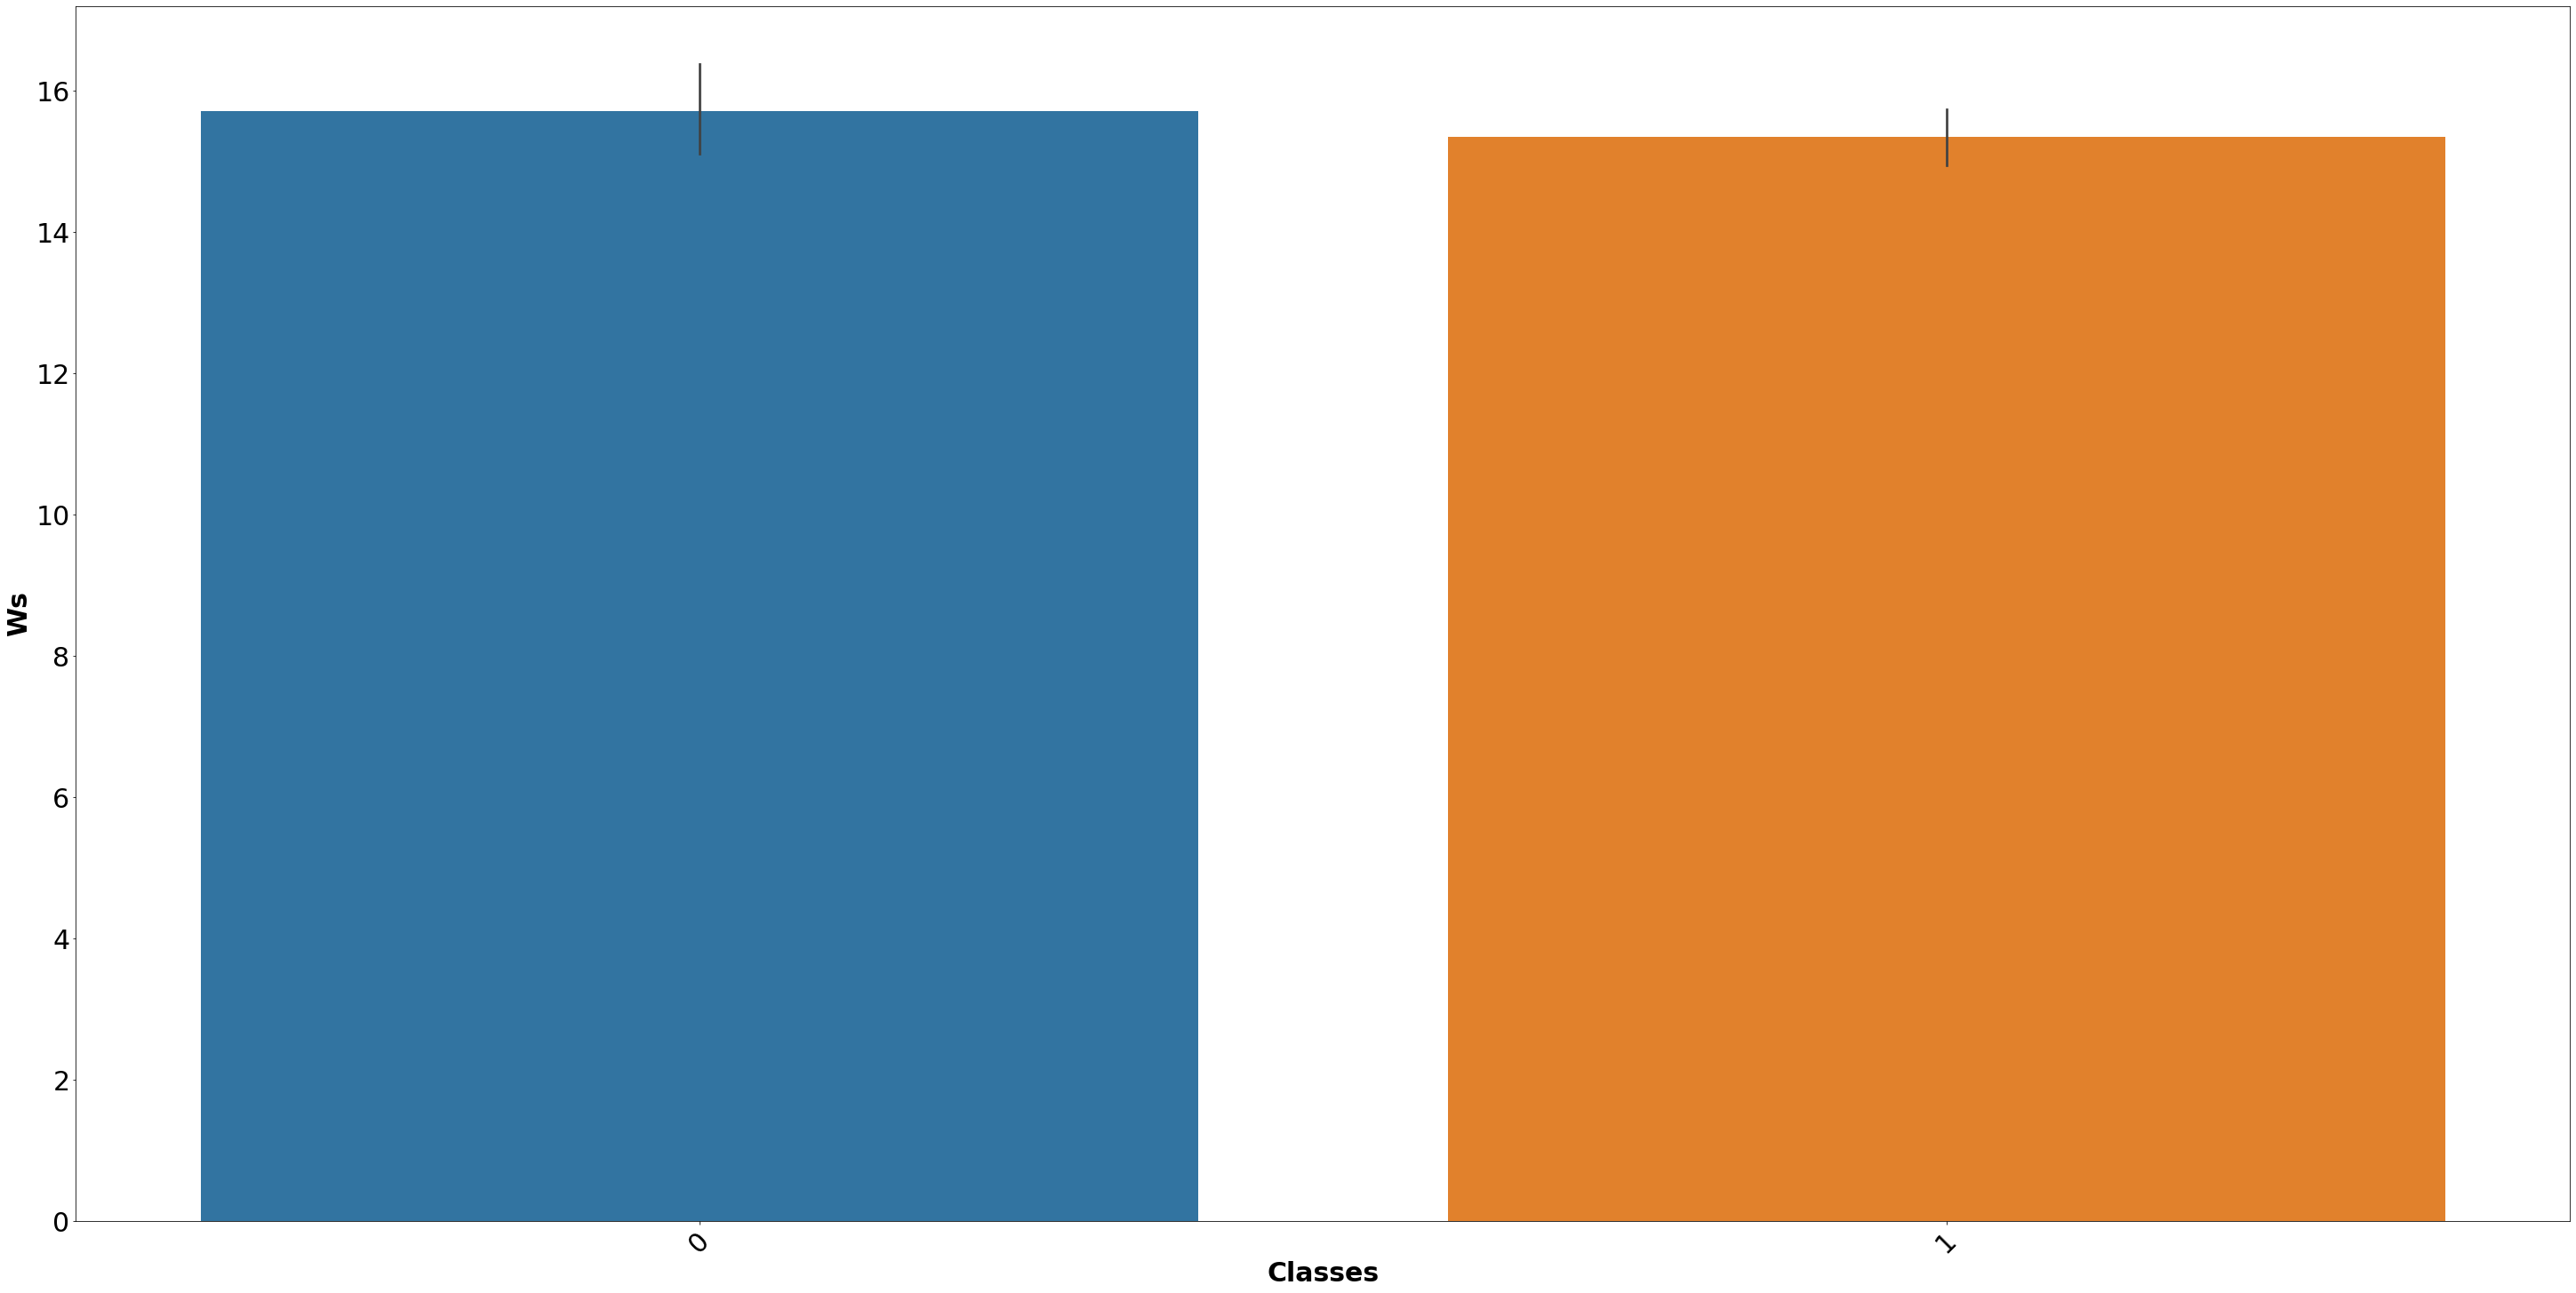

In [103]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Classes', y='Ws', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Classes',weight='bold', fontsize=30);
plt.ylabel('Ws',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Here the chances of catching forest fire is somewhat equal with respect to Wind speed.

#### Relation between Classes and Rain

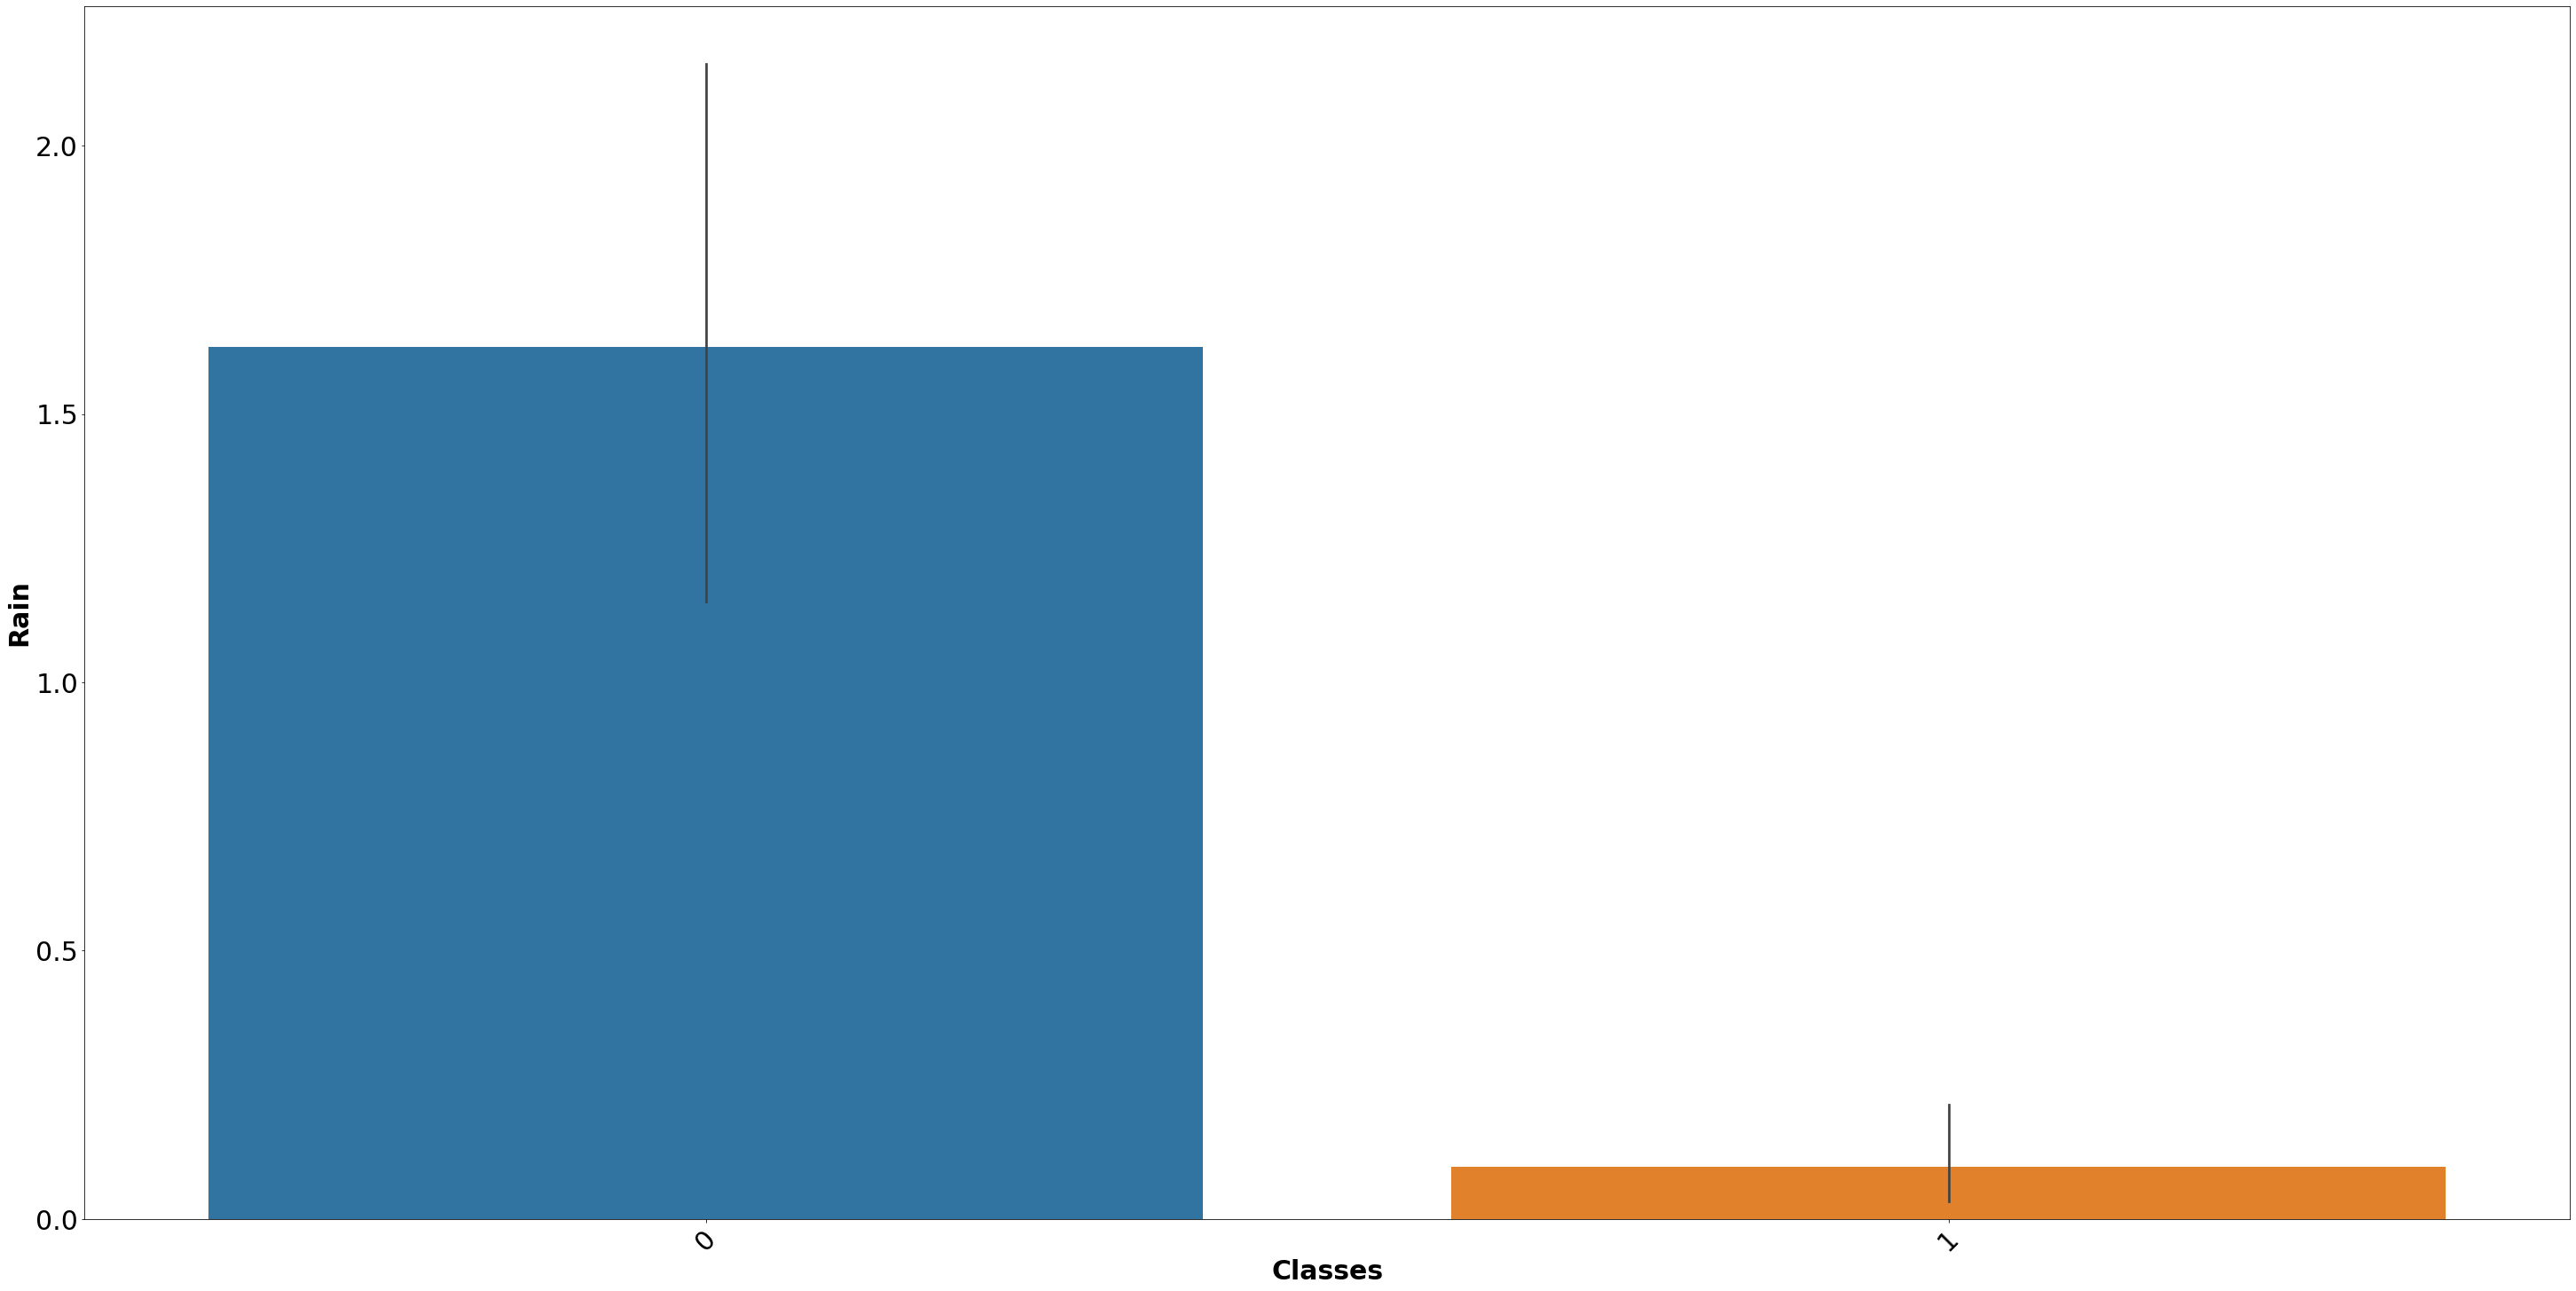

In [104]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Classes', y='Rain', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Classes',weight='bold', fontsize=30);
plt.ylabel('Rain',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- It is obvious that when chances of getting rainfall is high, then chances of catching fire will be going low.

#### Relation between Region and temperature

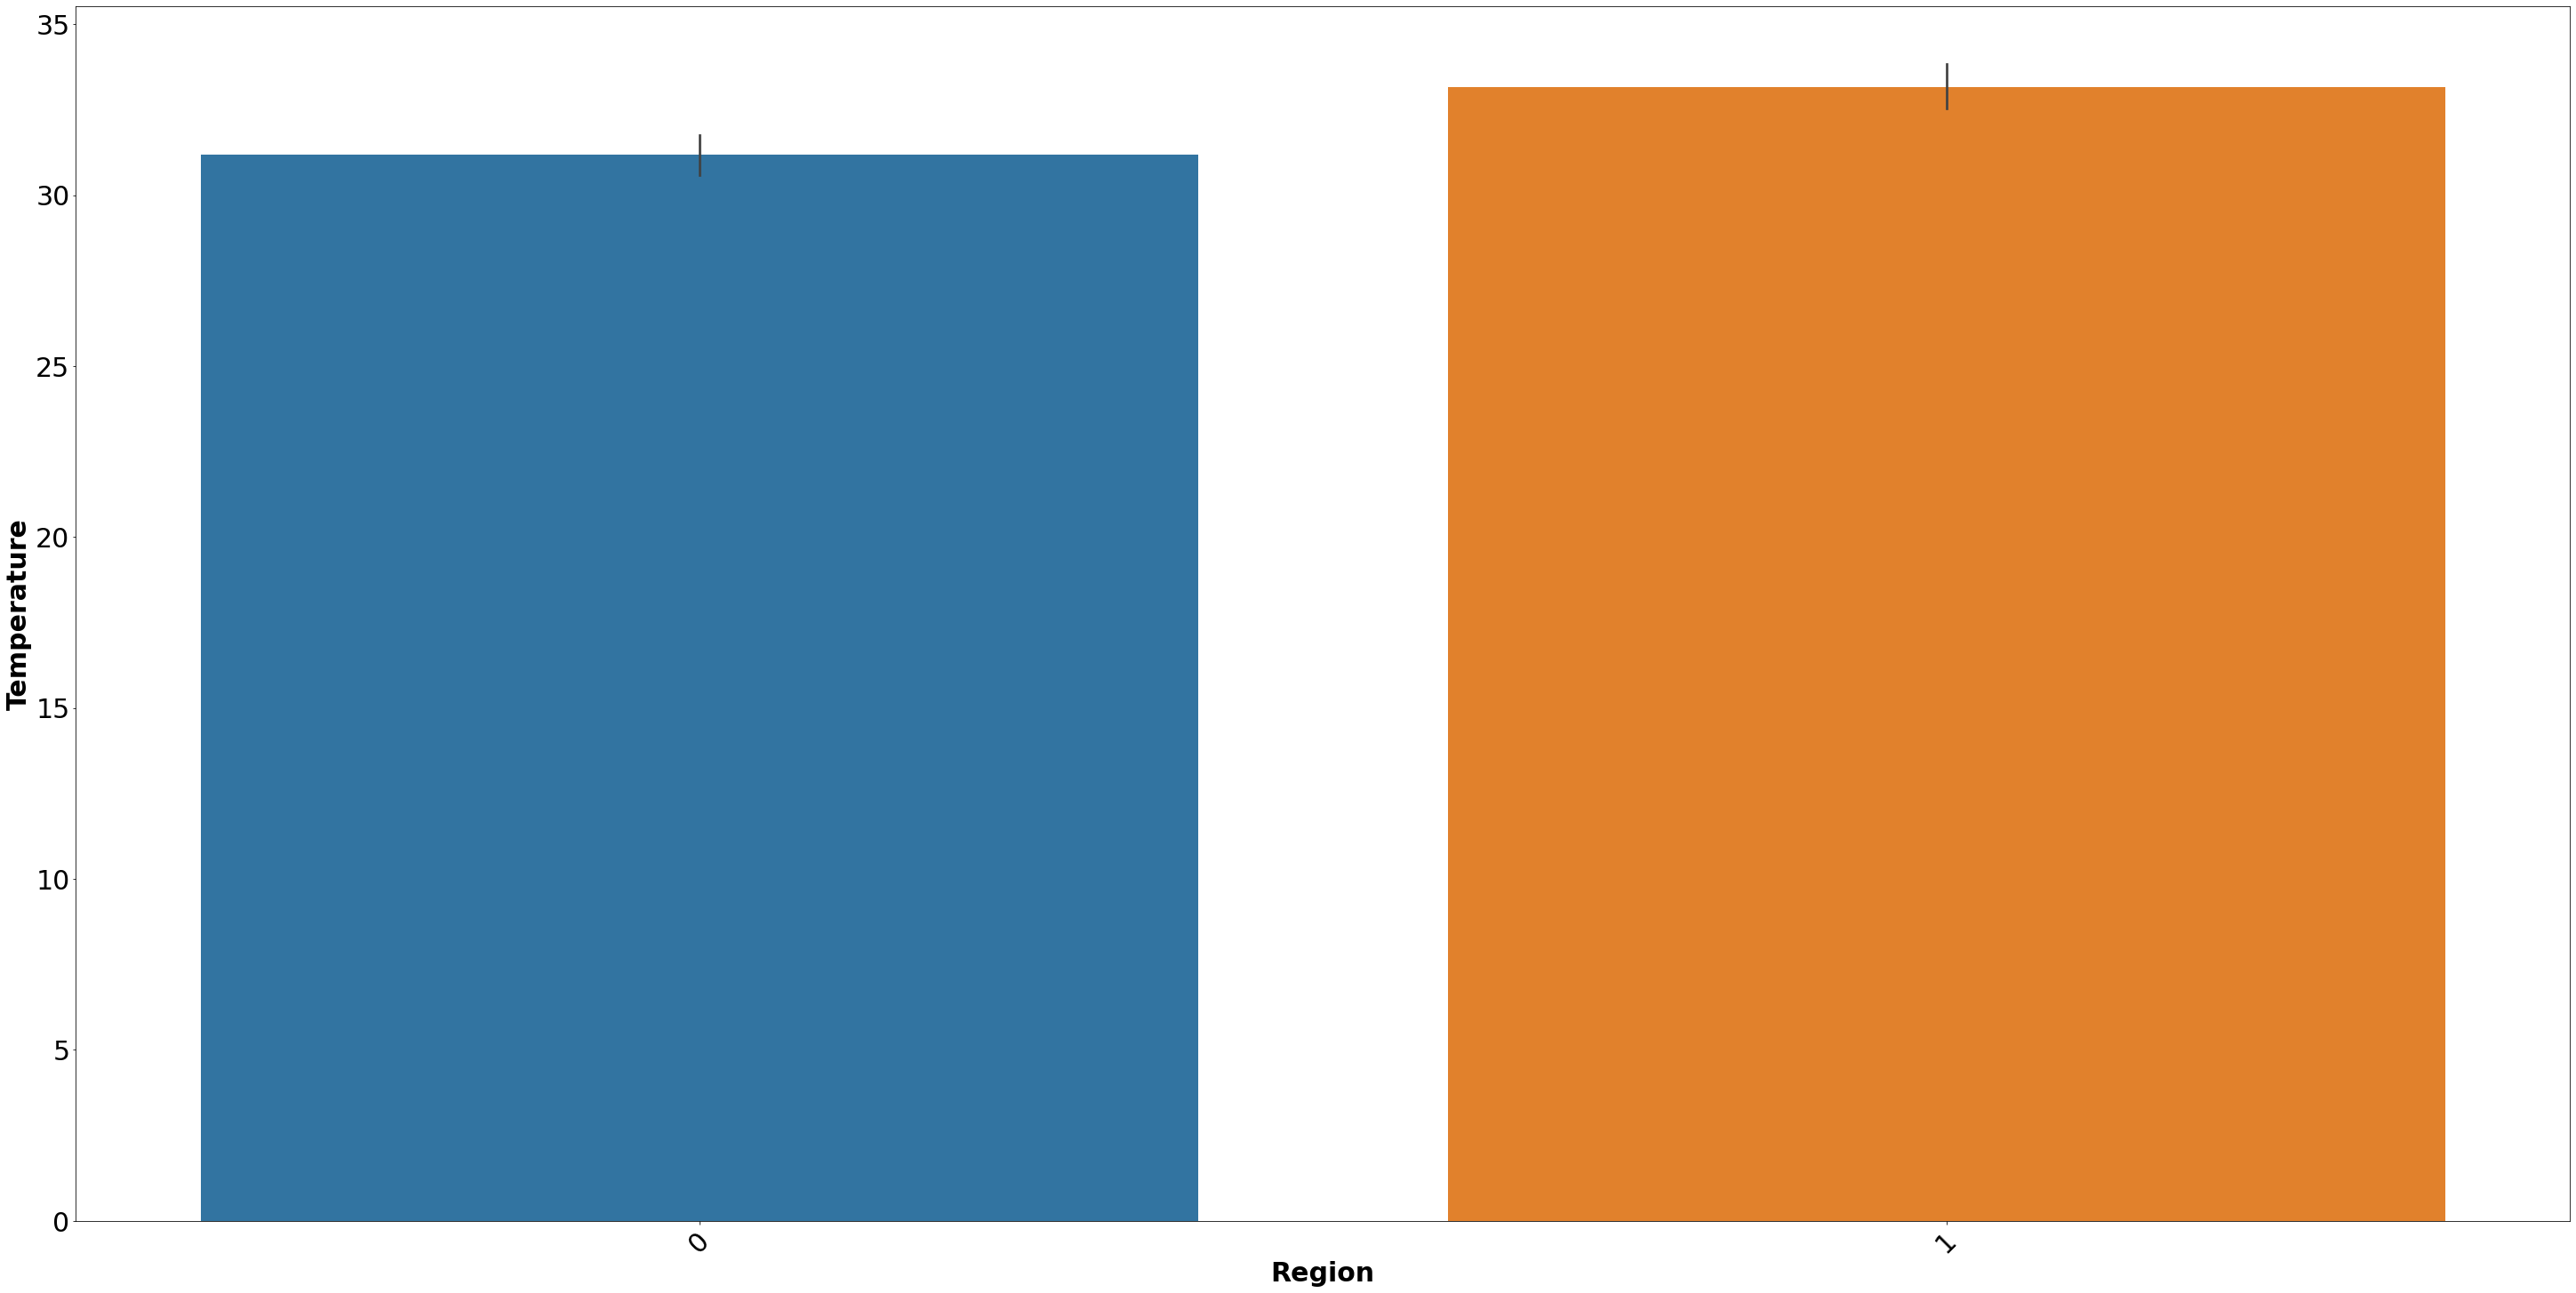

In [105]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Region', y='Temperature', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Region',weight='bold', fontsize=30);
plt.ylabel('Temperature',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Sidi Bel-abbes Region experiences higher Temperature than Bejaia region.

#### Relation between Region and Relative Humidity (RH)

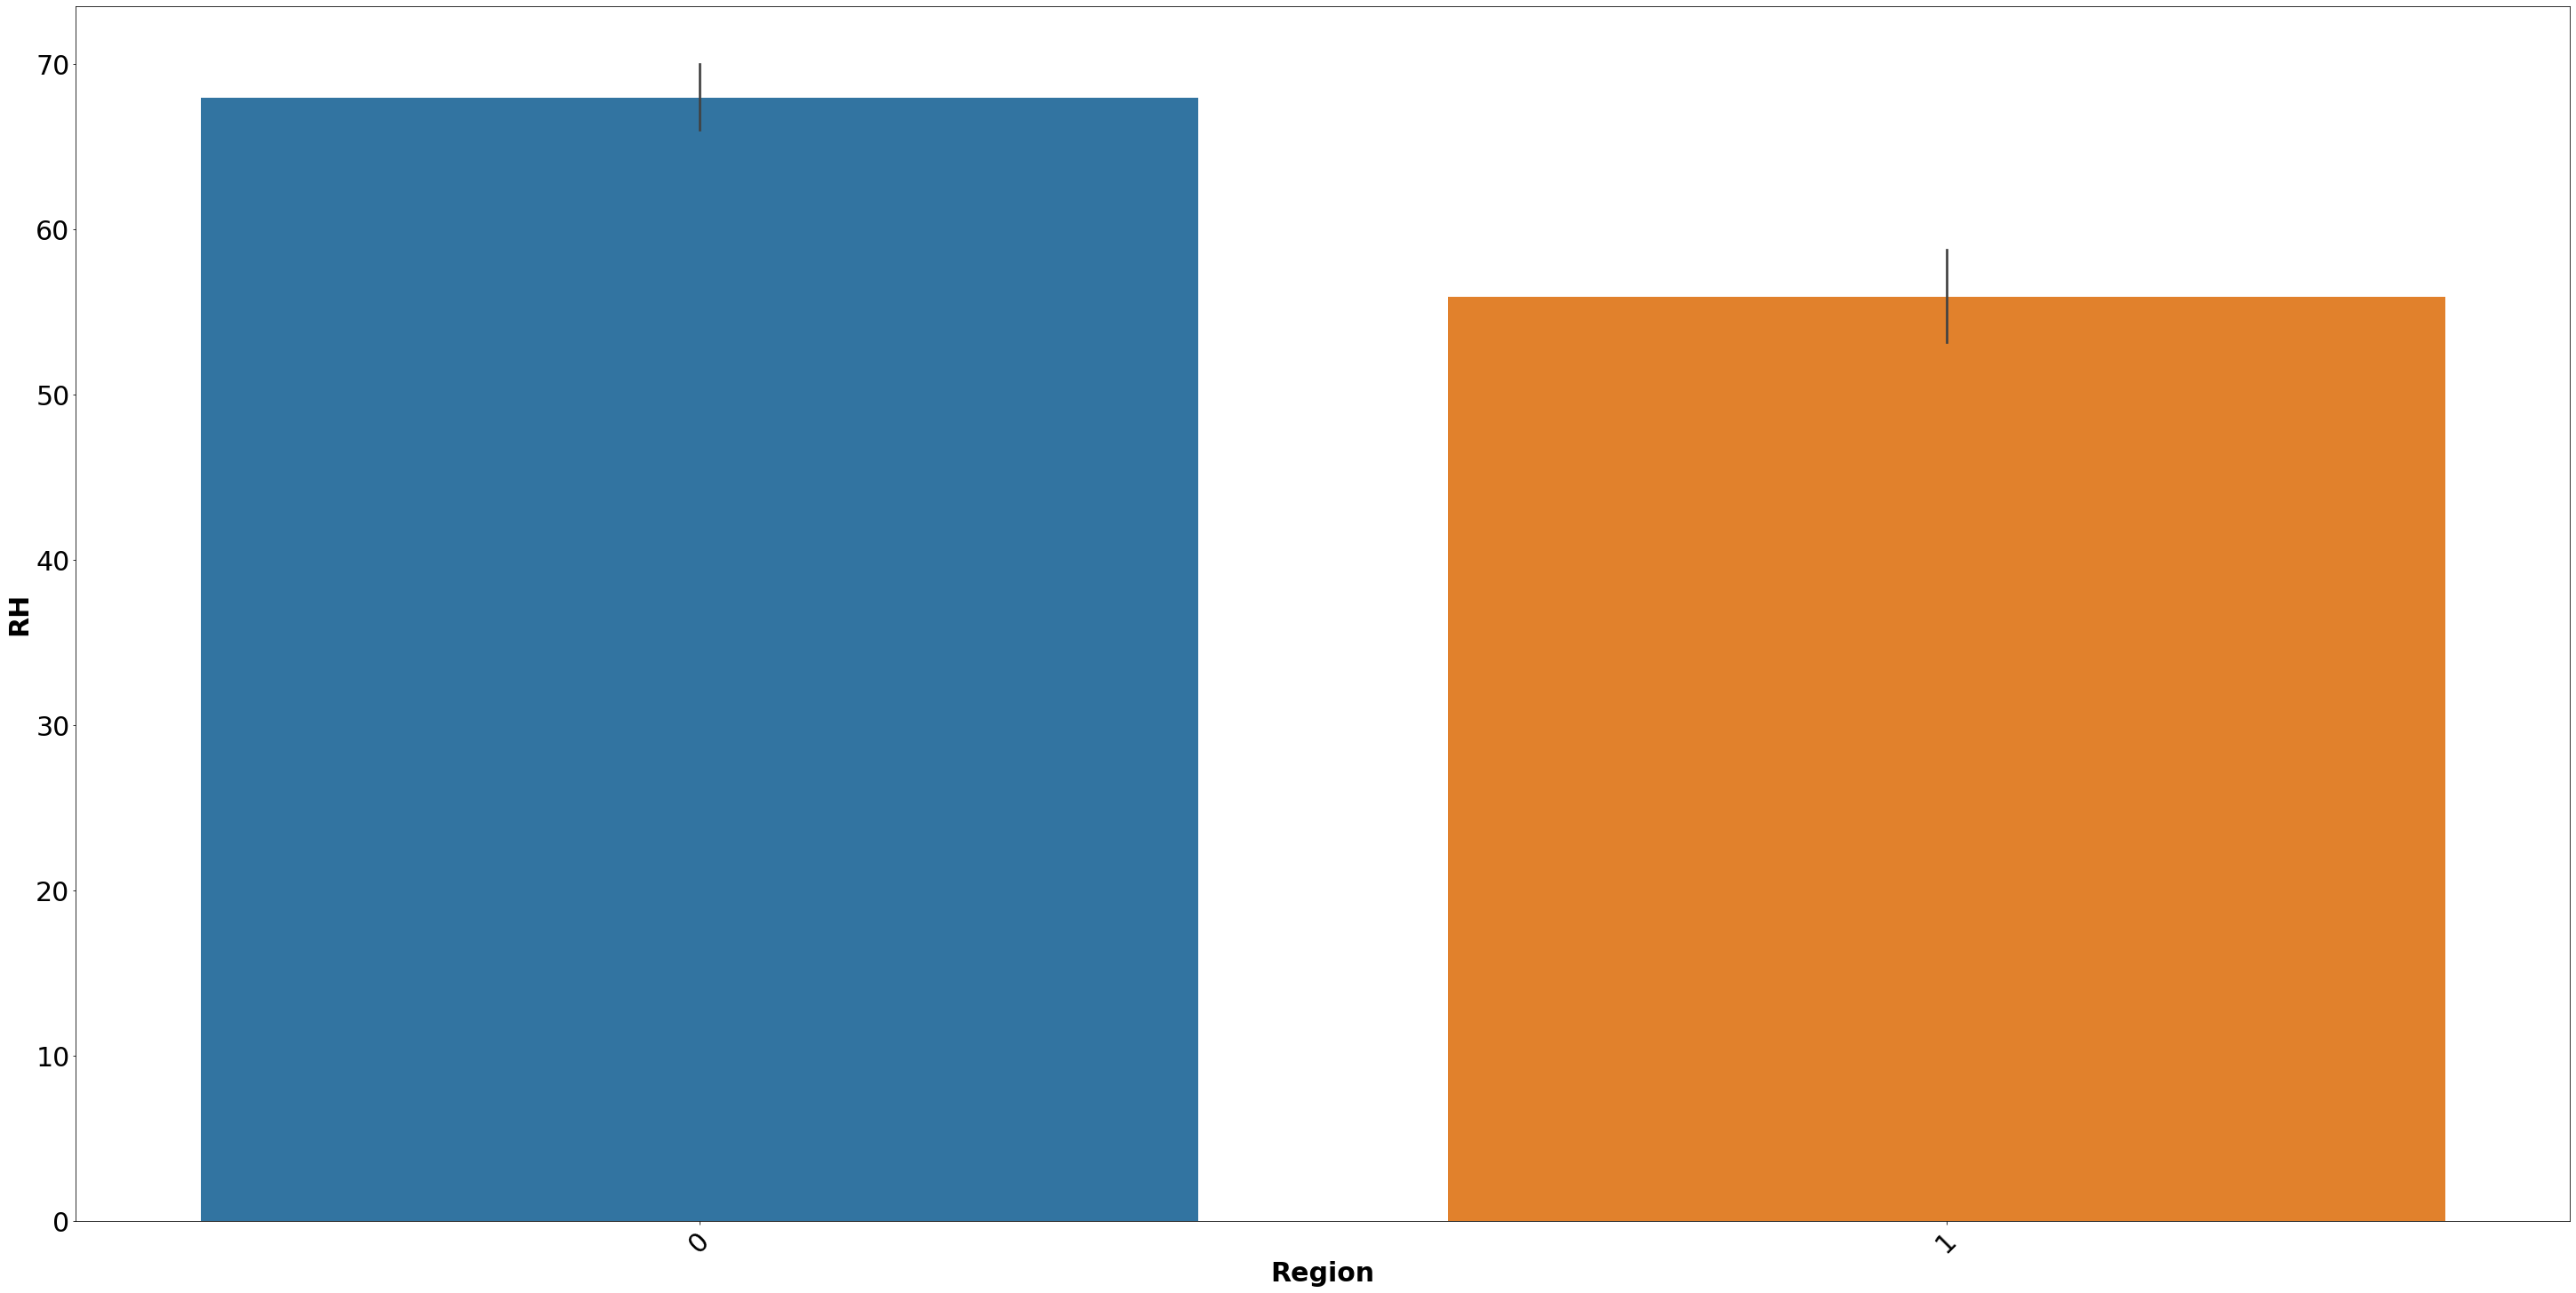

In [106]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Region', y='RH', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Region',weight='bold', fontsize=30);
plt.ylabel('RH',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Sidi Bel-abbes Region experiences lower Relative Humidity than Bejaia region.

#### Relation between Region and Wind Speed (Ws)

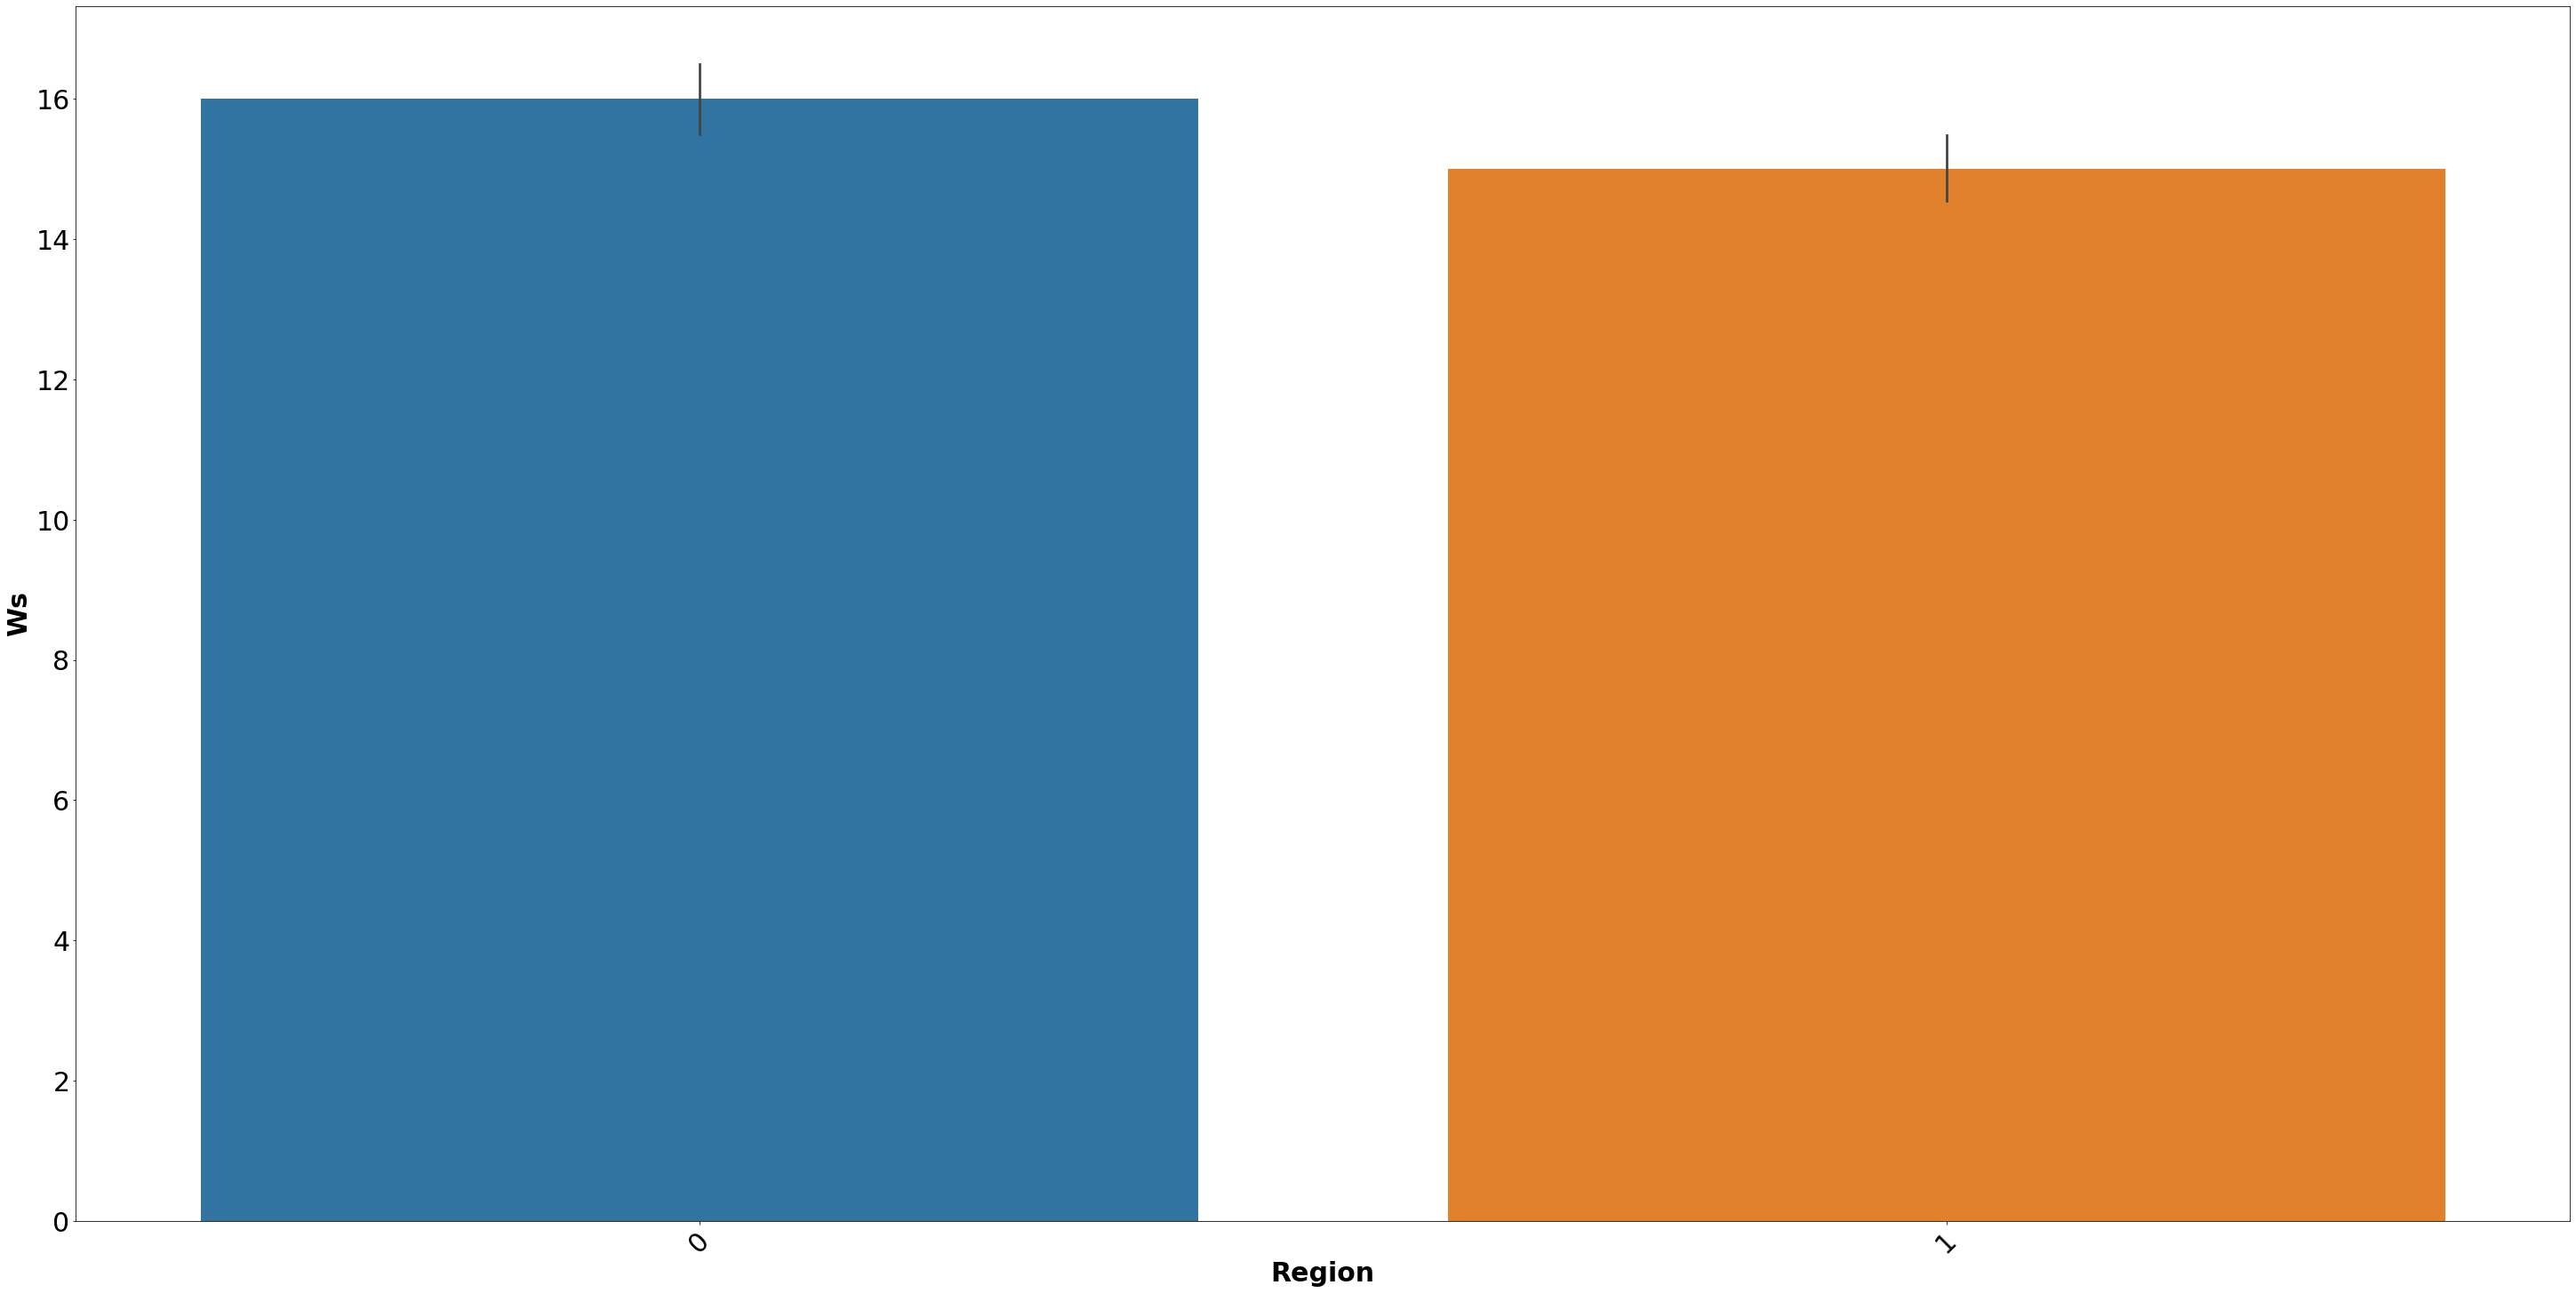

In [107]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Region', y='Ws', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Region',weight='bold', fontsize=30);
plt.ylabel('Ws',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Sidi Bel-abbes Region experiences lesser Wind speed than Bejaia region.

#### Relation between Region and Rain

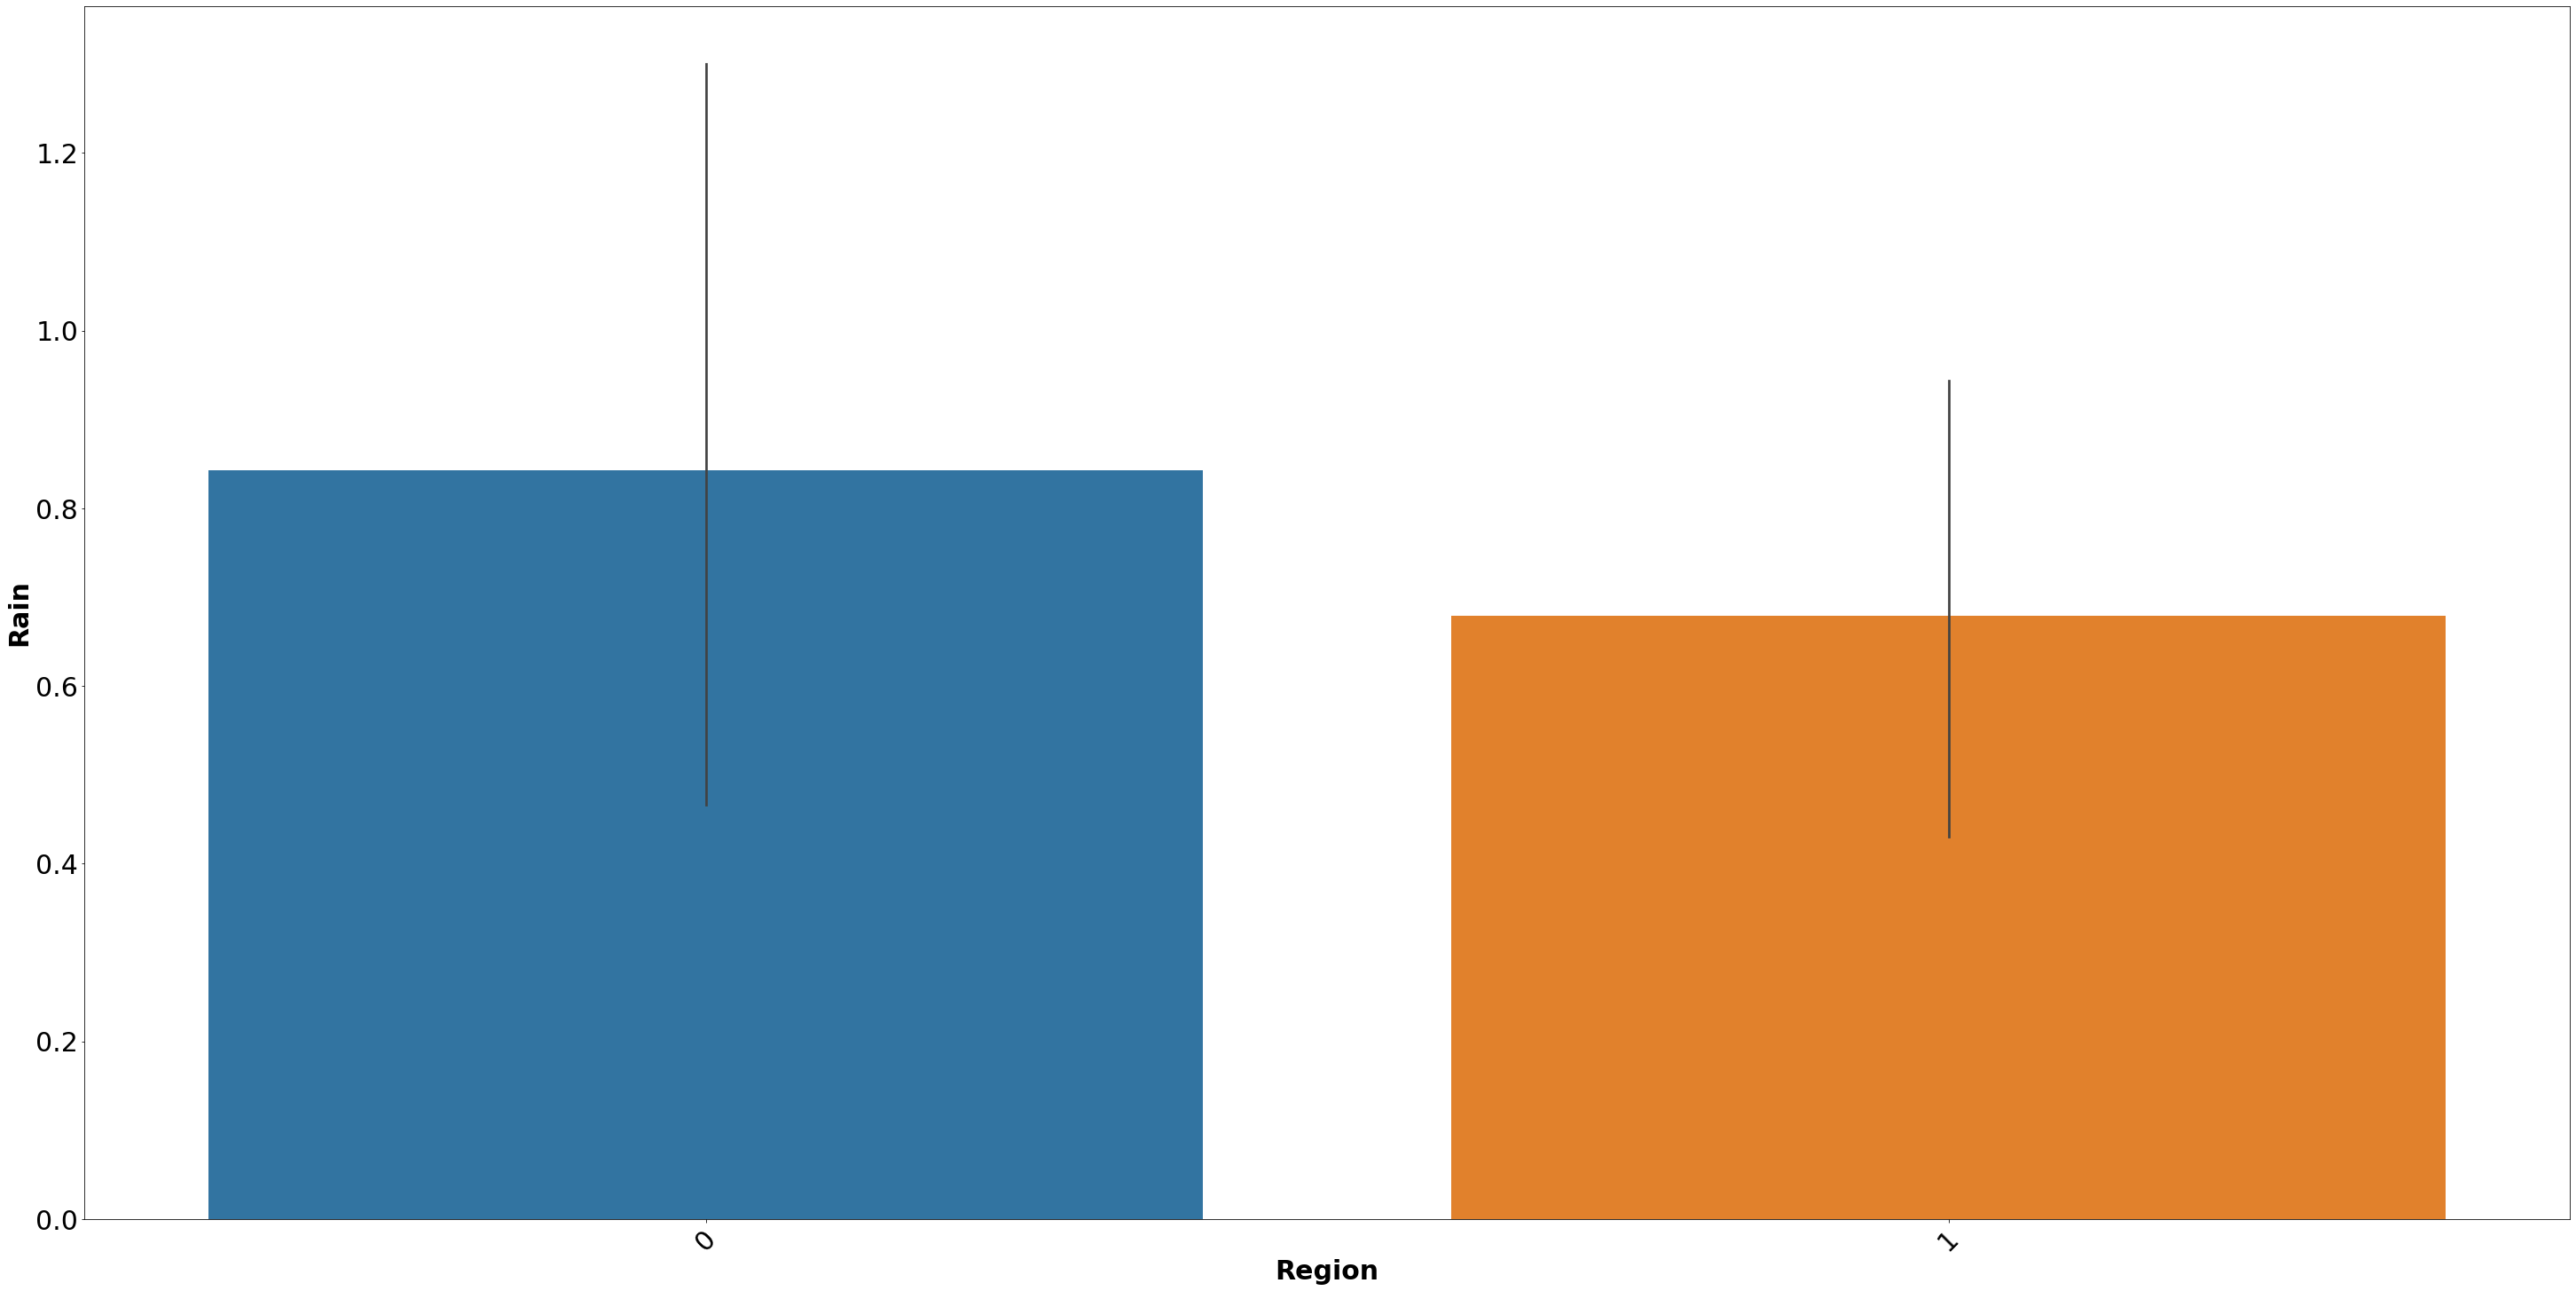

In [108]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Region', y='Rain', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Region',weight='bold', fontsize=30);
plt.ylabel('Rain',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Sidi Bel-abbes Region experiences lesser Rainfall than Bejaia region.

#### Relation between Region and Classes

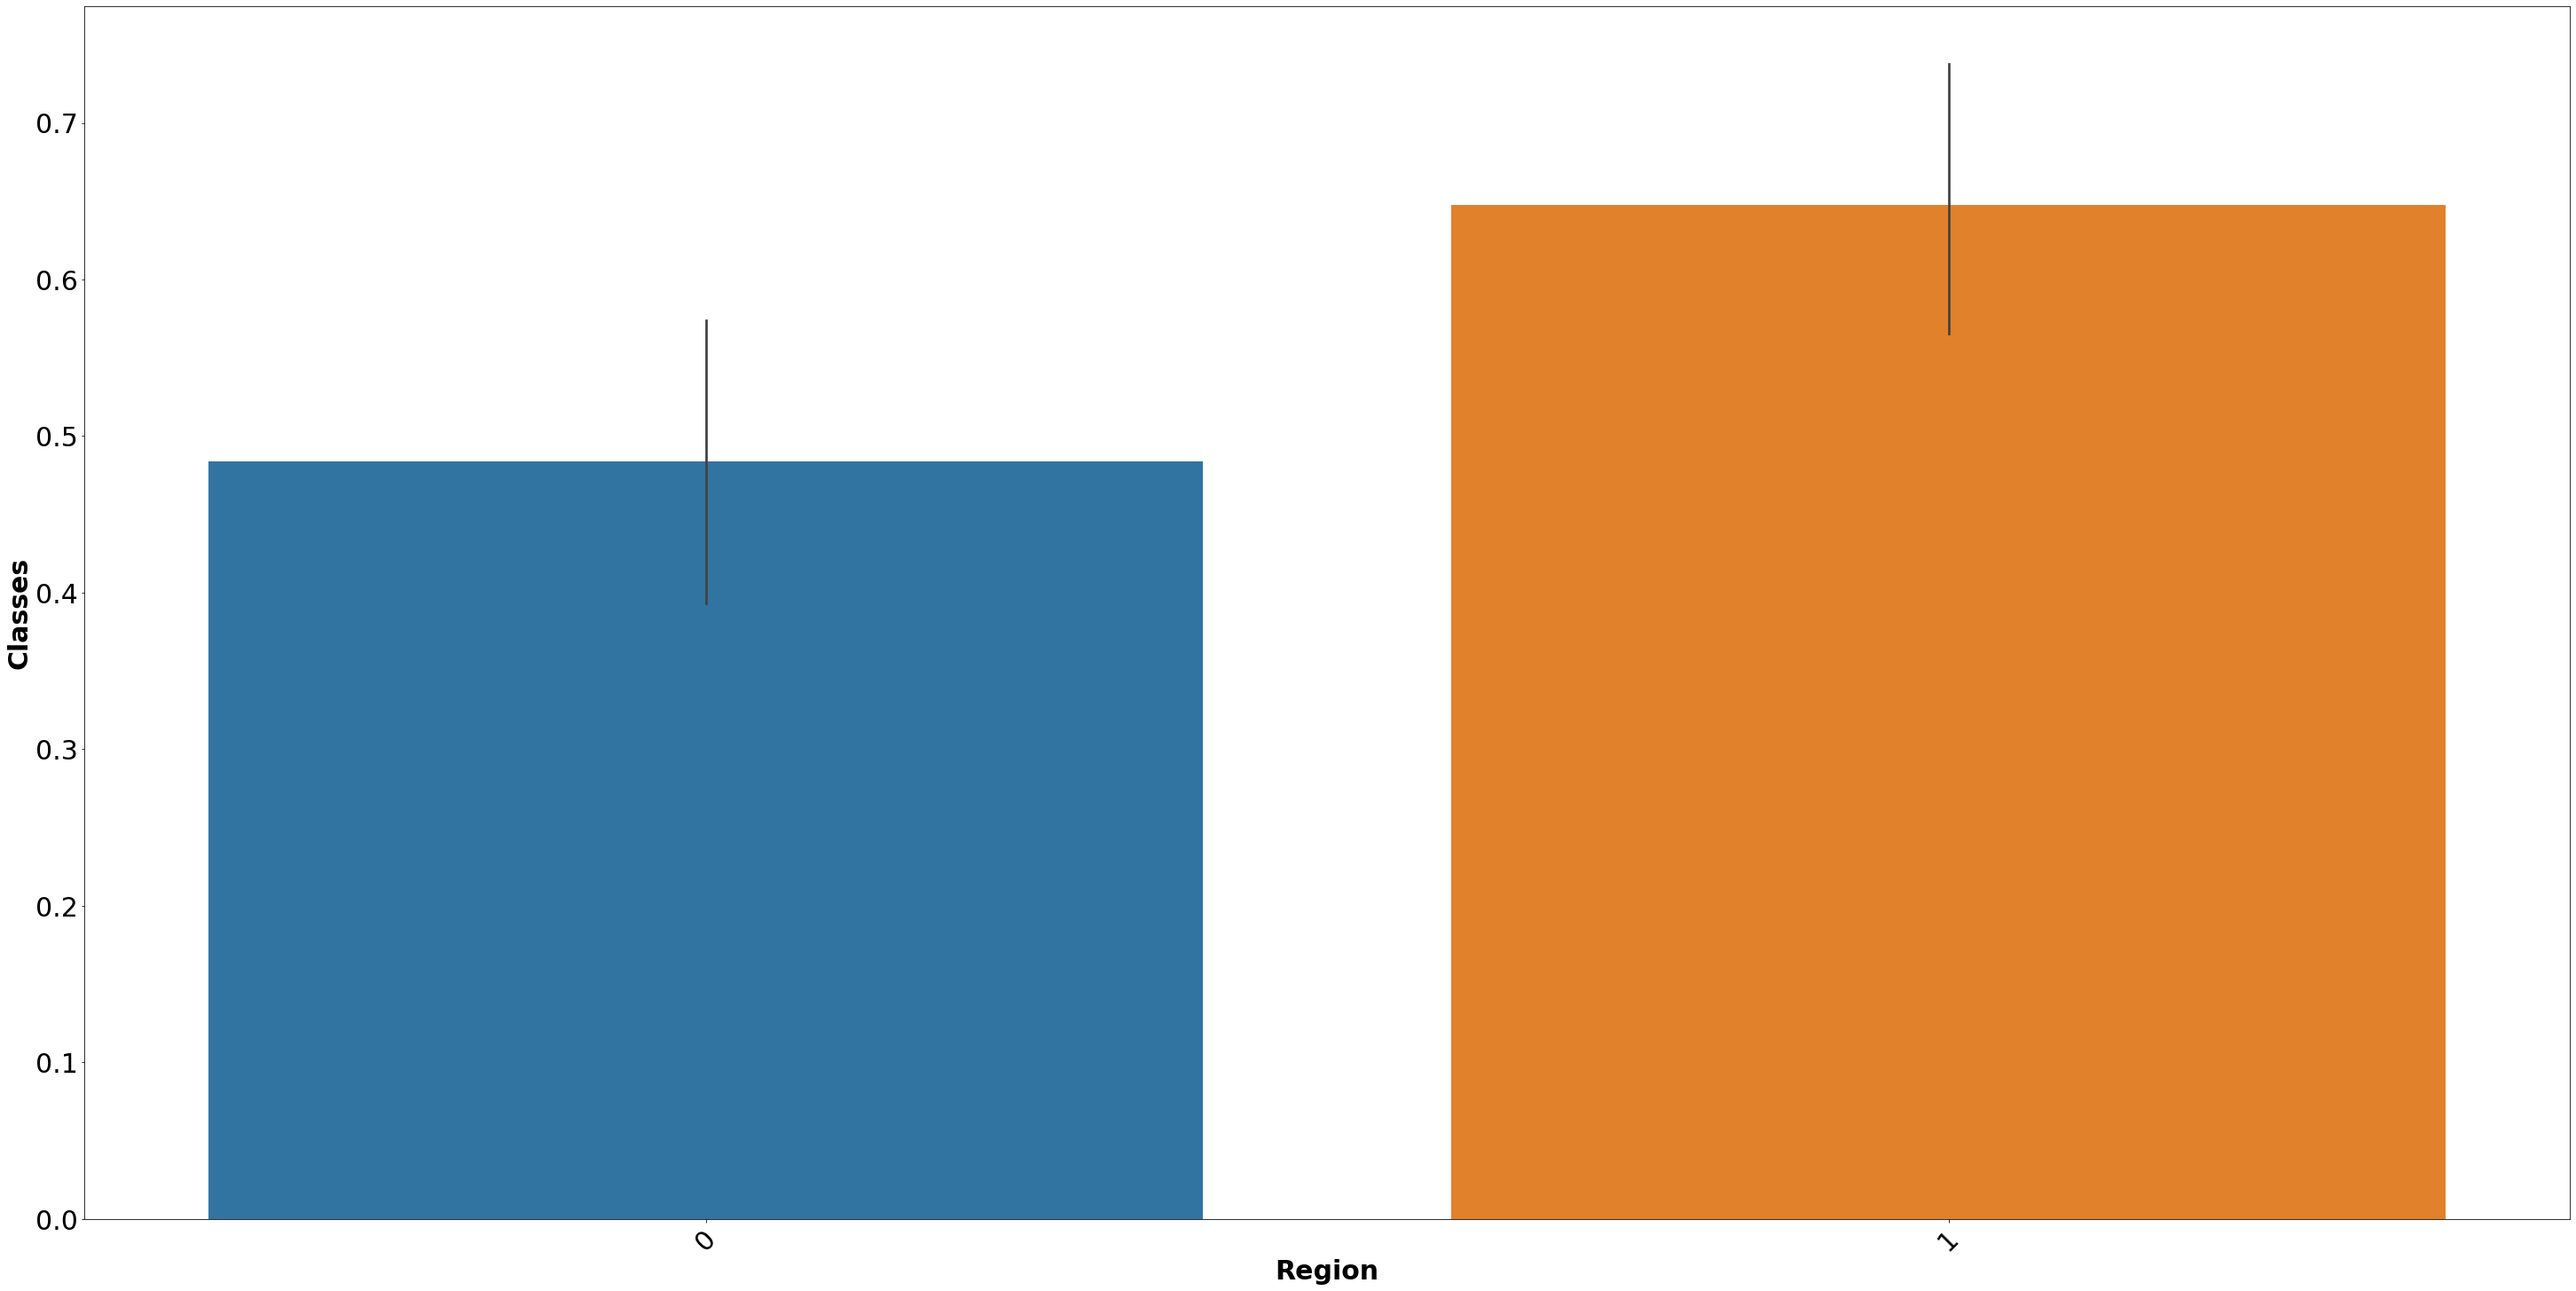

In [109]:
# plotting a barplot
plt.figure(figsize=(40,20))
sns.barplot(x='Region', y='Classes', data=df_copy)
plt.xticks(rotation=45)
plt.xlabel('Region',weight='bold', fontsize=30);
plt.ylabel('Classes',weight='bold', fontsize=30);
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=30)

<b><font color=blue>Observation</font>
- Sidi Bel-abbes Region experiences more forest fires than Bejaia region.

#### Covariance

In [110]:
df_copy.corr()

day         month  Temperature        RH        Ws  \
day          1.000000e+00  2.232788e-17     0.095772 -0.074209  0.047001   
month        2.232788e-17  1.000000e+00    -0.059017 -0.037884 -0.041447   
Temperature  9.577222e-02 -5.901677e-02     1.000000 -0.654443 -0.278132   
RH          -7.420934e-02 -3.788419e-02    -0.654443  1.000000  0.236084   
Ws           4.700086e-02 -4.144673e-02    -0.278132  0.236084  1.000000   
Rain        -1.122654e-01  3.532207e-02    -0.326786  0.222968  0.170169   
FFMC         2.240321e-01  1.557668e-02     0.677491 -0.645658 -0.163255   
DMC          4.915710e-01  6.817778e-02     0.483105 -0.405133 -0.001246   
DC           5.279285e-01  1.276719e-01     0.370498 -0.220330  0.076245   
ISI          1.793008e-01  6.354476e-02     0.605971 -0.688268  0.012245   
BUI          5.172239e-01  8.556743e-02     0.456415 -0.349685  0.030303   
FWI          3.502343e-01  8.173226e-02     0.566839 -0.580457  0.033957   
Classes      2.017844e-01  2.233266e-02     0.518119 -0.435023 -0.066529   
Region       4.662229e-16 -9.586232e-17     0.273496 -0.406424 -0.176829   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.112265  0.224032  0.491571  0.527929  0.179301  0.517224   
month        0.035322  0.015577  0.068178  0.127672  0.063545  0.085567   
Temperature -0.326786  0.677491  0.483105  0.370498  0.605971  0.456415   
RH           0.222968 -0.645658 -0.405133 -0.220330 -0.688268 -0.349685   
Ws           0.170169 -0.163255 -0.001246  0.076245  0.012245  0.030303   
Rain         1.000000 -0.544045 -0.288548 -0.296804 -0.347862 -0.299409   
FFMC        -0.544045  1.000000  0.602391  0.503910  0.740751  0.590251   
DMC         -0.288548  0.602391  1.000000  0.875358  0.678355  0.982206   
DC          -0.296804  0.503910  0.875358  1.000000  0.503919  0.941672   
ISI         -0.347862  0.740751  0.678355  0.503919  1.000000  0.641351   
BUI         -0.299409  0.590251  0.982206  0.941672  0.641351  1.000000   
FWI         -0.324755  0.691430  0.875191  0.737041  0.922422  0.856912   
Classes     -0.379449  0.770114  0.584188  0.507122  0.736142  0.584545   
Region      -0.041080  0.224680  0.191094 -0.081489  0.266298  0.087996   

                  FWI   Classes        Region  
day          0.350234  0.201784  4.662229e-16  
month        0.081732  0.022333 -9.586232e-17  
Temperature  0.566839  0.518119  2.734961e-01  
RH          -0.580457 -0.435023 -4.064239e-01  
Ws           0.033957 -0.066529 -1.768290e-01  
Rain        -0.324755 -0.379449 -4.108006e-02  
FFMC         0.691430  0.770114  2.246798e-01  
DMC          0.875191  0.584188  1.910937e-01  
DC           0.737041  0.507122 -8.148947e-02  
ISI          0.922422  0.736142  2.662977e-01  
BUI          0.856912  0.584545  8.799645e-02  
FWI          1.000000  0.719407  1.984738e-01  
Classes      0.719407  1.000000  1.653627e-01  
Region       0.198474  0.165363  1.000000e+00

#### Heatmap for visualisation of correlation 

<AxesSubplot:>

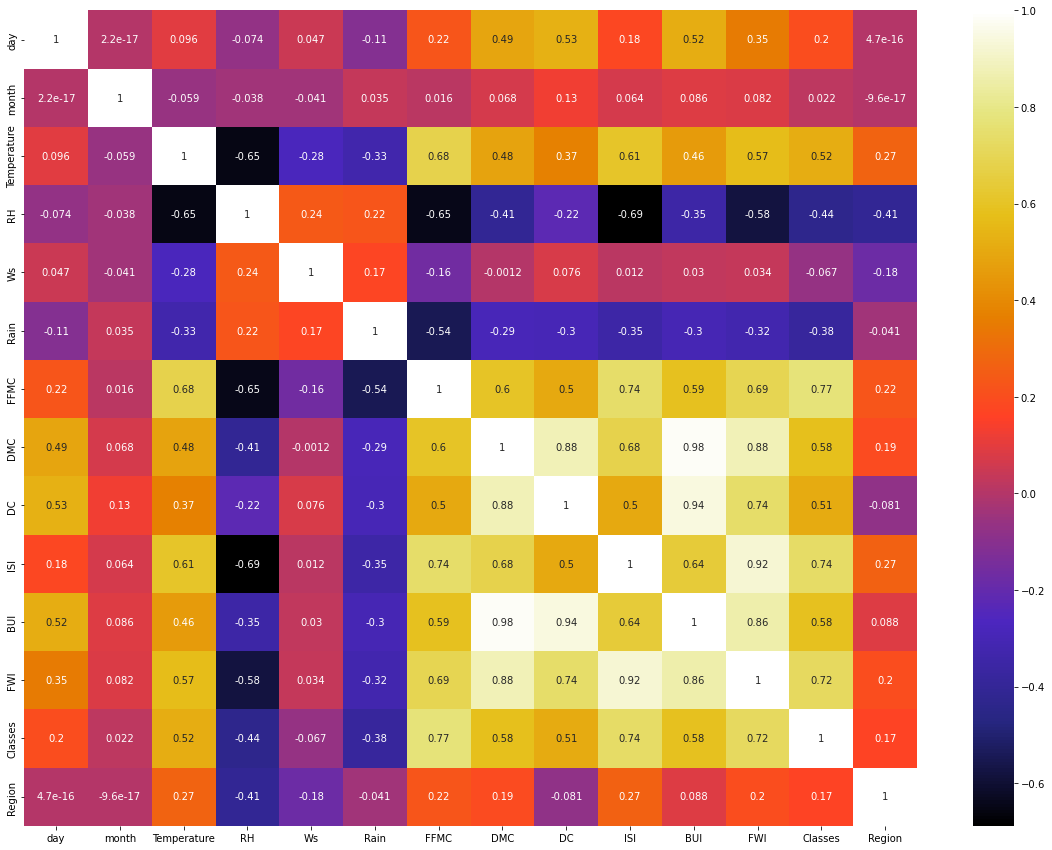

In [111]:
plt.figure(figsize = (20,15))
sns.heatmap(df_copy.corr(),cmap="CMRmap", annot=True)

<b><font color=blue>Observation</font>
- We can clearly see that from correalation chart and heatmap, the BUI, FWI, ISI, DMC and DC are highly correlated.

#### Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

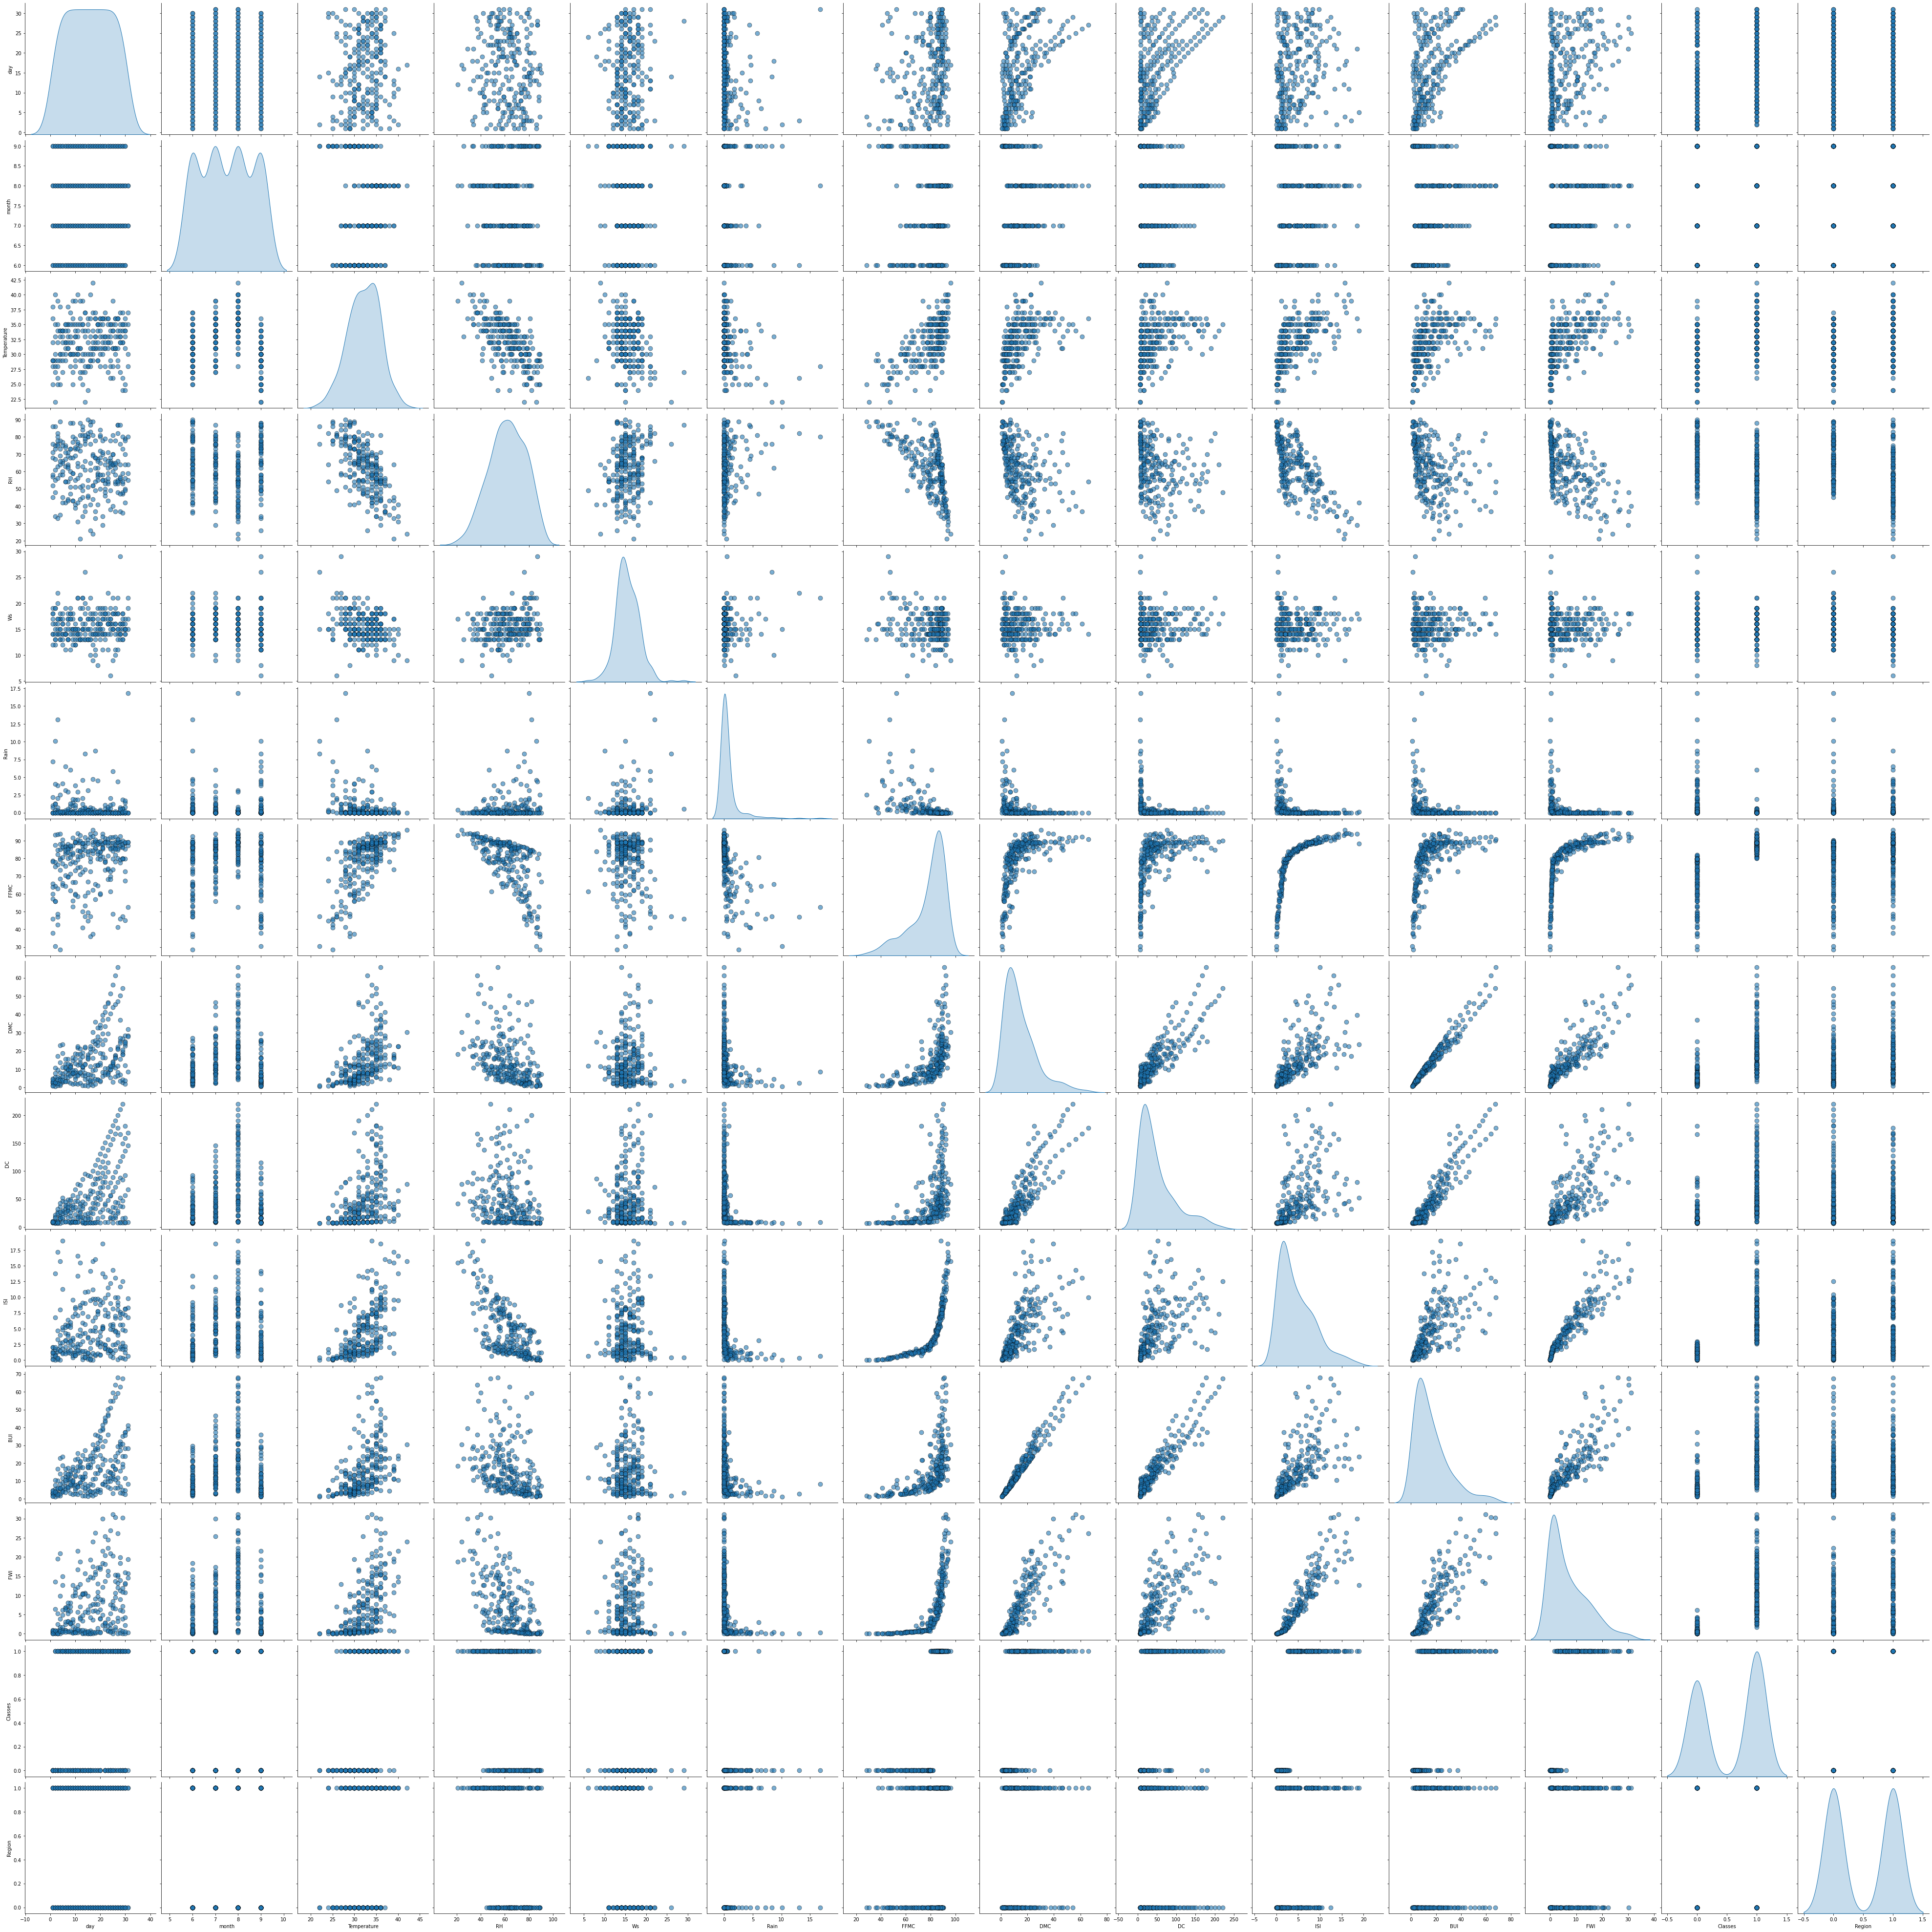

In [112]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df_copy,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

### Outlier detection

#### Boxplot for outlier detection

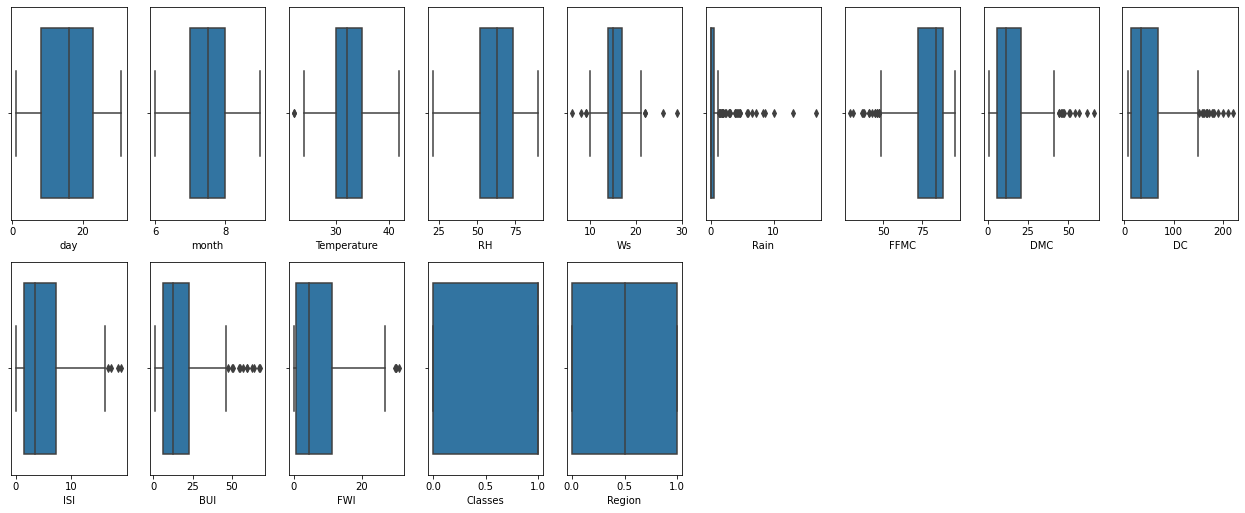

In [113]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

<b><font color=blue>Observation</font>
- Temperature, Ws, Rain, FFMC, DMC, DC, ISI, BUI and FWI having outliers.

In [114]:
df1=df_copy.copy()
df1.head(5)

day  month  Temperature  RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

#### Remove outlier function

In [115]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    print("IQR", iqr)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

#### Comparison plot function

In [116]:
def create_comparison_plot(df_copy,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df_copy[column])

    plt.subplot(2,2,2)
    sns.boxplot(df_copy[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

#### Removing outliers from every columns

percentile25 30.0
percentile75 35.0
Upper limit 42.5
Lower limit 22.5
IQR 5.0


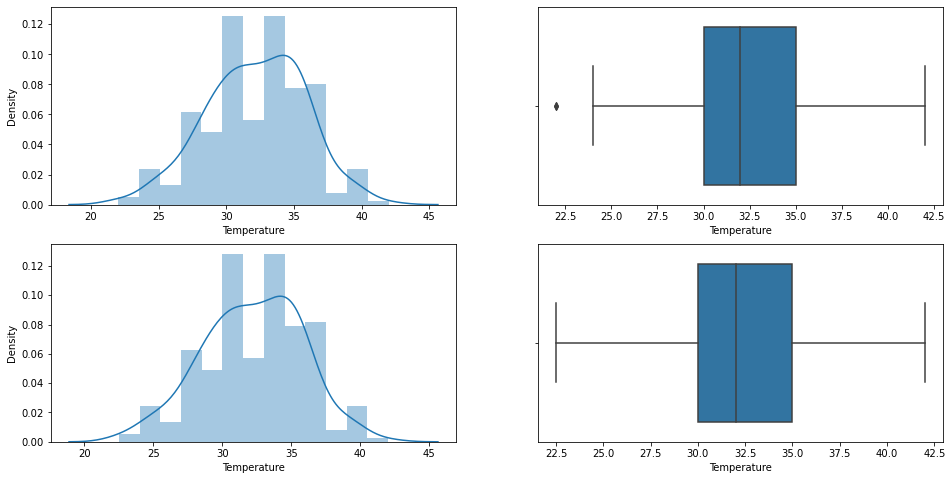

In [117]:
remove_outliers_IQR('Temperature')
create_comparison_plot(df_copy,df1,"Temperature")

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5
IQR 3.0


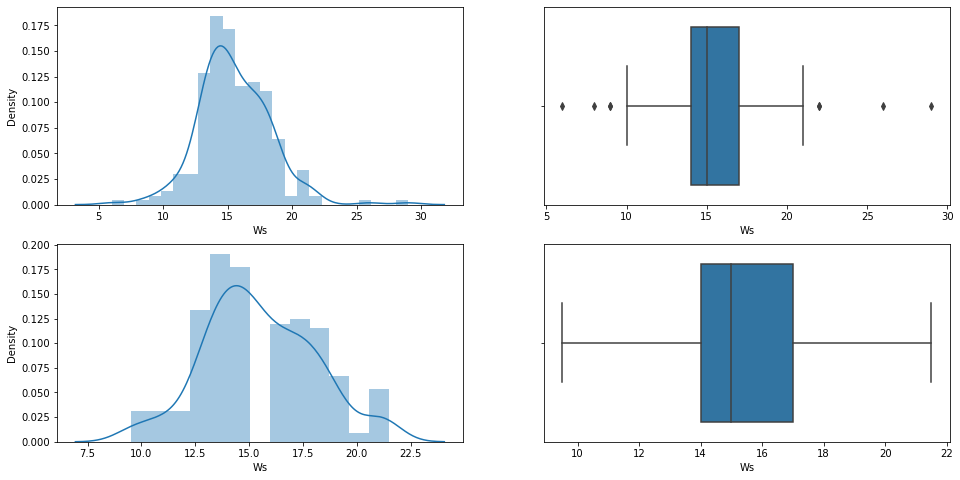

In [118]:
remove_outliers_IQR('Ws')
create_comparison_plot(df_copy,df1,"Ws")

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75
IQR 0.5


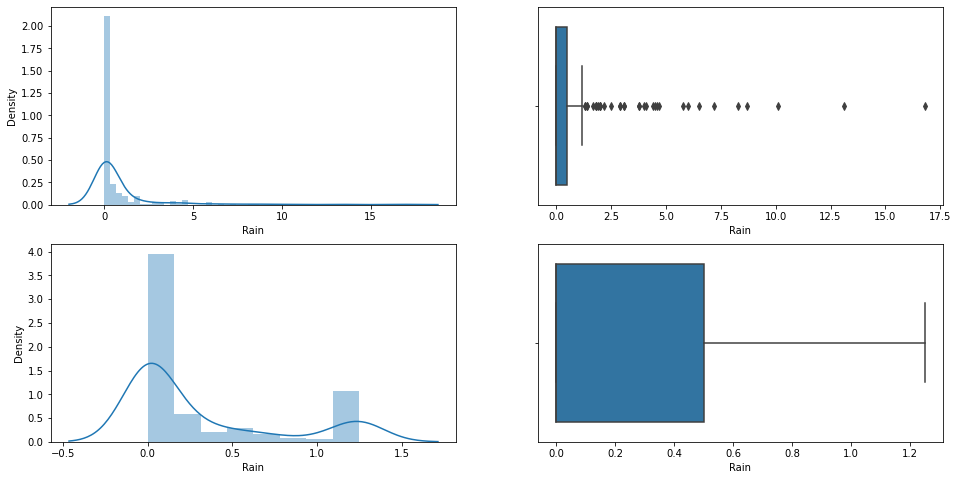

In [119]:
remove_outliers_IQR('Rain')
create_comparison_plot(df_copy,df1,"Rain")

percentile25 72.075
percentile75 88.3
Upper limit 112.63749999999999
Lower limit 47.73750000000001
IQR 16.224999999999994


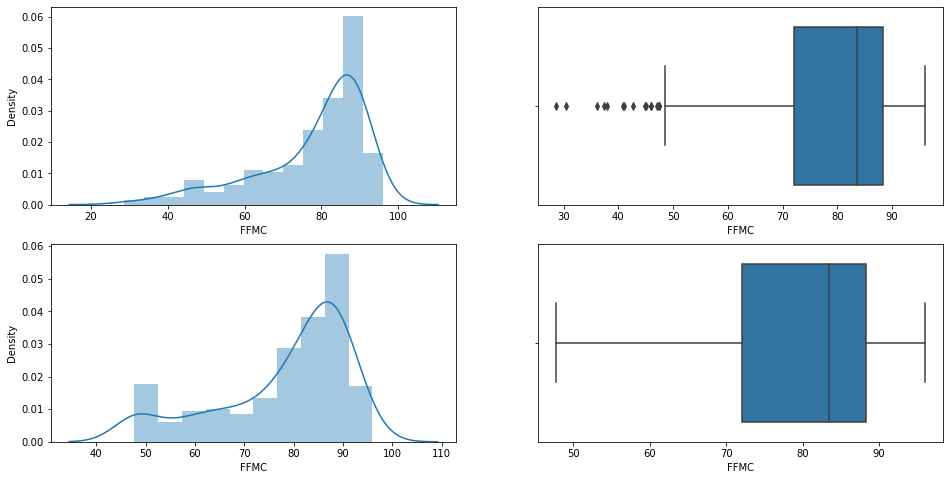

In [120]:
remove_outliers_IQR('FFMC')
create_comparison_plot(df_copy,df1,"FFMC")

percentile25 5.8
percentile75 20.75
Upper limit 43.175
Lower limit -16.624999999999996
IQR 14.95


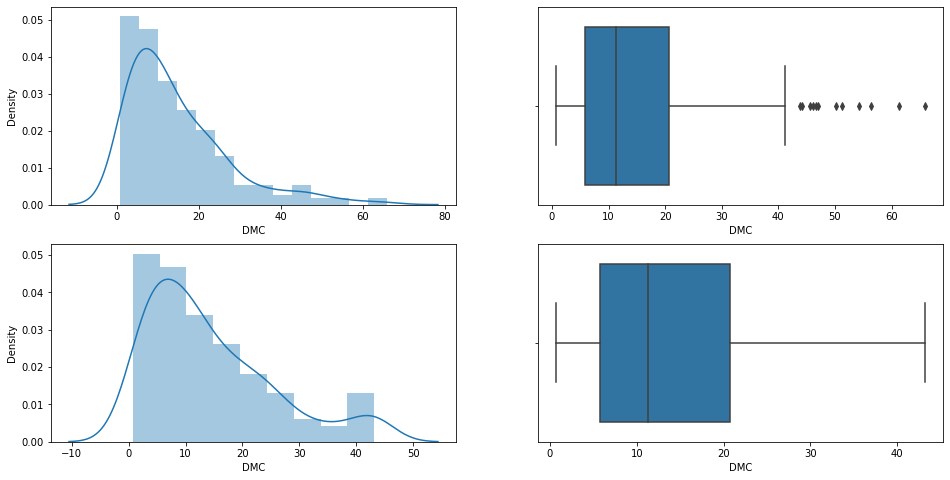

In [121]:
remove_outliers_IQR('DMC')
create_comparison_plot(df_copy,df1,"DMC")

percentile25 13.274999999999999
percentile75 68.15
Upper limit 150.46250000000003
Lower limit -69.03750000000002
IQR 54.87500000000001


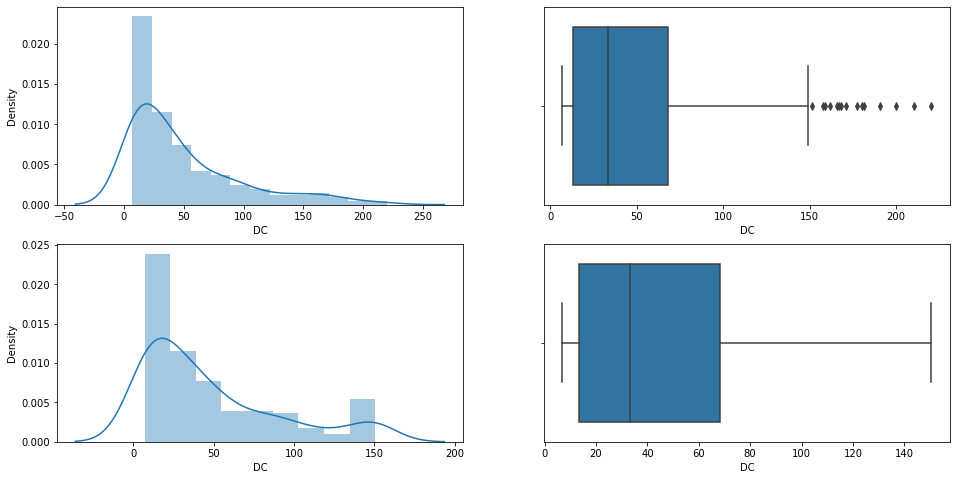

In [122]:
remove_outliers_IQR('DC')
create_comparison_plot(df_copy,df1,"DC")

percentile25 1.4
percentile75 7.3
Upper limit 16.150000000000002
Lower limit -7.450000000000001
IQR 5.9


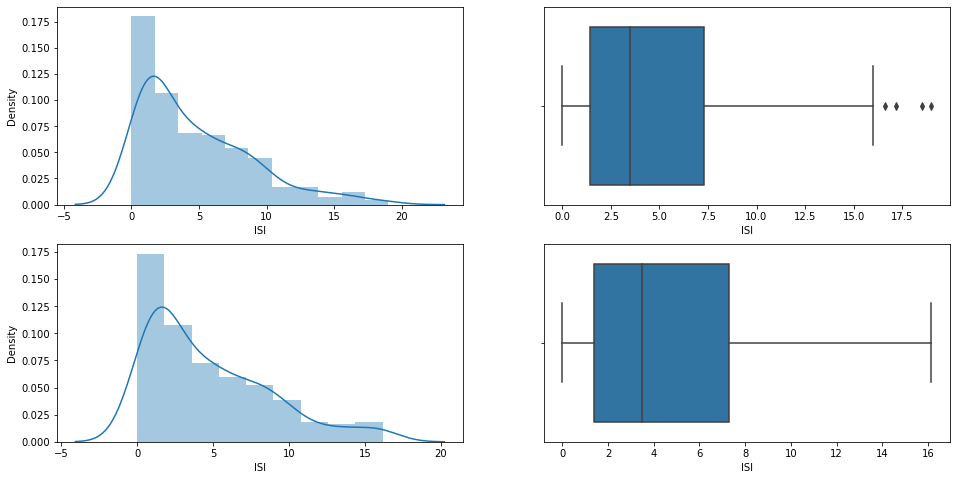

In [123]:
remove_outliers_IQR('ISI')
create_comparison_plot(df_copy,df1,"ISI")

percentile25 6.0
percentile75 22.525
Upper limit 47.3125
Lower limit -18.787499999999998
IQR 16.525


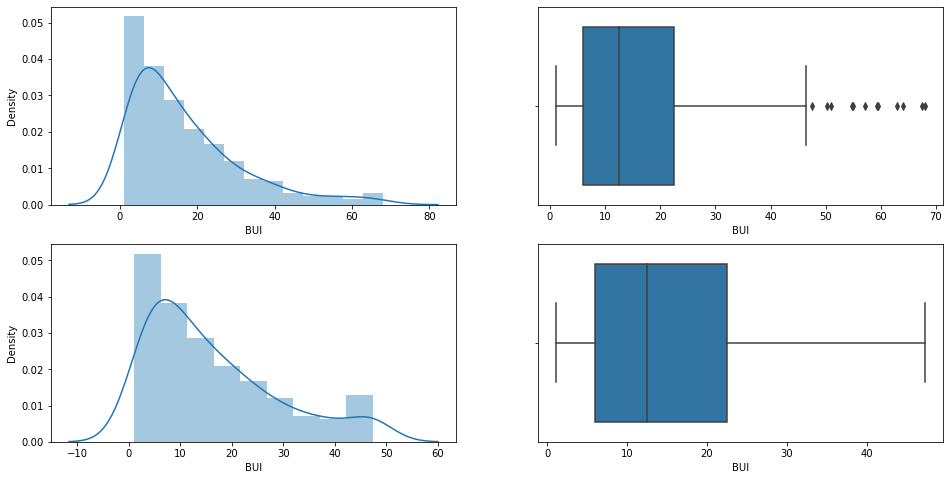

In [124]:
remove_outliers_IQR('BUI')
create_comparison_plot(df_copy,df1,"BUI")

percentile25 0.7
percentile75 11.375
Upper limit 27.387500000000003
Lower limit -15.312500000000004
IQR 10.675


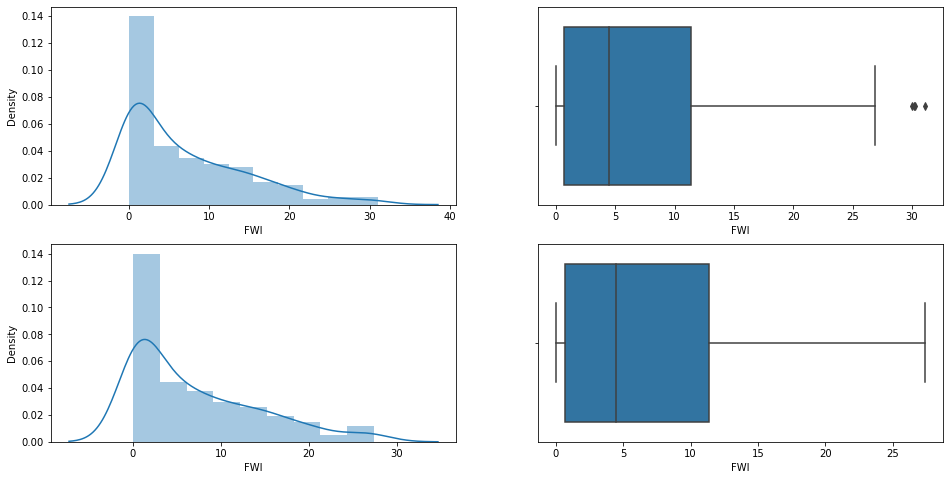

In [125]:
remove_outliers_IQR('FWI')
create_comparison_plot(df_copy,df1,"FWI")

<b><font color=blue>Observation</font>
- Using IQR method the outliers have been removed from all the features.
- In the above results we can clearly see before and after applying IQR method on outliers.

#### Rechecking all columns after removing outliers

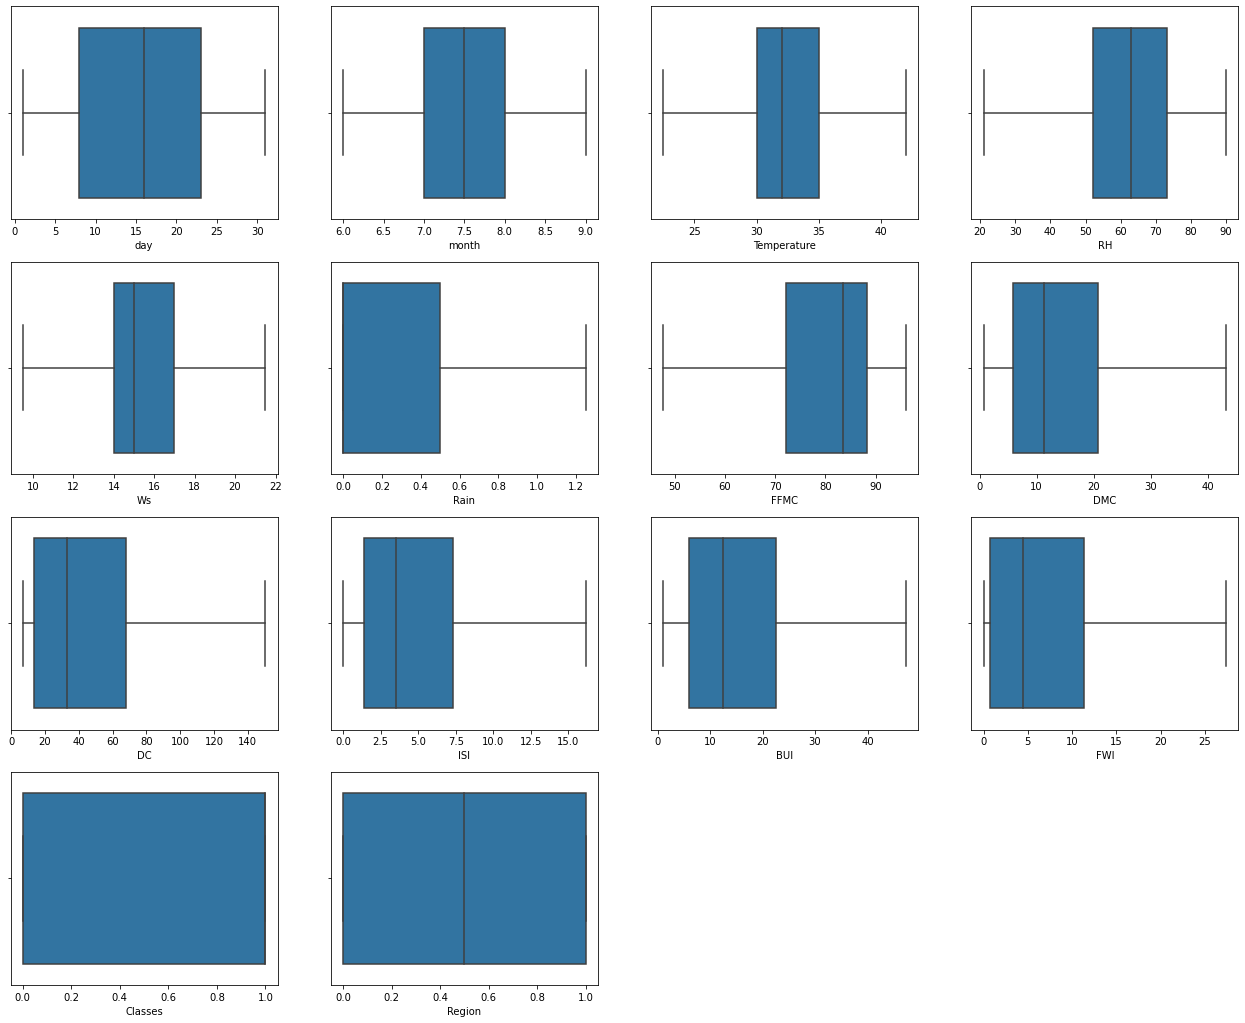

In [126]:
plt.figure(figsize=(22,18))
for i,col in enumerate(df1.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(df1[col])

<b><font color=blue>Observation</font>
- Outliers removed from all the mentioned features.

#### Compare skewness

In [127]:
df_copy.skew()

day            0.002806
month          0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
Classes       -0.266220
Region         0.000000
dtype: float64

In [128]:
df1.skew()

day            0.002806
month          0.000000
Temperature   -0.175783
RH            -0.237964
Ws             0.177613
Rain           1.246290
FFMC          -1.073835
DMC            1.089909
DC             1.159322
ISI            1.024383
BUI            1.020148
FWI            1.048454
Classes       -0.266220
Region         0.000000
dtype: float64

<b><font color=blue>Observation</font>
- Skewness is reduced after we have removed ouliers using IQR Method.

## 5. Model Building

#### Creating independent and dependent variables

In [129]:
x = df1.drop(columns = ['Classes'])
y = df1['Classes']

#### Independent variable

In [130]:
x

day  month  Temperature  RH    Ws  Rain     FFMC   DMC    DC  ISI   BUI  \
0      1      6         29.0  57  18.0  0.00  65.7000   3.4   7.6  1.3   3.4   
1      2      6         29.0  61  13.0  1.25  64.4000   4.1   7.6  1.0   3.9   
2      3      6         26.0  82  21.5  1.25  47.7375   2.5   7.1  0.3   2.7   
3      4      6         25.0  89  13.0  1.25  47.7375   1.3   6.9  0.0   1.7   
4      5      6         27.0  77  16.0  0.00  64.8000   3.0  14.2  1.2   3.9   
..   ...    ...          ...  ..   ...   ...      ...   ...   ...  ...   ...   
239   26      9         30.0  65  14.0  0.00  85.4000  16.0  44.5  4.5  16.9   
240   27      9         28.0  87  15.0  1.25  47.7375   6.5   8.0  0.1   6.2   
241   28      9         27.0  87  21.5  0.50  47.7375   3.5   7.9  0.4   3.4   
242   29      9         24.0  54  18.0  0.10  79.7000   4.3  15.2  1.7   5.1   
243   30      9         24.0  64  15.0  0.20  67.3000   3.8  16.5  1.2   4.8   

     FWI  Region  
0    0.5       0  
1    0.4       0  
2    0.1       0  
3    0.0       0  
4    0.5       0  
..   ...     ...  
239  6.5       1  
240  0.0       1  
241  0.2       1  
242  0.7       1  
243  0.5       1  

[244 rows x 13 columns]

In [131]:
x.shape

(244, 13)

In [132]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32

In [133]:
y.shape

(244,)

#### Importing Machine Learning libraries

In [134]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#### Train Test Split

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [137]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [138]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

#### Standardization

In [139]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [140]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 300, 'penalty': 'l2'}


In [141]:
print(classifier_regressor.best_score_)

0.9669669669669669


#### Prediction

In [142]:
y_pred = classifier_regressor.predict(x_test)

#### Accuracy 

In [143]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9836065573770492


#### Classification Report

In [144]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        36

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



#### Performance Metrics

#### Confusion metrics

In [145]:
conf_mat=confusion_matrix(y_pred,y_test)

In [146]:
conf_mat

array([[24,  1],
       [ 0, 36]], dtype=int64)

In [147]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

#### Precision

In [148]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.96

#### Recall

In [149]:
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

#### F1 Score

In [150]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9795918367346939

#### AUC

In [151]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9864864864864865

#### ROC

In [152]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

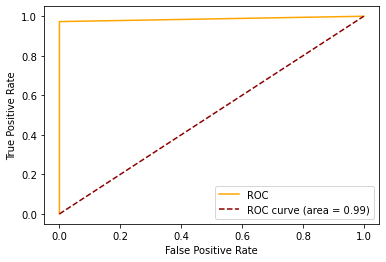

In [153]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Creating Imbalance dataset

In [154]:
df_copy.head()

day  month  Temperature  RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

In [155]:
df_copy.shape

(244, 14)

### Splitting data in 90:10 percent ratio using train test split

In [156]:
x1 = pd.DataFrame(df_copy, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1=pd.DataFrame(df_copy,columns = ['Classes'])

In [157]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(x1, y1, test_size=0.10, random_state=19)

In [158]:
x_train_imb.shape, y_train_imb.shape

((219, 13), (219, 1))

#### Replacing all values as 1 in y_train and all values as 0 in y_test to creating imbalance

In [159]:
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

Classes
134        1
13         1
163        1
65         1
87         1

In [160]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

Classes
141        0
218        0
185        0
20         0
132        0

In [161]:
x_train_imb.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
134   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
13    14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
163   12      7           36  44  13.0   0.0  90.1  12.6   19.4  8.3  12.5   
65     5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
87    27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   

      FWI  Region  
134   0.9       1  
13    0.4       0  
163   9.6       1  
65    6.1       0  
87   13.2       0

#### Combining x_train_imb and y_train_imb

In [162]:
train_imb=x_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
134   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
13    14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
163   12      7           36  44  13.0   0.0  90.1  12.6   19.4  8.3  12.5   
65     5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
87    27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   

      FWI  Region  Classes  
134   0.9       1        1  
13    0.4       0        1  
163   9.6       1        1  
65    6.1       0        1  
87   13.2       0        1

#### Combining x_test_imb and y_test_imb

In [163]:
test_imb=x_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
141   20      6           31  72  14.0   0.2  60.2   3.8   8.0   0.8   3.7   
218    5      9           30  58  12.0   4.1  66.1   4.0   8.4   1.0   3.9   
185    3      8           39  33  17.0   0.0  93.7  17.1  32.1  17.2  16.9   
20    21      6           30  78  14.0   0.0  81.0   6.3  31.6   2.6   8.4   
132   11      6           31  42  21.0   0.0  90.6  18.2  30.5  13.4  18.0   

      FWI  Region  Classes  
141   0.3       1        0  
218   0.4       1        0  
185  19.5       1        0  
20    2.2       0        0  
132  16.7       1        0

In [164]:
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

### Combining train_imb dataset and test_imb dataset into data_imb dataset 

In [165]:
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
1   14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
2   12      7           36  44  13.0   0.0  90.1  12.6   19.4  8.3  12.5   
3    5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
4   27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   

    FWI  Region  Classes  
0   0.9       1        1  
1   0.4       0        1  
2   9.6       1        1  
3   6.1       0        1  
4  13.2       0        1

In [166]:
df_imb.shape

(244, 14)

#### Checking imbalancing

In [167]:
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

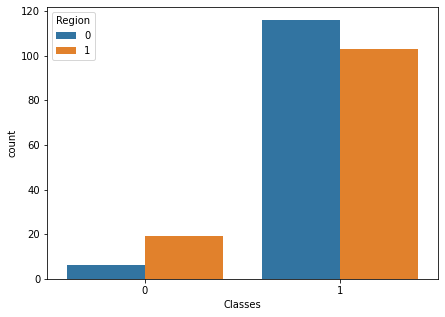

In [168]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='Region')

#### Logistic Regression on imbalance dataset

In [169]:
df_imb.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
1   14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
2   12      7           36  44  13.0   0.0  90.1  12.6   19.4  8.3  12.5   
3    5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
4   27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   

    FWI  Region  Classes  
0   0.9       1        1  
1   0.4       0        1  
2   9.6       1        1  
3   6.1       0        1  
4  13.2       0        1

In [170]:
x1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [171]:
x1

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0     13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
1     14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
2     12      7           36  44  13.0   0.0  90.1  12.6   19.4  8.3  12.5   
3      5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
4     27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   
..   ...    ...          ...  ..   ...   ...   ...   ...    ...  ...   ...   
239   30      8           34  49  15.0   0.0  89.2  24.8  159.1  8.1  35.7   
240   11      9           30  73  14.0   0.0  79.2   6.5   16.6  2.1   6.6   
241   22      9           33  64  13.0   0.0  88.9  26.1  106.3  7.1  32.4   
242    1      9           25  76  17.0   7.2  46.0   1.3    7.5  0.2   1.8   
243   30      6           34  42  15.0   1.7  79.7  12.0    8.5  2.2  11.5   

      FWI  Region  
0     0.9       1  
1     0.4       0  
2     9.6       1  
3     6.1       0  
4    13.2       0  
..    ...     ...  
239  16.0       1  
240   1.2       1  
241  13.7       1  
242   0.1       0  
243   2.2       1  

[244 rows x 13 columns]

In [172]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32

In [173]:
### For upsampling 
import imblearn
from imblearn.combine import SMOTETomek

In [174]:
smt=SMOTETomek()
smt

SMOTETomek()

In [175]:
x_bal,y_bal=smt.fit_resample(x1,y1)
x_bal.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
1   14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
2    5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
3   27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   
4    5      9           29  75  16.0   0.0  80.8   3.4   24.0  2.8   5.1   

    FWI  Region  
0   0.9       1  
1   0.4       0  
2   6.1       0  
3  13.2       0  
4   1.7       0

In [176]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [177]:
x_bal.shape, y_bal.shape

((420, 13), (420,))

#### Creating Balanced data from imbalanced data

In [178]:
data_bal=x_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0   13      6           30  52  15.0   2.0  72.3  11.4    7.8  1.4  10.9   
1   14      6           30  78  20.0   0.5  59.0   4.6    7.8  1.0   4.4   
2    5      8           34  65  13.0   0.0  86.8  11.1   29.7  5.2  11.5   
3   27      8           33  82  21.0   0.0  84.9  47.0  200.2  4.4  59.3   
4    5      9           29  75  16.0   0.0  80.8   3.4   24.0  2.8   5.1   

    FWI  Region  Classes  
0   0.9       1        1  
1   0.4       0        1  
2   6.1       0        1  
3  13.2       0        1  
4   1.7       0        1

#### Exploratory Data Analaysis on balanced dataset

In [179]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          420 non-null    int32  
 1   month        420 non-null    int32  
 2   Temperature  420 non-null    int32  
 3   RH           420 non-null    int32  
 4   Ws           420 non-null    float64
 5   Rain         420 non-null    float64
 6   FFMC         420 non-null    float64
 7   DMC          420 non-null    float64
 8   DC           420 non-null    float64
 9   ISI          420 non-null    float64
 10  BUI          420 non-null    float64
 11  FWI          420 non-null    float64
 12  Region       420 non-null    int32  
 13  Classes      420 non-null    int32  
dtypes: float64(8), int32(6)
memory usage: 36.2 KB


In [180]:
data_bal.describe().T

count       mean        std   min        25%        50%  \
day          420.0  15.442857   8.606434   1.0   7.750000  17.000000   
month        420.0   7.364286   1.019224   6.0   7.000000   7.000000   
Temperature  420.0  32.464286   3.440064  22.0  30.000000  33.000000   
RH           420.0  59.702381  14.354180  21.0  49.000000  60.000000   
Ws           420.0  15.298177   2.493302   6.0  13.894906  15.000000   
Rain         420.0   0.738098   1.743552   0.0   0.000000   0.000000   
FFMC         420.0  79.123093  13.147581  28.6  71.300000  84.509201   
DMC          420.0  15.764590  12.522221   0.7   5.482723  12.100000   
DC           420.0  48.286198  45.262884   6.9  11.519214  33.100000   
ISI          420.0   5.267093   4.497997   0.0   1.400000   4.139685   
BUI          420.0  17.390171  14.011493   1.1   5.791382  13.600000   
FWI          420.0   7.873588   7.815242   0.0   0.700000   5.400000   
Region       420.0   0.566667   0.496127   0.0   0.000000   1.000000   
Classes      420.0   0.500000   0.500596   0.0   0.000000   0.500000   

                   75%    max  
day          22.000000   31.0  
month         8.000000    9.0  
Temperature  35.000000   42.0  
RH           71.000000   90.0  
Ws           17.000000   29.0  
Rain          0.596115   16.8  
FFMC         88.700000   96.0  
DMC          23.600000   65.9  
DC           71.890546  220.4  
ISI           7.740213   19.0  
BUI          27.550000   68.0  
FWI          13.905115   31.1  
Region        1.000000    1.0  
Classes       1.000000    1.0

In [181]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.065505     0.174656 -0.101302  0.058861 -0.225387   
month       -0.065505  1.000000    -0.147734  0.091930 -0.051832  0.110800   
Temperature  0.174656 -0.147734     1.000000 -0.708121 -0.200085 -0.371267   
RH          -0.101302  0.091930    -0.708121  1.000000  0.164435  0.223547   
Ws           0.058861 -0.051832    -0.200085  0.164435  1.000000  0.052503   
Rain        -0.225387  0.110800    -0.371267  0.223547  0.052503  1.000000   
FFMC         0.332642 -0.080964     0.716788 -0.641909 -0.030344 -0.597819   
DMC          0.545568 -0.035285     0.507965 -0.394420  0.111822 -0.355969   
DC           0.585787  0.085350     0.361422 -0.190220  0.138212 -0.345262   
ISI          0.227970 -0.073270     0.644655 -0.706737  0.172288 -0.392160   
BUI          0.578926 -0.000002     0.474909 -0.337784  0.127642 -0.363090   
FWI          0.396916 -0.042823     0.604509 -0.602135  0.170751 -0.382864   
Region       0.127775 -0.126019     0.397841 -0.443770 -0.066893 -0.140762   
Classes      0.027698  0.133313    -0.150370  0.226685  0.126934  0.019686   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.332642  0.545568  0.585787  0.227970  0.578926  0.396916   
month       -0.080964 -0.035285  0.085350 -0.073270 -0.000002 -0.042823   
Temperature  0.716788  0.507965  0.361422  0.644655  0.474909  0.604509   
RH          -0.641909 -0.394420 -0.190220 -0.706737 -0.337784 -0.602135   
Ws          -0.030344  0.111822  0.138212  0.172288  0.127642  0.170751   
Rain        -0.597819 -0.355969 -0.345262 -0.392160 -0.363090 -0.382864   
FFMC         1.000000  0.662042  0.540734  0.761874  0.646416  0.738940   
DMC          0.662042  1.000000  0.854183  0.700617  0.982147  0.880551   
DC           0.540734  0.854183  1.000000  0.504315  0.930593  0.724043   
ISI          0.761874  0.700617  0.504315  1.000000  0.658786  0.936831   
BUI          0.646416  0.982147  0.930593  0.658786  1.000000  0.858655   
FWI          0.738940  0.880551  0.724043  0.936831  0.858655  1.000000   
Region       0.353298  0.331740  0.072096  0.403792  0.246118  0.361665   
Classes     -0.153370 -0.131224  0.024584 -0.170744 -0.080961 -0.158276   

               Region   Classes  
day          0.127775  0.027698  
month       -0.126019  0.133313  
Temperature  0.397841 -0.150370  
RH          -0.443770  0.226685  
Ws          -0.066893  0.126934  
Rain        -0.140762  0.019686  
FFMC         0.353298 -0.153370  
DMC          0.331740 -0.131224  
DC           0.072096  0.024584  
ISI          0.403792 -0.170744  
BUI          0.246118 -0.080961  
FWI          0.361665 -0.158276  
Region       1.000000 -0.221021  
Classes     -0.221021  1.000000

In [182]:
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

#### Dataset - original vs balanced

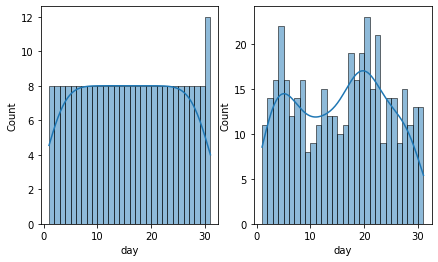

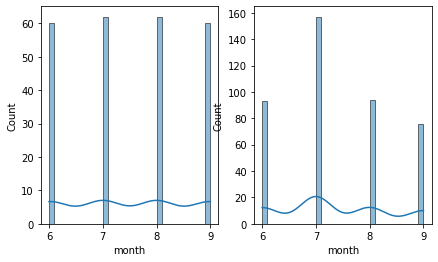

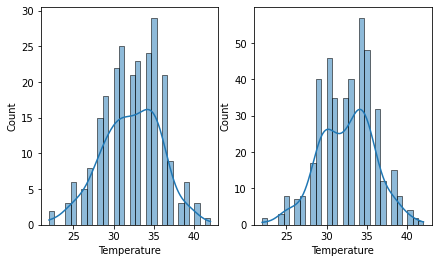

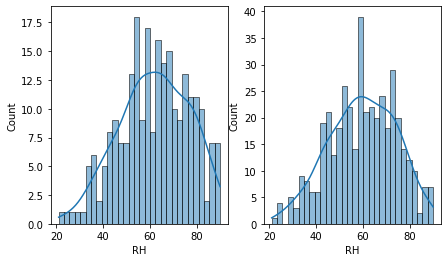

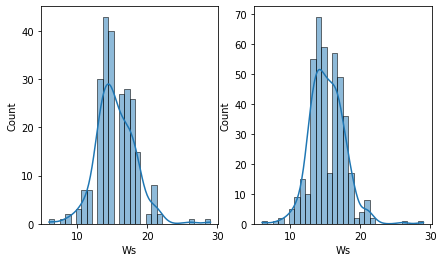

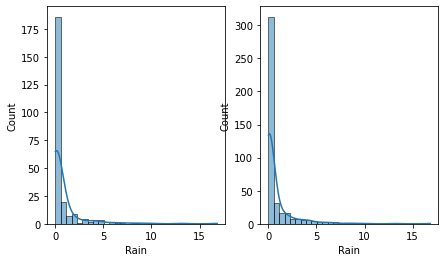

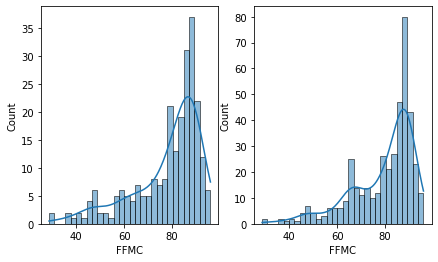

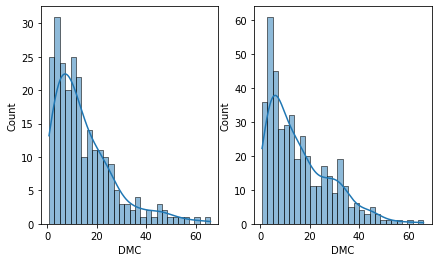

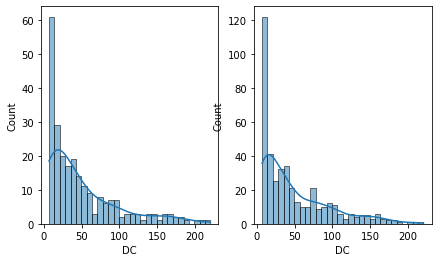

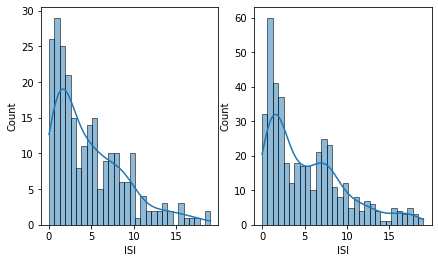

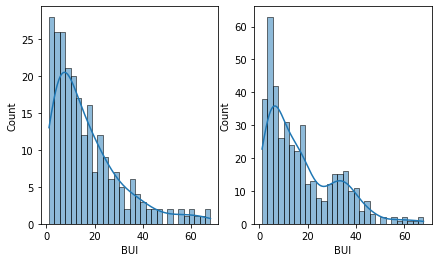

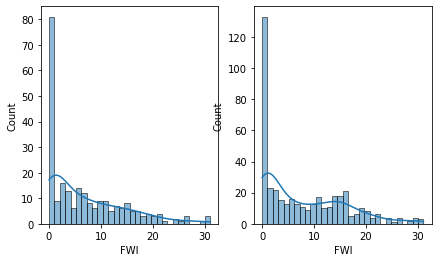

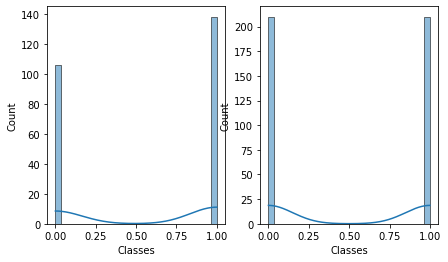

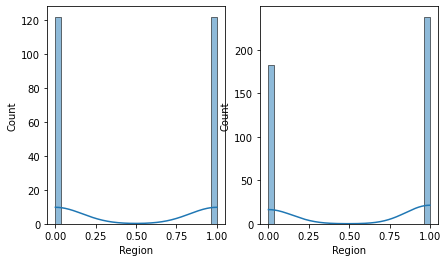

In [183]:
for i in num_df:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=df_copy,x=i,kde=True,bins=30)
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)

#### Outliers - original vs balanced

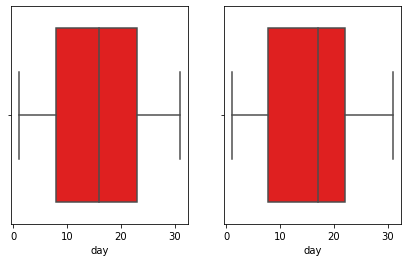

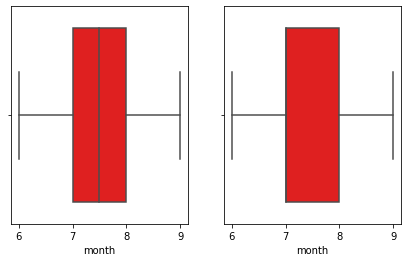

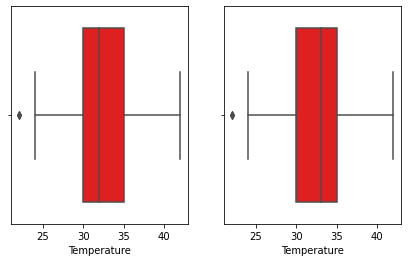

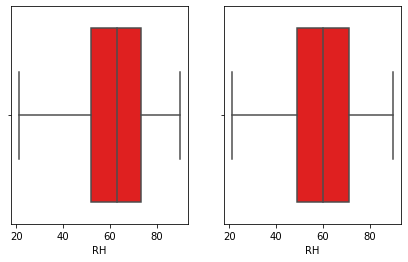

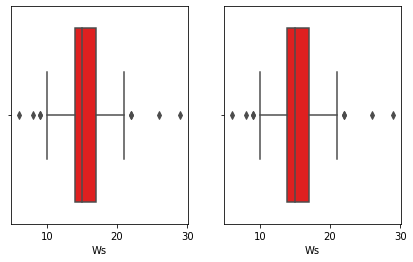

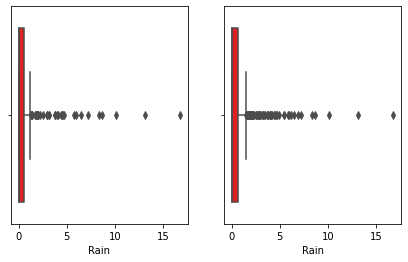

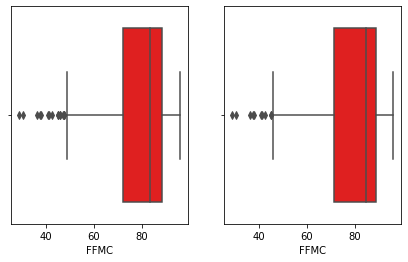

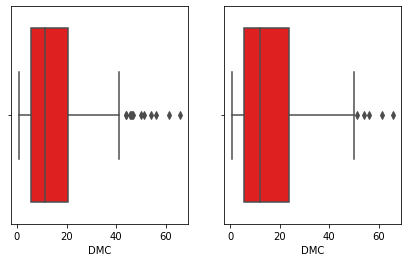

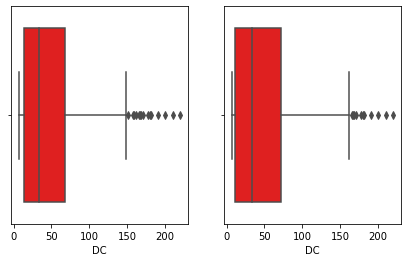

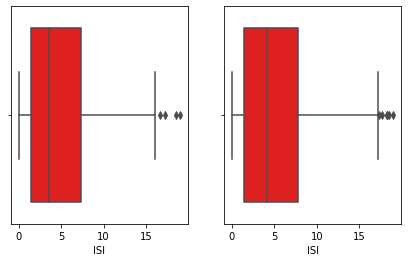

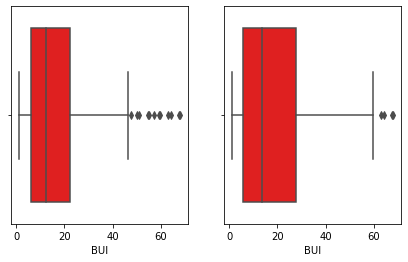

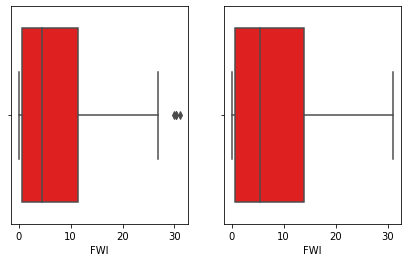

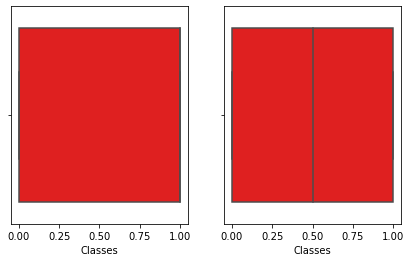

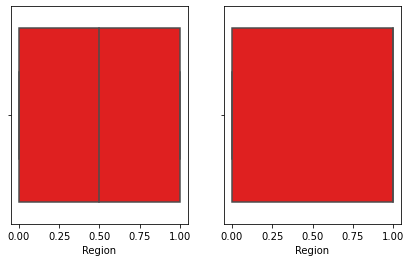

In [184]:
for i in num_df:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=df_copy,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

#### Train test split

In [185]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_bal,y_bal,test_size=0.30,random_state=16)

In [186]:
x_train1

day  month  Temperature  RH         Ws      Rain       FFMC        DMC  \
135    3      7           34  56  17.000000  0.100000  84.700000   9.700000   
46    24      9           29  65  19.000000  0.600000  68.300000   5.500000   
7     13      9           29  49  19.000000  0.000000  88.600000  11.500000   
290   20      7           36  29  17.951148  0.000000  93.802296  39.431461   
199   23      6           32  62  18.000000  0.100000  81.400000   8.200000   
..   ...    ...          ...  ..        ...       ...        ...        ...   
321   19      7           35  52  16.000000  0.000000  89.428317  31.415975   
69    11      8           40  31  15.000000  0.000000  94.200000  22.500000   
121    4      9           30  66  15.000000  0.200000  73.500000   4.100000   
238    5      8           30  58  12.009931  4.080635  66.070704   3.999007   
169   13      6           27  84  21.000000  1.200000  50.000000   6.700000   

            DC        ISI        BUI        FWI  Region  
135  27.300000   4.700000  10.300000   5.200000       1  
46   15.200000   1.500000   5.800000   0.700000       0  
7    33.400000   9.100000  12.400000  10.300000       1  
290  80.365510  18.280166  39.331461  29.689790       1  
199  47.700000   3.300000  11.500000   3.800000       0  
..         ...        ...        ...        ...     ...  
321  68.405746   8.923499  31.315975  16.173203       1  
69   46.300000  16.600000  22.400000  21.600000       1  
121  26.600000   1.500000   6.000000   0.700000       1  
238   8.398014   0.999007   3.899007   0.399503       1  
169  17.000000   0.500000   6.700000   0.200000       0  

[294 rows x 13 columns]

In [187]:
x_test1

day  month  Temperature  RH         Ws      Rain       FFMC        DMC  \
64    29      9           26  80  16.000000  1.800000  47.400000   2.900000   
54    21      9           35  34  17.000000  0.000000  92.200000  23.600000   
26    27      8           36  54  14.000000  0.000000  91.000000  65.900000   
355   17      6           30  72  14.000000  0.141374  65.769517   4.591458   
167   18      6           31  78  14.000000  0.300000  56.900000   1.900000   
..   ...    ...          ...  ..        ...       ...        ...        ...   
212    3      8           39  33  17.000000  0.000000  93.700000  17.100000   
140    5      6           32  60  14.000000  0.200000  77.100000   6.000000   
264    3      7           38  33  16.989791  0.001276  93.677795  17.089535   
12    22      8           36  55  18.000000  0.000000  89.100000  33.500000   
375    4      9           29  73  16.594438  0.086481  69.860023   2.521862   

             DC        ISI        BUI        FWI  Region  
64     7.700000   0.300000   3.000000   0.100000       0  
54    97.300000  13.800000  29.400000  21.600000       1  
26   177.300000  10.000000  68.000000  26.100000       1  
355   10.520939   1.181072   4.550084   0.563819       1  
167    8.000000   0.700000   2.400000   0.200000       0  
..          ...        ...        ...        ...     ...  
212   32.100000  17.200000  16.900000  19.500000       1  
140   17.600000   1.800000   6.500000   0.900000       1  
264   32.108423  17.166565  16.891833  19.463502       1  
12   151.300000   9.900000  43.100000  20.400000       0  
375   15.821669   1.494631   3.400193   0.594631       0  

[126 rows x 13 columns]

In [188]:
y_train1

135    1
46     1
7      1
290    0
199    1
      ..
321    0
69     1
121    1
238    0
169    1
Name: Classes, Length: 294, dtype: int32

In [189]:
y_test1

64     1
54     1
26     1
355    0
167    1
      ..
212    0
140    1
264    0
12     1
375    0
Name: Classes, Length: 126, dtype: int32

#### logistic regression model

In [190]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [191]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [192]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

#### Standardization

In [193]:
classifier_regressor_bal.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [194]:
print(classifier_regressor_bal.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [195]:
print(classifier_regressor_bal.best_score_)

0.6632963179427236


#### Prediction

In [196]:
y_bal_pred = classifier_regressor_bal.predict(x_test1)
y_bal_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

#### Accuracy

In [197]:
from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.5634920634920635


#### Classification Report

In [198]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53        50
           1       0.68      0.53      0.59        76

    accuracy                           0.56       126
   macro avg       0.57      0.57      0.56       126
weighted avg       0.59      0.56      0.57       126



#### Performance Metrics

#### Confusion Metrics

In [199]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)
conf_mat_bal

array([[31, 19],
       [36, 40]], dtype=int64)

In [200]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

#### Precision

In [201]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.62

#### Recall

In [202]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.4626865671641791

#### F1 Score

In [203]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.52991452991453

#### Conclusion

#### Performance of Logistic Regression on Original Dataset

In [204]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        36

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



#### Perfromance of Logistic Regression on Balanced Dataset

In [205]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53        50
           1       0.68      0.53      0.59        76

    accuracy                           0.56       126
   macro avg       0.57      0.57      0.56       126
weighted avg       0.59      0.56      0.57       126



<b><font color=blue>Observation</font>
- Original dataset model predicts good results.
- Balanced dataset (created from imbalanced dataset) model predicts bad results.